In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from __future__ import print_function
import seaborn as sns
from matplotlib.ticker import NullFormatter, MaxNLocator
import matplotlib.ticker as ticker
import plotly.graph_objects as go
import scipy as sp
from itertools import chain
import matplotlib as mpl
from matplotlib.lines import Line2D
from scipy import spatial
from scipy.spatial import ConvexHull
from scipy.optimize import curve_fit
from matplotlib import path
from scipy.stats import probplot,shapiro, sem
from scipy.interpolate import make_interp_spline
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
from matplotlib import cm
from numpy import linspace
import pylab
import os
from scipy.ndimage import gaussian_filter

# initialization steps

In [2]:
#protamine details
#need to remove frames and simulations that are not necessary
#only show equilibrated part
#this is for salmon
salmon_rg = pd.read_csv("~/protamine_simulation/jupyter_nb/salmon_rg.csv").iloc[:,:3]
salmon_ree = pd.read_csv("~/protamine_simulation/jupyter_nb/salmon_ree.csv")
salmon_rg_ree=pd.concat([salmon_rg,salmon_ree['Ree']],axis=1)
salmon_rg_ree=salmon_rg_ree[salmon_rg_ree.sim!=2]
salmon_rg_ree=salmon_rg_ree[salmon_rg_ree.sim!=11]
#this step is because some salmon simulations have more than 200ns
temp_df=salmon_rg_ree.copy()
for sim in temp_df.sim.unique():
    n=temp_df[temp_df.sim==sim].frames.max()-100000
    if n>0:
        temp_df.drop(temp_df[temp_df.sim==sim].tail(n).index,inplace=True)
salmon_rg_ree=temp_df.copy()
del temp_df
#this step is taking last 40000 frames i.e. equilibrated portion
blank_df = pd.DataFrame()
for sim in salmon_rg_ree.sim.unique():
    temp_df = salmon_rg_ree[salmon_rg_ree.sim==sim].iloc[-40000:,:]
    blank_df = blank_df.append(temp_df)
salmon_rg_ree = blank_df.copy()
del blank_df
del temp_df
del salmon_rg, salmon_ree

#need to remove frames and simulations that are not necessary
#only show equilibrated part
#this is for p1
p1_rg = pd.read_csv("~/protamine_simulation/jupyter_nb/p1_rg.csv")
p1_ree = pd.read_csv("~/protamine_simulation/jupyter_nb/p1_ree.csv")
p1_rg_ree=pd.concat([p1_rg,p1_ree['Ree']],axis=1)
p1_rg_ree=p1_rg_ree[p1_rg_ree.sim!=15]
p1_rg_ree=p1_rg_ree[p1_rg_ree.sim!=13]
blank_df = pd.DataFrame()
for sim in p1_rg_ree.sim.unique():
    temp_df = p1_rg_ree[p1_rg_ree.sim==sim].iloc[-40000:,:]
    blank_df = blank_df.append(temp_df)
p1_rg_ree = blank_df.copy()
del blank_df
del temp_df
del p1_rg, p1_ree

#need to remove frames and simulations that are not necessary
#only show equilibrated part
#this is for bull
bull_rg = pd.read_csv("~/protamine_simulation/jupyter_nb/bull_Rg_master_out.csv")
bull_ree = pd.read_csv("~/protamine_simulation/jupyter_nb/bull_Ree_master_out.csv")
bull_rg_ree=pd.concat([bull_rg,bull_ree['Ree']],axis=1)
bull_rg_ree=bull_rg_ree[bull_rg_ree.sim!=14]
bull_rg_ree=bull_rg_ree[bull_rg_ree.sim!=15]
blank_df = pd.DataFrame()
for sim in bull_rg_ree.sim.unique():
    temp_df = bull_rg_ree[bull_rg_ree.sim==sim].iloc[-40000:,:]
    blank_df = blank_df.append(temp_df)
bull_rg_ree = blank_df.copy()

del blank_df
del temp_df
del bull_rg, bull_ree

In [3]:
#human P1 protamine ESFF1 13 simulations
#drop the same trajectories as ff14sb 13 simulations
#use equilibrated region same region as ff14sb

p1_rg_esff1= pd.read_csv('/home/hshadman/protamine_simulation/ESFF1/protamine_human/P1/explicit_solvent/more_nosalt_runs/explicit_continued_from_implicit/Rg_Ree/p1_Rg_master_out.csv')
p1_ree_esff1= pd.read_csv('/home/hshadman/protamine_simulation/ESFF1/protamine_human/P1/explicit_solvent/more_nosalt_runs/explicit_continued_from_implicit/Rg_Ree/p1_Ree_master_out.csv')
p1_rg_ree_esff1=pd.concat([p1_rg_esff1,p1_ree_esff1['Ree']],axis=1)
p1_rg_ree_esff1=p1_rg_ree_esff1[p1_rg_ree_esff1.sim!=15]
p1_rg_ree_esff1=p1_rg_ree_esff1[p1_rg_ree_esff1.sim!=13]
blank_df = pd.DataFrame()
for sim in p1_rg_ree_esff1.sim.unique():
    temp_df = p1_rg_ree_esff1[p1_rg_ree_esff1.sim==sim].iloc[-40000:,:]
    blank_df = blank_df.append(temp_df)
p1_rg_ree_esff1 = blank_df.copy()
del blank_df
del temp_df
del p1_rg_esff1, p1_ree_esff1


In [4]:
#the long simulations 
salmon_rg_oldff=pd.read_csv('~/protamine_simulation/jupyter_nb/salmon_Rg_eighth_oldff.csv')                                                                    
salmon_ree_oldff=pd.read_csv('~/protamine_simulation/jupyter_nb/salmon_Ree_eighth_oldff.csv')                                                                  
salmon_rg_ree_oldff=pd.concat([salmon_rg_oldff,salmon_ree_oldff['Ree']],axis=1)                                                  
salmon_rg_ree_oldff['ratio']=salmon_rg_ree_oldff.Ree.values**2/salmon_rg_ree_oldff.Rg.values**2                                  

p1_rg_oldff=pd.read_csv('~/protamine_simulation/jupyter_nb/p1_Rg_eighth_oldff.csv')                                                                    
p1_ree_oldff=pd.read_csv('~/protamine_simulation/jupyter_nb/p1_Ree_eighth_oldff.csv')                                                                  
p1_rg_ree_oldff=pd.concat([p1_rg_oldff,p1_ree_oldff['Ree']],axis=1)                                                  
p1_rg_ree_oldff['ratio']=p1_rg_ree_oldff.Ree.values**2/p1_rg_ree_oldff.Rg.values**2                                  

bull_rg_oldff=pd.read_csv('~/protamine_simulation/jupyter_nb/bull_Rg_fourth_oldff.csv')                                                                    
bull_ree_oldff=pd.read_csv('~/protamine_simulation/jupyter_nb/bull_Ree_fourth_oldff.csv')                                                                  
bull_rg_ree_oldff=pd.concat([bull_rg_oldff,bull_ree_oldff['Ree']],axis=1)     
bull_rg_ree_oldff['ratio']=bull_rg_ree_oldff.Ree.values**2/bull_rg_ree_oldff.Rg.values**2                                  

#use below two dataframes for plotting                                                                               

del salmon_rg_oldff, salmon_ree_oldff,p1_rg_oldff, p1_ree_oldff, bull_rg_oldff, bull_ree_oldff
  

In [5]:
#protamine details (only for salmon dataframe i added Rg/Rg_mean)
salmon_rg_ree_ratheatmap=salmon_rg_ree.copy()
salmon_rg_ree_ratheatmap['ratio']=salmon_rg_ree_ratheatmap.Ree.values**2/salmon_rg_ree_ratheatmap.Rg.values**2
del salmon_rg_ree

test=salmon_rg_ree_ratheatmap.copy()
temp_rg_mean=[]
for sim in test.sim.unique():
    temp_rg_mean.append(list(np.repeat(test[test.sim==sim]['Rg'].mean(),
                                 test[test.sim==sim]['Rg'].shape[0])))
test['Rg_mean']=list(chain.from_iterable(temp_rg_mean))
test['Rg/Rg_mean']=test['Rg'].values/test['Rg_mean']    
salmon_rg_ree_ratheatmap=test.copy()
del test, temp_rg_mean

In [6]:
#protamine details
p1_rg_ree_ratheatmap=p1_rg_ree.copy()
p1_rg_ree_ratheatmap['ratio']=p1_rg_ree_ratheatmap.Ree.values**2/p1_rg_ree_ratheatmap.Rg.values**2
del p1_rg_ree
p1_rg_ree_ratheatmap

,frames,sim,Rg,Ree,ratio
60000,60001,1,28.1333,70.9610,6.362065
60001,60002,1,28.0252,71.5204,6.512720
60002,60003,1,28.0709,70.5204,6.311271
60003,60004,1,27.8865,69.2119,6.159898
60004,60005,1,27.9361,69.9112,6.262705
...,...,...,...,...,...
1399995,99996,14,23.9297,69.6266,8.465953
1399996,99997,14,23.8227,69.1996,8.437722
1399997,99998,14,23.6595,68.5624,8.397710
1399998,99999,14,23.7770,69.0513,8.433922


In [7]:
#protamine details
p1_rg_ree_esff1_ratheatmap=p1_rg_ree_esff1.copy()
p1_rg_ree_esff1_ratheatmap['ratio']=p1_rg_ree_esff1_ratheatmap.Ree.values**2/p1_rg_ree_esff1_ratheatmap.Rg.values**2
del p1_rg_ree_esff1
p1_rg_ree_esff1_ratheatmap

,frames,sim,Rg,Ree,ratio
60000,60001,1,30.0090,76.5885,6.513645
60001,60002,1,29.9954,76.3078,6.471852
60002,60003,1,30.0475,75.8204,6.367302
60003,60004,1,29.8249,77.0204,6.668890
60004,60005,1,30.1068,78.4066,6.782285
...,...,...,...,...,...
1399995,99996,14,31.3949,92.7101,8.720390
1399996,99997,14,31.3185,92.2405,8.674439
1399997,99998,14,31.5128,93.0468,8.718242
1399998,99999,14,31.5500,92.3367,8.565446


In [8]:
#protamine details
bull_rg_ree_ratheatmap=bull_rg_ree.copy()
bull_rg_ree_ratheatmap['ratio']=bull_rg_ree_ratheatmap.Ree.values**2/bull_rg_ree_ratheatmap.Rg.values**2
del bull_rg_ree
bull_rg_ree_ratheatmap

,frames,sim,Rg,Ree,ratio
60000,60001,1,24.4750,55.0058,5.050933
60001,60002,1,24.5678,56.4126,5.272538
60002,60003,1,24.5493,56.1438,5.230285
60003,60004,1,24.8113,56.7690,5.235082
60004,60005,1,25.0404,57.1523,5.209366
...,...,...,...,...,...
1299995,99996,13,25.9520,62.3499,5.772047
1299996,99997,13,25.9814,62.1708,5.725953
1299997,99998,13,25.8608,61.9394,5.736541
1299998,99999,13,25.8253,62.1201,5.785935


In [9]:
#salmon tensors received and converted to moments at below directory. only equilibrated region for moments for time
salmon_moments=pd.read_csv('/home/hshadman/protamine_simulation/jupyter_nb/salmon_moments_equilibrated.csv')
salmon_moments.insert(0,salmon_rg_ree_ratheatmap.columns[0],
                      salmon_rg_ree_ratheatmap[salmon_rg_ree_ratheatmap.columns[0]].values)
salmon_moments.insert(1,salmon_rg_ree_ratheatmap.columns[1],
                      salmon_rg_ree_ratheatmap[salmon_rg_ree_ratheatmap.columns[1]].values)
salmon_moments.insert(2,salmon_rg_ree_ratheatmap.columns[2],
                      salmon_rg_ree_ratheatmap[salmon_rg_ree_ratheatmap.columns[2]].values)
salmon_R1=salmon_moments.R1.values
salmon_R2=salmon_moments.R2.values
salmon_R3=salmon_moments.R3.values
salmon_Rg=(salmon_R1+salmon_R2+salmon_R3)**0.5
salmon_moments['asphericity']=(salmon_R1) - ((0.5) * ((salmon_R2) + (salmon_R3)))
salmon_moments['acylindricity']=(salmon_R2) - (salmon_R3)
salmon_moments['RSA'] = ((salmon_moments.asphericity.values**2) + (0.75*(salmon_moments.acylindricity.values**2)))/(salmon_Rg**4)
del salmon_R1, salmon_R2, salmon_R3, salmon_Rg


#p1 tensors received and converted to moments at below directory. only equilibrated region for moments for time
p1_moments=pd.read_csv('/home/hshadman/protamine_simulation/jupyter_nb/p1_moments_equilibrated.csv')
p1_moments.insert(0,p1_rg_ree_ratheatmap.columns[0],
                      p1_rg_ree_ratheatmap[p1_rg_ree_ratheatmap.columns[0]].values)
p1_moments.insert(1,p1_rg_ree_ratheatmap.columns[1],
                      p1_rg_ree_ratheatmap[p1_rg_ree_ratheatmap.columns[1]].values)
p1_moments.insert(2,p1_rg_ree_ratheatmap.columns[2],
                      p1_rg_ree_ratheatmap[p1_rg_ree_ratheatmap.columns[2]].values)

p1_R1=p1_moments.R1.values
p1_R2=p1_moments.R2.values
p1_R3=p1_moments.R3.values
p1_Rg=(p1_R1+p1_R2+p1_R3)**0.5
p1_moments['asphericity']=(p1_R1) - ((0.5) * ((p1_R2) + (p1_R3)))
p1_moments['acylindricity']=(p1_R2) - (p1_R3)
p1_moments['RSA'] = ((p1_moments.asphericity.values**2) + (0.75*(p1_moments.acylindricity.values**2)))/(p1_Rg**4)
del p1_R1, p1_R2, p1_R3, p1_Rg


#bull tensors received and converted to moments at below directory. only equilibrated region for moments for time
bull_moments=pd.read_csv('/home/hshadman/protamine_simulation/jupyter_nb/bull_moments_equilibrated.csv')
bull_moments.insert(0,bull_rg_ree_ratheatmap.columns[0],
                      bull_rg_ree_ratheatmap[bull_rg_ree_ratheatmap.columns[0]].values)
bull_moments.insert(1,bull_rg_ree_ratheatmap.columns[1],
                      bull_rg_ree_ratheatmap[bull_rg_ree_ratheatmap.columns[1]].values)
bull_moments.insert(2,bull_rg_ree_ratheatmap.columns[2],
                      bull_rg_ree_ratheatmap[bull_rg_ree_ratheatmap.columns[2]].values)
bull_R1=bull_moments.R1.values
bull_R2=bull_moments.R2.values
bull_R3=bull_moments.R3.values
bull_Rg=(bull_R1+bull_R2+bull_R3)**0.5
bull_moments['asphericity']=(bull_R1) - ((0.5) * ((bull_R2) + (bull_R3)))
bull_moments['acylindricity']=(bull_R2) - (bull_R3)
bull_moments['RSA'] = ((bull_moments.asphericity.values**2) + (0.75*(bull_moments.acylindricity.values**2)))/(bull_Rg**4)
del bull_R1, bull_R2, bull_R3, bull_Rg



In [10]:
salmon_moments

,frames,sim,Rg,R1,R2,R3,asphericity,acylindricity,RSA
0,60001,1,26.1041,639.320359,29.635872,12.468669,618.268089,17.167203,0.823699
1,60002,1,25.8683,628.822750,28.431834,11.914016,608.649825,16.517819,0.827759
2,60003,1,25.9168,632.701039,27.210635,11.768426,613.211508,15.442209,0.833877
3,60004,1,25.9136,633.831913,26.351048,11.333339,614.989720,15.017709,0.839106
4,60005,1,25.9379,633.155388,26.860646,12.756666,613.346732,14.103980,0.831472
...,...,...,...,...,...,...,...,...,...
519995,99996,15,18.5986,289.898603,42.690007,13.319490,261.893855,29.370517,0.578637
519996,99997,15,18.6897,291.742781,44.029569,13.533850,262.961071,30.495719,0.572439
519997,99998,15,18.7345,292.589463,45.065449,13.327688,263.392894,31.737762,0.569299
519998,99999,15,18.7678,294.566483,44.133938,13.530279,265.734375,30.603659,0.574831


In [11]:
bull_moments

,frames,sim,Rg,R1,R2,R3,asphericity,acylindricity,RSA
0,60001,1,24.4750,553.782676,31.293834,13.947590,531.161964,17.346244,0.786887
1,60002,1,24.5678,557.928541,31.484898,14.161761,535.105212,17.323136,0.786605
2,60003,1,24.5493,559.257751,29.346161,14.062388,537.553476,15.283773,0.796073
3,60004,1,24.8113,573.322884,28.669697,13.608519,552.183776,15.061178,0.805028
4,60005,1,25.0404,583.352172,30.432837,13.236391,561.517558,17.196446,0.802541
...,...,...,...,...,...,...,...,...,...
519995,99996,13,25.9520,624.948670,33.652810,14.905619,600.669455,18.747191,0.795983
519996,99997,13,25.9814,625.943638,34.442536,14.644726,601.400006,19.797810,0.794387
519997,99998,13,25.8608,621.268264,32.649439,14.861297,597.512896,17.788142,0.798763
519998,99999,13,25.8253,621.982272,31.603657,13.361472,599.499707,18.242185,0.808530


In [12]:
p1_moments

,frames,sim,Rg,R1,R2,R3,asphericity,acylindricity,RSA
0,60001,1,28.1333,735.167983,44.158809,12.155908,707.010624,32.002900,0.799164
1,60002,1,28.0252,728.028439,45.307523,12.074138,699.337608,33.233384,0.794174
2,60003,1,28.0709,728.851449,46.731091,12.393260,699.289274,34.337831,0.788992
3,60004,1,27.8865,717.878466,47.014979,12.764155,687.988898,34.250824,0.784138
4,60005,1,27.9361,722.026616,45.983290,12.416294,692.826824,33.566996,0.789495
...,...,...,...,...,...,...,...,...,...
519995,99996,14,23.9297,539.608244,18.806862,14.217194,523.096216,4.589668,0.834520
519996,99997,14,23.8227,534.683491,17.852470,14.982840,518.265836,2.869630,0.833978
519997,99998,14,23.6595,527.254466,17.695328,14.819906,510.996850,2.875422,0.833351
519998,99999,14,23.7770,532.609284,17.569947,15.166769,516.240926,2.403179,0.833841


In [13]:
bull_moments

,frames,sim,Rg,R1,R2,R3,asphericity,acylindricity,RSA
0,60001,1,24.4750,553.782676,31.293834,13.947590,531.161964,17.346244,0.786887
1,60002,1,24.5678,557.928541,31.484898,14.161761,535.105212,17.323136,0.786605
2,60003,1,24.5493,559.257751,29.346161,14.062388,537.553476,15.283773,0.796073
3,60004,1,24.8113,573.322884,28.669697,13.608519,552.183776,15.061178,0.805028
4,60005,1,25.0404,583.352172,30.432837,13.236391,561.517558,17.196446,0.802541
...,...,...,...,...,...,...,...,...,...
519995,99996,13,25.9520,624.948670,33.652810,14.905619,600.669455,18.747191,0.795983
519996,99997,13,25.9814,625.943638,34.442536,14.644726,601.400006,19.797810,0.794387
519997,99998,13,25.8608,621.268264,32.649439,14.861297,597.512896,17.788142,0.798763
519998,99999,13,25.8253,621.982272,31.603657,13.361472,599.499707,18.242185,0.808530


In [14]:
#BE CAREFUL with working directory for this first part of code
#-------
#only SAW_equil_chain_rg_ree was changed to SAW_SAW_equil_chain_rg_ree
# BE CAREFUL when changing the RW to SAW and RW
cwd= os.getcwd()
os.chdir('/home/hshadman/polym_sep/SAW/varying_chain_lengths/')
chain_lengths=[]
for file in os.listdir():
    if file.split('_')[0]=='chain':
        chain_lengths.append(int(file.split('_')[2]))
os.chdir(cwd)
#--------
folders=[]
chain_lengths=sorted(chain_lengths)
for i in chain_lengths:
    folders.append('/home/hshadman/polym_sep/SAW/varying_chain_lengths/chain_length_'+str(i)+'/varying_epas_chain_length_'+str(i)+'_master_out.csv')
j=0
for file in folders:
    test=pd.read_csv(file)
    test['Rend2']=test.Rendx+test.Rendy+test.Rendz
    test['Rg2']=test.Rgx+test.Rgy+test.Rgz
    test['ratio']=test.Rend2.values/test.Rg2.values
    test['asphericity']=test.Rgx.values-(0.5*(test.Rgy.values+test.Rgz.values))
    test['acylindricity']=test.Rgy.values-test.Rgz.values
    test['RSA']=((test.asphericity.values**2+(0.75*test.acylindricity.values**2))/(test.Rg2.values)**2)**0.5

    epas_considered = test.epas.unique()
    blank_df = pd.DataFrame()
    for epas in test.epas.unique():
        if epas in epas_considered:
            frames_number=len(test[test.epas==epas].index)
            equil_frames=int(0.90*frames_number)
            temp_df = test[test.epas==epas].iloc[-equil_frames:,:]
            blank_df = blank_df.append(temp_df)
    equil_test=blank_df.copy()
    equil_test=equil_test.drop(['frames','econf'],axis=1)
    if j==0:
        SAW_equil_chain_rg_ree=equil_test.copy()
        for epas_val in equil_test.epas.unique():
            if epas_val==equil_test.epas.unique()[0]:
                running_df=pd.DataFrame(data=equil_test[equil_test.epas==epas_val].mean(axis=0)).T
            elif epas_val!=equil_test.epas.unique()[0]:
                running_df=running_df.append(pd.DataFrame(data=equil_test[equil_test.epas==epas_val].mean(axis=0)).T)            
        summary_df_SAW=running_df.copy()
    else:
        SAW_equil_chain_rg_ree=SAW_equil_chain_rg_ree.append(equil_test)
        for epas_val in equil_test.epas.unique():
            if epas_val==equil_test.epas.unique()[0]:
                running_df=pd.DataFrame(data=equil_test[equil_test.epas==epas_val].mean(axis=0)).T
            elif epas_val!=equil_test.epas.unique()[0]:
                running_df=running_df.append(pd.DataFrame(data=equil_test[equil_test.epas==epas_val].mean(axis=0)).T)            
        summary_df_SAW=pd.concat([summary_df_SAW,running_df],axis=0)    
    del blank_df, temp_df, test, equil_test    
    j+=1
del running_df, equil_frames
summary_df_SAW=summary_df_SAW.round({'epas':2})
SAW_equil_chain_rg_ree=SAW_equil_chain_rg_ree.round({'epas':2})


In [15]:
#BE CAREFUL with working directory for this first part of code
#-------
#only RW_equil_chain_rg_ree was changed to RW_RW_equil_chain_rg_ree
# BE CAREFUL when changing the RW to SAW and RW
cwd= os.getcwd()
os.chdir('/home/hshadman/polym_sep/random_walk/varying_chain_lengths/')
chain_lengths=[]
for file in os.listdir():
    if file.split('_')[0]=='chain':
        chain_lengths.append(int(file.split('_')[2]))
os.chdir(cwd)
#--------
folders=[]
chain_lengths=sorted(chain_lengths)
for i in chain_lengths:
    folders.append('/home/hshadman/polym_sep/random_walk/varying_chain_lengths/chain_length_'+str(i)+'/varying_epas_chain_length_'+str(i)+'_master_out.csv')
j=0
for file in folders:
    test=pd.read_csv(file)
    test['Rend2']=test.Rendx+test.Rendy+test.Rendz
    test['Rg2']=test.Rgx+test.Rgy+test.Rgz
    test['ratio']=test.Rend2.values/test.Rg2.values
    test['asphericity']=test.Rgx.values-(0.5*(test.Rgy.values+test.Rgz.values))
    test['acylindricity']=test.Rgy.values-test.Rgz.values
    test['RSA']=((test.asphericity.values**2+(0.75*test.acylindricity.values**2))/(test.Rg2.values)**2)**0.5

    epas_considered = test.epas.unique()
    blank_df = pd.DataFrame()
    for epas in test.epas.unique():
        if epas in epas_considered:
            frames_number=len(test[test.epas==epas].index)
            equil_frames=int(0.90*frames_number)
            temp_df = test[test.epas==epas].iloc[-equil_frames:,:]
            blank_df = blank_df.append(temp_df)
    equil_test=blank_df.copy()
    equil_test=equil_test.drop(['frames','econf'],axis=1)
    if j==0:
        RW_equil_chain_rg_ree=equil_test.copy()
        for epas_val in equil_test.epas.unique():
            if epas_val==equil_test.epas.unique()[0]:
                running_df=pd.DataFrame(data=equil_test[equil_test.epas==epas_val].mean(axis=0)).T
            elif epas_val!=equil_test.epas.unique()[0]:
                running_df=running_df.append(pd.DataFrame(data=equil_test[equil_test.epas==epas_val].mean(axis=0)).T)            
        summary_df_RW=running_df.copy()
    else:
        RW_equil_chain_rg_ree=RW_equil_chain_rg_ree.append(equil_test)
        for epas_val in equil_test.epas.unique():
            if epas_val==equil_test.epas.unique()[0]:
                running_df=pd.DataFrame(data=equil_test[equil_test.epas==epas_val].mean(axis=0)).T
            elif epas_val!=equil_test.epas.unique()[0]:
                running_df=running_df.append(pd.DataFrame(data=equil_test[equil_test.epas==epas_val].mean(axis=0)).T)            
        summary_df_RW=pd.concat([summary_df_RW,running_df],axis=0)    
    del blank_df, temp_df, test, equil_test    
    j+=1
del running_df, equil_frames
summary_df_RW=summary_df_RW.round({'epas':2})
RW_equil_chain_rg_ree=RW_equil_chain_rg_ree.round({'epas':2})


In [16]:
#PEI code
pei_ratheatmap=pd.read_csv("/home/hshadman/caleb_cyu1/jupyter_nb/pei_Rg_Ree_master_out.csv")
pei_ratheatmap['ratio']=pei_ratheatmap.Ree.values**2/pei_ratheatmap.Rg.values**2

test=pei_ratheatmap.copy()

temp_rg_mean=[]
for sim in test.proton.unique():
    temp_rg_mean.append(list(np.repeat(test[test.proton==sim]['Rg'].mean(),
                                 test[test.proton==sim]['Rg'].shape[0])))
    
test['Rg_mean']=list(chain.from_iterable(temp_rg_mean))
test['Rg/Rg_mean']=test['Rg'].values/test['Rg_mean']

pei_ratheatmap=test.copy()
del test, temp_rg_mean

In [17]:
pei_ratheatmap

,frames,proton,frames2,Rg,Ree,ratio,Rg_mean,Rg/Rg_mean
0,1,0,1,8.3521,18.3635,4.834144,8.618204,0.969123
1,2,0,2,8.4664,18.7833,4.922052,8.618204,0.982386
2,3,0,3,8.5173,18.8147,4.879673,8.618204,0.988292
3,4,0,4,8.7129,20.7722,5.683810,8.618204,1.010988
4,5,0,5,8.6367,19.4532,5.073252,8.618204,1.002146
...,...,...,...,...,...,...,...,...
405004,44997,40,44997,28.6018,79.4041,7.707244,31.801804,0.899377
405005,44998,40,44998,28.6281,80.9322,7.992040,31.801804,0.900204
405006,44999,40,44999,28.6173,80.9547,8.002521,31.801804,0.899864
405007,45000,40,45000,28.4727,80.3615,7.965972,31.801804,0.895317


# formula from 2012 macromolecules elder jayaraman paper
$$
asphericity=(R_1)-\frac{1}{2}(R_2+R_3) \\  
acylindricity=(R_2-R_3) \\
RSA=\frac{asphericity^2 + 0.75acylindricity^2}{R_g^4}
$$

In [18]:
#double check RSA definitions!!! (have been double checked)
pei_moments=pd.read_csv("/home/hshadman/caleb_cyu1/jupyter_nb/pei_moments.csv")
pei_tensor=pd.read_csv("/home/hshadman/caleb_cyu1/pei_tensor/pei_tensor_master_out.csv")
pei_moments.insert(0,pei_tensor.columns[0],pei_tensor[pei_tensor.columns[0]])
pei_moments.insert(1,pei_tensor.columns[1],pei_tensor[pei_tensor.columns[1]])
pei_moments.insert(2,pei_tensor.columns[2],pei_tensor[pei_tensor.columns[2]])
pei_R1=pei_moments.R1.values
pei_R2=pei_moments.R2.values
pei_R3=pei_moments.R3.values
pei_Rg=pei_moments.Rg.values
pei_moments['asphericity']=(pei_R1) - ((0.5) * ((pei_R2) + (pei_R3)))
pei_moments['acylindricity']=(pei_R2) - (pei_R3)
pei_moments['RSA'] = ((pei_moments.asphericity.values**2) + (0.75*(pei_moments.acylindricity.values**2)))/(pei_Rg**4)
del pei_tensor, pei_R1, pei_R2, pei_R3, pei_Rg
pei_moments


,frames,proton,Rg,R1,R2,R3,asphericity,acylindricity,RSA
0,1,0,8.3521,43.587836,16.815992,9.353872,30.502903,7.462120,0.199787
1,2,0,8.4664,46.554398,16.365420,8.759282,33.992047,7.606138,0.233329
2,3,0,8.5173,47.152627,16.082634,9.308639,34.456990,6.773995,0.232144
3,4,0,8.7129,50.970942,16.874182,8.068876,38.499413,8.805307,0.267282
4,5,0,8.6367,49.849475,16.940788,7.803137,37.477512,9.137651,0.263690
...,...,...,...,...,...,...,...,...,...
405004,19996,40,28.6018,700.224361,90.760200,27.081239,641.303641,63.678961,0.619090
405005,19997,40,28.6281,701.198069,89.147883,29.223248,642.012503,59.924635,0.617654
405006,19998,40,28.6173,701.951787,88.007303,28.990510,643.452881,59.016794,0.621227
405007,19999,40,28.4727,694.876275,90.961365,24.857160,636.967013,66.104205,0.622319


In [19]:
(pei_moments.R1+pei_moments.R2+pei_moments.R3)**0.5

0          8.352108
1          8.466351
2          8.517271
3          8.712864
4          8.636747
            ...    
405004    28.601850
405005    28.628119
405006    28.617295
405007    28.472703
405008    28.210705
Length: 405009, dtype: float64

In [20]:
GW_ind_runs_chainlen25 = pd.read_csv('/home/hshadman/polym_sep/gaussian_chain/code/gaussian_single_chain_length_25_6_runs.csv')
GW_ind_runs_chainlen100 = pd.read_csv('/home/hshadman/polym_sep/gaussian_chain/code/gaussian_single_chain_length_100_6_runs.csv')
GW_ind_runs_chainlen100_2 = pd.read_csv('/home/hshadman/polym_sep/gaussian_chain/code/2nd_time_gaussian_single_chain_length_100_9_runs.csv')
GW_ind_runs_chainlen100_3 = pd.read_csv('/home/hshadman/polym_sep/gaussian_chain/code/3rd_time_gaussian_single_chain_length_100_6_runs.csv')
GW_ind_runs_chainlen150 = pd.read_csv('/home/hshadman/polym_sep/gaussian_chain/code/gaussian_single_chain_length_150_6_runs.csv')

#add rg/rg_mean column for each dataframe saved

#first the GW_ind_runs_chainlen25 (2 instances of dataframe in each chunk)
test=GW_ind_runs_chainlen25.copy()
test['Rg']=test.Rg2.values**0.5
temp_rg_mean=[]
for run_num in test.run_number.unique():
    temp_rg_mean.append(list(np.repeat(test[test.run_number==run_num]['Rg'].mean(),
                                 test[test.run_number==run_num]['Rg'].shape[0])))

test['Rg_mean']=list(chain.from_iterable(temp_rg_mean))
test['Rg/Rg_mean']=test['Rg'].values/test['Rg_mean']

GW_ind_runs_chainlen25=test.copy()
del test, temp_rg_mean

#second the GW_ind_runs_chainlen100 (2 instances of dataframe in each chunk)
test=GW_ind_runs_chainlen100.copy()
test['Rg']=test.Rg2.values**0.5
temp_rg_mean=[]
for run_num in test.run_number.unique():
    temp_rg_mean.append(list(np.repeat(test[test.run_number==run_num]['Rg'].mean(),
                                 test[test.run_number==run_num]['Rg'].shape[0])))

test['Rg_mean']=list(chain.from_iterable(temp_rg_mean))
test['Rg/Rg_mean']=test['Rg'].values/test['Rg_mean']

GW_ind_runs_chainlen100=test.copy()
del test, temp_rg_mean

#second second the GW_ind_runs_chainlen100 (2 instances of dataframe in each chunk)
test=GW_ind_runs_chainlen100_2.copy()
test['Rg']=test.Rg2.values**0.5
temp_rg_mean=[]
for run_num in test.run_number.unique():
    temp_rg_mean.append(list(np.repeat(test[test.run_number==run_num]['Rg'].mean(),
                                 test[test.run_number==run_num]['Rg'].shape[0])))

test['Rg_mean']=list(chain.from_iterable(temp_rg_mean))
test['Rg/Rg_mean']=test['Rg'].values/test['Rg_mean']

GW_ind_runs_chainlen100_2=test.copy()

#second second second the GW_ind_runs_chainlen100 (2 instances of dataframe in each chunk)
test=GW_ind_runs_chainlen100_3.copy()
test['Rg']=test.Rg2.values**0.5
temp_rg_mean=[]
for run_num in test.run_number.unique():
    temp_rg_mean.append(list(np.repeat(test[test.run_number==run_num]['Rg'].mean(),
                                 test[test.run_number==run_num]['Rg'].shape[0])))

test['Rg_mean']=list(chain.from_iterable(temp_rg_mean))
test['Rg/Rg_mean']=test['Rg'].values/test['Rg_mean']

GW_ind_runs_chainlen100_3=test.copy()



#update run number in second  and 3rd dataframes of chain length 100
GW_ind_runs_chainlen100_2['run_number']= GW_ind_runs_chainlen100_2['run_number'] + GW_ind_runs_chainlen100['run_number'].max()
GW_ind_runs_chainlen100_3['run_number']= GW_ind_runs_chainlen100_3['run_number'] + GW_ind_runs_chainlen100_2['run_number'].max()
#combine the three dataframes
GW_ind_runs_chainlen100 = pd.concat([GW_ind_runs_chainlen100,
                                     GW_ind_runs_chainlen100_2,
                                    GW_ind_runs_chainlen100_3],axis=0)
del test, temp_rg_mean,GW_ind_runs_chainlen100_2,GW_ind_runs_chainlen100_3



#third the GW_ind_runs_chainlen150 (2 instances of dataframe in each chunk)
test=GW_ind_runs_chainlen150.copy()
test['Rg']=test.Rg2.values**0.5
temp_rg_mean=[]
for run_num in test.run_number.unique():
    temp_rg_mean.append(list(np.repeat(test[test.run_number==run_num]['Rg'].mean(),
                                 test[test.run_number==run_num]['Rg'].shape[0])))

test['Rg_mean']=list(chain.from_iterable(temp_rg_mean))
test['Rg/Rg_mean']=test['Rg'].values/test['Rg_mean']

GW_ind_runs_chainlen150=test.copy()
del test, temp_rg_mean



In [21]:
GW_equil_chain_rg_ree = pd.read_csv('/home/hshadman/polym_sep/gaussian_chain/code/gaussian_chain_master_out.csv')[['chain_length','Rg2','Rend2','ratio']]
GW_moments = pd.read_csv('/home/hshadman/polym_sep/gaussian_chain/code/gaussian_chain_master_out.csv')[['chain_length','Rg2','R1','R2','R3','asphericity','acylindricity','RSA']]
#GW_moments already has asphericity, acylindricity and RSA from csv file but we are replacing that and recalcualting

GW_R1=GW_moments.R1.values
GW_R2=GW_moments.R2.values
GW_R3=GW_moments.R3.values
GW_Rg=GW_moments.Rg2.values**0.5
GW_moments['asphericity']=(GW_R1) - ((0.5) * ((GW_R2) + (GW_R3)))
GW_moments['acylindricity']=(GW_R2) - (GW_R3)
GW_moments['RSA'] = ((GW_moments.asphericity.values**2) + (0.75*(GW_moments.acylindricity.values**2)))/(GW_Rg**4)
del GW_R1, GW_R2, GW_R3, GW_Rg



In [22]:
GW_moments

,chain_length,Rg2,R1,R2,R3,asphericity,acylindricity,RSA
0,25,7.616056,4.155140,2.723211,0.737705,2.424682,1.985506,0.152329
1,25,20.551210,14.695473,5.157975,0.697762,11.767605,4.460213,0.363196
2,25,9.356418,7.070639,1.706749,0.579030,5.927750,1.127718,0.412280
3,25,11.953089,6.314056,3.872324,1.766708,3.494540,2.105616,0.108745
4,25,9.817060,5.874690,3.032098,0.910272,3.903505,2.121826,0.193142
...,...,...,...,...,...,...,...,...
179995,150,44.698413,31.292708,9.880317,3.525389,24.589855,6.354928,0.317801
179996,150,60.146050,39.848506,15.352877,4.944666,29.699735,10.408211,0.266292
179997,150,150.051747,101.269815,41.461426,7.320506,76.878850,34.140920,0.301328
179998,150,35.779590,22.420734,7.826252,5.532605,15.741305,2.293647,0.196640


In [23]:
#adding a column of Rg/Rg_mean for GW ONLY
#careful about changing anything here
#only GW don't do this for RW and SAW having epas and chainlength complicates things
test=GW_equil_chain_rg_ree.copy()
test['Rg']=test.Rg2.values**0.5
temp_rg_mean=[]
for chain_length in test.chain_length.unique():
    temp_rg_mean.append(list(np.repeat(test[test.chain_length==chain_length]['Rg'].mean(),
                                 test[test.chain_length==chain_length]['Rg'].shape[0])))
    
test['Rg_mean']=list(chain.from_iterable(temp_rg_mean))
test['Rg/Rg_mean']=test['Rg'].values/test['Rg_mean']

GW_equil_chain_rg_ree=test.copy()
del test, temp_rg_mean


In [24]:
#ab40_ff14SB (disordered)
#CAREFUL if using frame numbers -- they repeat
ab40_ff14sb_rg_noimage = pd.read_csv("/home/hshadman/trajectories_folder_Li_zhengxin/ab40-ff14SB/analysis/Rg_ree_data/ab40_ff14SB_Rg_noimage_master_out.csv")
ab40_ff14sb_ree_noimage = pd.read_csv("/home/hshadman/trajectories_folder_Li_zhengxin/ab40-ff14SB/analysis/Rg_ree_data/ab40_ff14SB_Ree_noimage_master_out.csv")
ab40_ff14sb_rg_ree_ratheatmap_noimage = pd.concat([ab40_ff14sb_rg_noimage.frames,
                                           ab40_ff14sb_rg_noimage.sim,
                                          ab40_ff14sb_rg_noimage.Rg,
                                          ab40_ff14sb_ree_noimage.Ree],axis=1)
ab40_ff14sb_rg_ree_ratheatmap_noimage['ratio']=ab40_ff14sb_rg_ree_ratheatmap_noimage.Ree**2/ab40_ff14sb_rg_ree_ratheatmap_noimage.Rg**2

test=ab40_ff14sb_rg_ree_ratheatmap_noimage.copy()

temp_rg_mean=[]
for sim in test.sim.unique():
    temp_rg_mean.append(list(np.repeat(test[test.sim==sim]['Rg'].mean(),
                                 test[test.sim==sim]['Rg'].shape[0])))
    
test['Rg_mean']=list(chain.from_iterable(temp_rg_mean))
test['Rg/Rg_mean']=test['Rg'].values/test['Rg_mean']

ab40_ff14sb_rg_ree_ratheatmap_noimage=test.copy()
del test, temp_rg_mean

del ab40_ff14sb_rg_noimage, ab40_ff14sb_ree_noimage


In [25]:
ab40_ff14sb_rg_ree_ratheatmap_noimage

,frames,sim,Rg,Ree,ratio,Rg_mean,Rg/Rg_mean
0,1,1,12.2309,25.2003,4.245165,11.445957,1.068578
1,2,1,11.9942,25.3262,4.458590,11.445957,1.047898
2,3,1,11.9456,24.6764,4.267246,11.445957,1.043652
3,4,1,11.9716,24.7641,4.278984,11.445957,1.045924
4,5,1,12.2128,25.6045,4.395437,11.445957,1.066997
...,...,...,...,...,...,...,...
199995,39996,5,12.4342,20.5347,2.727351,12.528669,0.992460
199996,39997,5,12.3406,20.5174,2.764217,12.528669,0.984989
199997,39998,5,12.2176,19.9619,2.669512,12.528669,0.975171
199998,39999,5,12.3548,20.9697,2.880799,12.528669,0.986122


In [26]:
ab40_ff14sb_moments=pd.read_csv("/home/hshadman/trajectories_folder_Li_zhengxin/jupyter_nb/ab40_ff14sb_rg_noimage_moments.csv")

ab40_ff14sb_R1=ab40_ff14sb_moments.R1.values
ab40_ff14sb_R2=ab40_ff14sb_moments.R2.values
ab40_ff14sb_R3=ab40_ff14sb_moments.R3.values
ab40_ff14sb_Rg=(ab40_ff14sb_R1+ab40_ff14sb_R2+ab40_ff14sb_R3)**0.5
ab40_ff14sb_moments['asphericity']=(ab40_ff14sb_R1) - ((0.5) * ((ab40_ff14sb_R2) + (ab40_ff14sb_R3)))
ab40_ff14sb_moments['acylindricity']=(ab40_ff14sb_R2) - (ab40_ff14sb_R3)
ab40_ff14sb_moments['RSA'] = ((ab40_ff14sb_moments.asphericity.values**2) + (0.75*(ab40_ff14sb_moments.acylindricity.values**2)))/(ab40_ff14sb_Rg**4)
del ab40_ff14sb_R1, ab40_ff14sb_R2, ab40_ff14sb_R3, ab40_ff14sb_Rg
ab40_ff14sb_moments


,R1,R2,R3,asphericity,acylindricity,RSA
0,108.163394,28.598870,12.832136,87.447891,15.766733,0.350049
1,99.977841,30.253739,13.628420,78.036762,16.625319,0.304268
2,98.480565,31.956191,12.260544,76.372197,19.695646,0.300732
3,98.891280,31.667996,12.759424,76.677570,18.908571,0.299295
4,104.203416,31.735670,13.213314,81.728925,18.522356,0.311822
...,...,...,...,...,...,...
199995,99.980683,36.325014,18.304703,72.665824,18.020310,0.231082
199996,97.025701,37.254428,18.009670,69.393652,19.244758,0.219611
199997,97.902568,34.686889,16.681042,72.218602,18.005847,0.244985
199998,97.473301,37.110322,18.058277,69.889002,19.052046,0.221322


In [27]:
#ab40_ff14SB (disordered)
#CAREFUO if using frame numbers -- they repeat
ab40_ff14sb_rg = pd.read_csv("/home/hshadman/trajectories_folder_Li_zhengxin/ab40-ff14SB/analysis/Rg_ree_data/ab40_ff14SB_Rg_master_out.csv")
ab40_ff14sb_ree = pd.read_csv("/home/hshadman/trajectories_folder_Li_zhengxin/ab40-ff14SB/analysis/Rg_ree_data/ab40_ff14SB_Ree_master_out.csv")
ab40_ff14sb_rg_ree_ratheatmap = pd.concat([ab40_ff14sb_rg.frames,
                                           ab40_ff14sb_rg.sim,
                                          ab40_ff14sb_rg.Rg,
                                          ab40_ff14sb_ree.Ree],axis=1)
ab40_ff14sb_rg_ree_ratheatmap['ratio']=ab40_ff14sb_rg_ree_ratheatmap.Ree**2/ab40_ff14sb_rg_ree_ratheatmap.Rg**2

test=ab40_ff14sb_rg_ree_ratheatmap.copy()

temp_rg_mean=[]
for sim in test.sim.unique():
    temp_rg_mean.append(list(np.repeat(test[test.sim==sim]['Rg'].mean(),
                                 test[test.sim==sim]['Rg'].shape[0])))
    
test['Rg_mean']=list(chain.from_iterable(temp_rg_mean))
test['Rg/Rg_mean']=test['Rg'].values/test['Rg_mean']

ab40_ff14sb_rg_ree_ratheatmap=test.copy()
del test, temp_rg_mean

del ab40_ff14sb_rg, ab40_ff14sb_ree


In [28]:
ab40_ff14sb_rg_ree_ratheatmap

,frames,sim,Rg,Ree,ratio,Rg_mean,Rg/Rg_mean
0,1,1,12.2309,25.2003,4.245165,11.445957,1.068578
1,2,1,11.9942,25.3262,4.458590,11.445957,1.047898
2,3,1,11.9456,24.6764,4.267246,11.445957,1.043652
3,4,1,11.9716,24.7641,4.278984,11.445957,1.045924
4,5,1,12.2128,25.6045,4.395437,11.445957,1.066997
...,...,...,...,...,...,...,...
199995,39996,5,12.4342,20.5347,2.727351,12.528669,0.992460
199996,39997,5,12.3406,20.5174,2.764217,12.528669,0.984989
199997,39998,5,12.2176,19.9619,2.669512,12.528669,0.975171
199998,39999,5,12.3548,20.9697,2.880799,12.528669,0.986122


In [29]:
#tauF4_esff1 (disordered)
#CAREFUO if using frame numbers -- they repeat
tauF4_esff1_rg = pd.read_csv("/home/hshadman/trajectories_folder_Li_zhengxin/tauF4-ESFF1/analysis/Rg_ree_data/tauF4_ESFF1_Rg_master_out.csv")
tauF4_esff1_ree = pd.read_csv("/home/hshadman/trajectories_folder_Li_zhengxin/tauF4-ESFF1/analysis/Rg_ree_data/tauF4_ESFF1_Ree_master_out.csv")
tauF4_esff1_rg_ree_ratheatmap = pd.concat([tauF4_esff1_rg.frames,
                                           tauF4_esff1_rg.sim,
                                          tauF4_esff1_rg.Rg,
                                          tauF4_esff1_ree.Ree],axis=1)
tauF4_esff1_rg_ree_ratheatmap['ratio']=tauF4_esff1_rg_ree_ratheatmap.Ree**2/tauF4_esff1_rg_ree_ratheatmap.Rg**2

test=tauF4_esff1_rg_ree_ratheatmap.copy()

temp_rg_mean=[]
for sim in test.sim.unique():
    temp_rg_mean.append(list(np.repeat(test[test.sim==sim]['Rg'].mean(),
                                 test[test.sim==sim]['Rg'].shape[0])))
    
test['Rg_mean']=list(chain.from_iterable(temp_rg_mean))
test['Rg/Rg_mean']=test['Rg'].values/test['Rg_mean']

tauF4_esff1_rg_ree_ratheatmap=test.copy()
del test, temp_rg_mean

del tauF4_esff1_rg, tauF4_esff1_ree


In [30]:
tauF4_esff1_rg_ree_ratheatmap

,frames,sim,Rg,Ree,ratio,Rg_mean,Rg/Rg_mean
0,1,1,16.4798,29.6300,3.232656,18.837958,0.874819
1,2,1,16.0673,28.4535,3.136069,18.837958,0.852922
2,3,1,15.8874,28.8718,3.302494,18.837958,0.843372
3,4,1,15.7602,27.3359,3.008454,18.837958,0.836619
4,5,1,15.8364,28.3850,3.212661,18.837958,0.840664
...,...,...,...,...,...,...,...
199995,39996,5,17.4372,37.0009,4.502680,18.705601,0.932191
199996,39997,5,17.3952,35.7406,4.221481,18.705601,0.929946
199997,39998,5,17.3929,36.0978,4.307422,18.705601,0.929823
199998,39999,5,17.2742,35.2772,4.170540,18.705601,0.923477


In [31]:
tauF4_esff1_moments=pd.read_csv("/home/hshadman/trajectories_folder_Li_zhengxin/jupyter_nb/tauF4_esff1_rg_moments.csv")

tauF4_esff1_R1=tauF4_esff1_moments.R1.values
tauF4_esff1_R2=tauF4_esff1_moments.R2.values
tauF4_esff1_R3=tauF4_esff1_moments.R3.values
tauF4_esff1_Rg=(tauF4_esff1_R1+tauF4_esff1_R2+tauF4_esff1_R3)**0.5
tauF4_esff1_moments['asphericity']=(tauF4_esff1_R1) - ((0.5) * ((tauF4_esff1_R2) + (tauF4_esff1_R3)))
tauF4_esff1_moments['acylindricity']=(tauF4_esff1_R2) - (tauF4_esff1_R3)
tauF4_esff1_moments['RSA'] = ((tauF4_esff1_moments.asphericity.values**2) + (0.75*(tauF4_esff1_moments.acylindricity.values**2)))/(tauF4_esff1_Rg**4)
del tauF4_esff1_R1, tauF4_esff1_R2, tauF4_esff1_R3, tauF4_esff1_Rg
tauF4_esff1_moments



,R1,R2,R3,asphericity,acylindricity,RSA
0,120.762362,86.072554,64.749484,45.351343,21.323071,0.032508
1,115.494788,78.041528,64.622984,44.162532,13.418543,0.031290
2,111.777377,77.055724,63.577399,41.460815,13.478324,0.029120
3,110.267378,75.410829,62.705192,41.209368,12.705637,0.029489
4,108.881196,77.133726,64.775778,37.926444,12.357948,0.024691
...,...,...,...,...,...,...
199995,166.179066,94.271783,43.606251,97.240049,50.665532,0.123102
199996,164.340012,94.312021,43.939467,95.214268,50.372554,0.119797
199997,166.730976,91.496642,44.286782,98.839264,47.209860,0.125015
199998,163.434269,90.857205,44.107426,95.951954,46.749779,0.121807


In [32]:
#FKBP12_ESFF1 (ordered)

FKBP12_ESFF1_rg = pd.read_csv("/home/hshadman/trajectories_folder_Li_zhengxin/FKBP12/FKBP12/ESFFx/analysis/Rg_ree_data/FKBP12_ESFF1_Rg_master_out.csv")
FKBP12_ESFF1_ree = pd.read_csv("/home/hshadman/trajectories_folder_Li_zhengxin/FKBP12/FKBP12/ESFFx/analysis/Rg_ree_data/FKBP12_ESFF1_Ree_master_out.csv")
FKBP12_ESFF1_rg_ree_ratheatmap = pd.concat([FKBP12_ESFF1_rg.frames,
                                           FKBP12_ESFF1_rg.sim,
                                          FKBP12_ESFF1_rg.Rg,
                                          FKBP12_ESFF1_ree.Ree],axis=1)
FKBP12_ESFF1_rg_ree_ratheatmap['ratio']=FKBP12_ESFF1_rg_ree_ratheatmap.Ree**2/FKBP12_ESFF1_rg_ree_ratheatmap.Rg**2
test=FKBP12_ESFF1_rg_ree_ratheatmap.copy()

temp_rg_mean=[]
for sim in test.sim.unique():
    temp_rg_mean.append(list(np.repeat(test[test.sim==sim]['Rg'].mean(),
                                 test[test.sim==sim]['Rg'].shape[0])))
    
test['Rg_mean']=list(chain.from_iterable(temp_rg_mean))
test['Rg/Rg_mean']=test['Rg'].values/test['Rg_mean']

FKBP12_ESFF1_rg_ree_ratheatmap=test.copy()
del test, temp_rg_mean

del FKBP12_ESFF1_rg, FKBP12_ESFF1_ree


In [33]:
FKBP12_ESFF1_rg_ree_ratheatmap

,frames,sim,Rg,Ree,ratio,Rg_mean,Rg/Rg_mean
0,1,1,13.3880,26.7543,3.993519,13.426154,0.997158
1,2,1,13.3526,26.4652,3.928427,13.426154,0.994522
2,3,1,13.4281,27.2349,4.113604,13.426154,1.000145
3,4,1,13.4060,26.4477,3.892041,13.426154,0.998499
4,5,1,13.4169,27.0957,4.078462,13.426154,0.999311
...,...,...,...,...,...,...,...
199995,199996,1,13.5026,27.4264,4.125749,13.426154,1.005694
199996,199997,1,13.5716,27.6689,4.156442,13.426154,1.010833
199997,199998,1,13.5167,27.5963,4.168313,13.426154,1.006744
199998,199999,1,13.5561,26.7487,3.893461,13.426154,1.009679


In [34]:
FKBP12_ESFF1_moments=pd.read_csv("/home/hshadman/trajectories_folder_Li_zhengxin/jupyter_nb/FKBP12_ESFF1_rg_moments.csv")

FKBP12_ESFF1_R1=FKBP12_ESFF1_moments.R1.values
FKBP12_ESFF1_R2=FKBP12_ESFF1_moments.R2.values
FKBP12_ESFF1_R3=FKBP12_ESFF1_moments.R3.values
FKBP12_ESFF1_Rg=(FKBP12_ESFF1_R1+FKBP12_ESFF1_R2+FKBP12_ESFF1_R3)**0.5
FKBP12_ESFF1_moments['asphericity']=(FKBP12_ESFF1_R1) - ((0.5) * ((FKBP12_ESFF1_R2) + (FKBP12_ESFF1_R3)))
FKBP12_ESFF1_moments['acylindricity']=(FKBP12_ESFF1_R2) - (FKBP12_ESFF1_R3)
FKBP12_ESFF1_moments['RSA'] = ((FKBP12_ESFF1_moments.asphericity.values**2) + (0.75*(FKBP12_ESFF1_moments.acylindricity.values**2)))/(FKBP12_ESFF1_Rg**4)
del FKBP12_ESFF1_R1, FKBP12_ESFF1_R2, FKBP12_ESFF1_R3, FKBP12_ESFF1_Rg
FKBP12_ESFF1_moments



,R1,R2,R3,asphericity,acylindricity,RSA
0,93.681086,46.348295,39.210419,50.901730,7.137876,0.081838
1,94.192770,46.109966,37.989964,52.142805,8.120002,0.087086
2,95.439483,45.623876,39.251241,53.001924,6.372635,0.087338
3,94.049882,47.818586,37.853532,51.213822,9.965053,0.083509
4,95.796869,46.141750,38.073281,53.689353,8.068470,0.090462
...,...,...,...,...,...,...
199995,96.552232,46.365562,39.402706,53.668098,6.962856,0.087742
199996,98.722621,45.922515,39.544264,55.989232,6.378252,0.093301
199997,97.184875,46.946601,38.569424,54.426862,8.377176,0.090322
199998,97.717278,46.056523,39.992799,54.692616,6.063724,0.089394


In [35]:
#ubiquitin_ESFF1 (ordered)

ubiquitin_ESFF1_rg = pd.read_csv("/home/hshadman/trajectories_folder_Li_zhengxin/ubiquitin-ESFF1/combined_traj1/Rg_ree_data/ubiquitin_ESFF1_Rg_master_out.csv")
ubiquitin_ESFF1_ree = pd.read_csv("/home/hshadman/trajectories_folder_Li_zhengxin/ubiquitin-ESFF1/combined_traj1/Rg_ree_data/ubiquitin_ESFF1_Ree_master_out.csv")
ubiquitin_ESFF1_rg_ree_ratheatmap = pd.concat([ubiquitin_ESFF1_rg.frames,
                                           ubiquitin_ESFF1_rg.sim,
                                          ubiquitin_ESFF1_rg.Rg,
                                          ubiquitin_ESFF1_ree.Ree],axis=1)
ubiquitin_ESFF1_rg_ree_ratheatmap['ratio']=ubiquitin_ESFF1_rg_ree_ratheatmap.Ree**2/ubiquitin_ESFF1_rg_ree_ratheatmap.Rg**2

test=ubiquitin_ESFF1_rg_ree_ratheatmap.copy()

temp_rg_mean=[]
for sim in test.sim.unique():
    temp_rg_mean.append(list(np.repeat(test[test.sim==sim]['Rg'].mean(),
                                 test[test.sim==sim]['Rg'].shape[0])))
    
test['Rg_mean']=list(chain.from_iterable(temp_rg_mean))
test['Rg/Rg_mean']=test['Rg'].values/test['Rg_mean']

ubiquitin_ESFF1_rg_ree_ratheatmap=test.copy()
del test, temp_rg_mean

del ubiquitin_ESFF1_rg, ubiquitin_ESFF1_ree


In [36]:
ubiquitin_ESFF1_rg_ree_ratheatmap

,frames,sim,Rg,Ree,ratio,Rg_mean,Rg/Rg_mean
0,1,1,11.8936,37.8846,10.146091,11.747149,1.012467
1,2,1,11.7568,37.0643,9.938786,11.747149,1.000822
2,3,1,11.8794,36.7918,9.592086,11.747149,1.011258
3,4,1,11.8375,38.0025,10.306337,11.747149,1.007691
4,5,1,11.8705,37.6894,10.080926,11.747149,1.010501
...,...,...,...,...,...,...,...
199995,199996,1,11.5105,26.8009,5.421387,11.747149,0.979855
199996,199997,1,11.4707,26.8702,5.487341,11.747149,0.976467
199997,199998,1,11.4318,26.4976,5.372592,11.747149,0.973155
199998,199999,1,11.3728,26.0578,5.249775,11.747149,0.968133


In [37]:
ubiquitin_ESFF1_moments= pd.read_csv("/home/hshadman/trajectories_folder_Li_zhengxin/jupyter_nb/ubiquitin_ESFF1_rg_moments.csv")

ubiquitin_ESFF1_R1=ubiquitin_ESFF1_moments.R1.values
ubiquitin_ESFF1_R2=ubiquitin_ESFF1_moments.R2.values
ubiquitin_ESFF1_R3=ubiquitin_ESFF1_moments.R3.values
ubiquitin_ESFF1_Rg=(ubiquitin_ESFF1_R1+ubiquitin_ESFF1_R2+ubiquitin_ESFF1_R3)**0.5
ubiquitin_ESFF1_moments['asphericity']=(ubiquitin_ESFF1_R1) - ((0.5) * ((ubiquitin_ESFF1_R2) + (ubiquitin_ESFF1_R3)))
ubiquitin_ESFF1_moments['acylindricity']=(ubiquitin_ESFF1_R2) - (ubiquitin_ESFF1_R3)
ubiquitin_ESFF1_moments['RSA'] = ((ubiquitin_ESFF1_moments.asphericity.values**2) + (0.75*(ubiquitin_ESFF1_moments.acylindricity.values**2)))/(ubiquitin_ESFF1_Rg**4)
del ubiquitin_ESFF1_R1, ubiquitin_ESFF1_R2, ubiquitin_ESFF1_R3, ubiquitin_ESFF1_Rg
ubiquitin_ESFF1_moments


,R1,R2,R3,asphericity,acylindricity,RSA
0,71.719274,39.258696,30.479431,36.850210,8.779265,0.070751
1,68.460675,39.524120,30.237305,33.579963,9.286815,0.062406
2,70.669898,39.912986,30.538016,35.444397,9.374970,0.066393
3,70.542205,38.927447,30.656248,35.750357,8.271199,0.067705
4,70.555579,39.203843,31.149978,35.378668,8.053865,0.065488
...,...,...,...,...,...,...
199995,58.741697,43.948534,29.800369,21.867245,14.148166,0.035793
199996,58.281531,42.836587,30.459182,21.633646,12.377405,0.033670
199997,57.351799,43.628649,29.705452,20.684748,13.923197,0.033565
199998,56.215009,43.721564,29.404427,19.652014,14.317136,0.032275


In [38]:
#lush_ESFF1 (ordered)
lush_ESFF1_rg = pd.read_csv("/home/hshadman/trajectories_folder_Li_zhengxin/traj_LUSH/combined_traj1/Rg_ree_data/LUSH_ESFF1_Rg_master_out.csv")
lush_ESFF1_ree = pd.read_csv("/home/hshadman/trajectories_folder_Li_zhengxin/traj_LUSH/combined_traj1/Rg_ree_data/LUSH_ESFF1_Ree_master_out.csv")
lush_ESFF1_rg_ree_ratheatmap = pd.concat([lush_ESFF1_rg.frames,
                                           lush_ESFF1_rg.sim,
                                          lush_ESFF1_rg.Rg,
                                          lush_ESFF1_ree.Ree],axis=1)
lush_ESFF1_rg_ree_ratheatmap['ratio']=lush_ESFF1_rg_ree_ratheatmap.Ree**2/lush_ESFF1_rg_ree_ratheatmap.Rg**2

test=lush_ESFF1_rg_ree_ratheatmap.copy()

temp_rg_mean=[]
for sim in test.sim.unique():
    temp_rg_mean.append(list(np.repeat(test[test.sim==sim]['Rg'].mean(),
                                 test[test.sim==sim]['Rg'].shape[0])))
    
test['Rg_mean']=list(chain.from_iterable(temp_rg_mean))
test['Rg/Rg_mean']=test['Rg'].values/test['Rg_mean']

lush_ESFF1_rg_ree_ratheatmap=test.copy()
del test, temp_rg_mean

del lush_ESFF1_rg, lush_ESFF1_ree


In [39]:
lush_ESFF1_rg_ree_ratheatmap

,frames,sim,Rg,Ree,ratio,Rg_mean,Rg/Rg_mean
0,1,1,13.7458,13.9020,1.022856,13.701369,1.003243
1,2,1,13.7367,13.5201,0.968713,13.701369,1.002579
2,3,1,13.6806,13.7991,1.017399,13.701369,0.998484
3,4,1,13.7406,14.2861,1.080976,13.701369,1.002863
4,5,1,13.7945,13.5625,0.966646,13.701369,1.006797
...,...,...,...,...,...,...,...
199995,199996,1,13.7415,14.5324,1.118424,13.701369,1.002929
199996,199997,1,13.7884,15.1712,1.210632,13.701369,1.006352
199997,199998,1,13.8006,14.9670,1.176179,13.701369,1.007242
199998,199999,1,13.7626,15.2602,1.229474,13.701369,1.004469


In [40]:
lush_ESFF1_moments=pd.read_csv("/home/hshadman/trajectories_folder_Li_zhengxin/jupyter_nb/lush_ESFF1_rg_moments.csv")

lush_ESFF1_R1=lush_ESFF1_moments.R1.values
lush_ESFF1_R2=lush_ESFF1_moments.R2.values
lush_ESFF1_R3=lush_ESFF1_moments.R3.values
lush_ESFF1_Rg=(lush_ESFF1_R1+lush_ESFF1_R2+lush_ESFF1_R3)**0.5
lush_ESFF1_moments['asphericity']=(lush_ESFF1_R1) - ((0.5) * ((lush_ESFF1_R2) + (lush_ESFF1_R3)))
lush_ESFF1_moments['acylindricity']=(lush_ESFF1_R2) - (lush_ESFF1_R3)
lush_ESFF1_moments['RSA'] = ((lush_ESFF1_moments.asphericity.values**2) + (0.75*(lush_ESFF1_moments.acylindricity.values**2)))/(lush_ESFF1_Rg**4)
del lush_ESFF1_R1, lush_ESFF1_R2, lush_ESFF1_R3, lush_ESFF1_Rg
lush_ESFF1_moments


,R1,R2,R3,asphericity,acylindricity,RSA
0,81.093022,68.691917,39.163061,27.165533,29.528857,0.038988
1,81.685955,69.355577,37.656469,28.179932,31.699108,0.043467
2,80.178118,68.239402,38.741680,26.687577,29.497722,0.038963
3,81.899087,68.569417,38.334996,28.446881,30.234421,0.041934
4,81.947533,69.133311,39.207756,27.776999,29.925555,0.039857
...,...,...,...,...,...,...
199995,80.843304,68.318095,39.668401,26.850056,28.649694,0.037483
199996,81.276644,68.872925,39.970831,26.854767,28.902094,0.037284
199997,83.107153,67.369749,39.980799,29.431879,27.388950,0.039390
199998,81.085538,67.207043,41.117819,26.923108,26.089224,0.034433


# initialization complete

# checking if # of snapshots affects GW 9x% area

r = 0.05: a =12.793871748399038
r = 0.05: a =12.606185295962874
r = 0.05: a =12.554837432217433
r = 0.05: a =12.515308237022325
r = 0.05: a =12.494714466677523
r = 0.05: a =12.503016063331339
r = 0.05: a =12.495435700199762
r = 0.05: a =12.475937090759286
r = 0.05: a =12.484753365622211
r = 0.05: a =12.490598484625655
r = 0.05: a =12.496462478858705
r = 0.05: a =12.482447330006254
r = 0.05: a =12.47872601999129
r = 0.05: a =12.48223360441887
r = 0.05: a =12.480194128289126
r = 0.05: a =12.4767825772361
r = 0.05: a =12.467574581403506
r = 0.05: a =12.461129542966825
r = 0.05: a =12.447506185972273
r = 0.05: a =12.428898228133377
r = 0.05: a =12.4212345546456


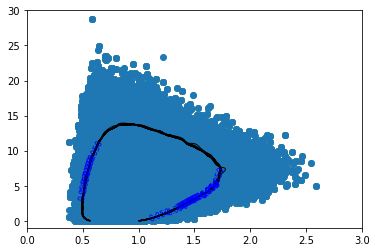

In [42]:


from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import numpy as np

def area(vs):
    a = 0
    x0,y0 = vs[0]
    for [x1,y1] in vs[1:]:
        dx = x1-x0
        dy = y1-y0
        a += 0.5*(y0*dx - x0*dy)
        x0 = x1
        y0 = y1
    return a

area_GW=[]

for upto_ind_run in range(1,22):
    RadVel = GW_ind_runs_chainlen100[GW_ind_runs_chainlen100.run_number<=upto_ind_run]['ratio'].values
    RelDist = GW_ind_runs_chainlen100[GW_ind_runs_chainlen100.run_number<=upto_ind_run]['Rg/Rg_mean'].values
    x = RelDist
    y = RadVel

    k = gaussian_kde(np.vstack([RelDist, RadVel]))
    xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j,y.min():y.max():y.size**0.5*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))

    #set zi to 0-1 scale
    zi = (zi-zi.min())/(zi.max() - zi.min())
    zi =zi.reshape(xi.shape)

    #set up plot
    origin = 'lower'
    levels = [0.05]
    SCA= plt.scatter(RelDist,RadVel)
    cs = plt.contour(xi, yi, zi,levels = levels,
                  colors=('k',),
                  linewidths=(1,),
                  origin=origin)



    # Get one of the contours from the plot.
    for i in range(len(levels)):
        contour = cs.collections[i]
        vs = contour.get_paths()[0].vertices
        # Compute area enclosed by vertices.
        a = area(vs)
        area_GW.append(a)
        print( "r = " + str(levels[i]) + ": a =" + str(a))


    plt.clabel(cs, fmt='%.3f', colors='b', fontsize=8,inline=False)
    plt.gca()
    plt.xlim(0,3)
    #plt.xscale('log')
    plt.ylim(-1,30)

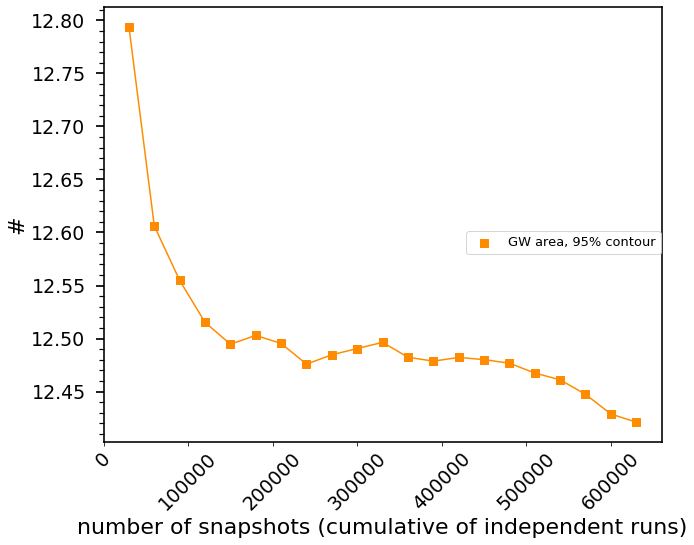

In [45]:
fig,ax=plt.subplots(figsize=(10,8))
GW_snaps=[GW_ind_runs_chainlen100[GW_ind_runs_chainlen100.run_number<=upto_ind_run].shape[0] for upto_ind_run in range(1,22)]
ax.scatter(GW_snaps,
           area_GW,
           color='darkorange',label='GW area, 95% contour' ,
           marker='s',s=80)
ax.plot(GW_snaps,
        area_GW,
        color='darkorange')



plt.setp(ax.get_xticklabels(),fontsize=19,rotation=45)
plt.setp(ax.get_yticklabels(),fontsize=19)
ax.set_xlabel('number of snapshots (cumulative of independent runs)',fontsize=22)
ax.set_ylabel('#',fontsize=22)
color_list = iter(cm.viridis(np.linspace(0, 1, GW_equil_chain_rg_ree.chain_length.unique().shape[0])))
#ax.axvline(x=0.02,ymin=0,ymax=1,linewidth=1.5,color=next(color_list),label='step size used for manuscript')
#ax.text(0.2,0.5,'both protein & GW have 180000 snapshots',
#                  transform=ax.transAxes,fontsize=18,color='black')

#ax.set_ylim(-0.05,1)
for i in ['top', 'left', 'right', 'bottom']:
    ax.spines[i].set_linewidth(1.6)
    
ax.minorticks_on()
ax.tick_params(axis='y', which='major', labelsize=19, width = 1.7, size = 8,pad=10)
ax.tick_params(axis='y', which='minor', width = 1.2, size = 5)        
ax.tick_params(axis='x', which='minor',bottom=False)        
ax.legend(fontsize=13,bbox_to_anchor=(1.01,0.5))
#ax.set_xscale('log')
#ax.set_yscale('log')

#plt.savefig('figures/fa_against_proton_states_pei.png', dpi = 1000, bbox_inches='tight')    



30000 snapshotsr = 0.1: a =10.025003204344483
60000 snapshotsr = 0.1: a =9.949341584659706
90000 snapshotsr = 0.1: a =9.913200533182534
120000 snapshotsr = 0.1: a =9.907899787219078
150000 snapshotsr = 0.1: a =9.888949412035434
180000 snapshotsr = 0.1: a =9.920401344902707
210000 snapshotsr = 0.1: a =9.904209801390872
240000 snapshotsr = 0.1: a =9.908159495440719
270000 snapshotsr = 0.1: a =9.920629746219412
300000 snapshotsr = 0.1: a =9.91702350788741
330000 snapshotsr = 0.1: a =9.907962777683306
360000 snapshotsr = 0.1: a =9.896800560693842
390000 snapshotsr = 0.1: a =9.899443099072501
420000 snapshotsr = 0.1: a =9.89873223987441
450000 snapshotsr = 0.1: a =9.905109241743707
480000 snapshotsr = 0.1: a =9.895047324877158
510000 snapshotsr = 0.1: a =9.89683715706811
540000 snapshotsr = 0.1: a =9.88712466924882
570000 snapshotsr = 0.1: a =9.88057782877755
600000 snapshotsr = 0.1: a =9.871609669870853
630000 snapshotsr = 0.1: a =9.875693364156202


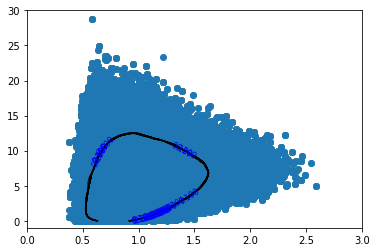

In [46]:


from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import numpy as np

def area(vs):
    a = 0
    x0,y0 = vs[0]
    for [x1,y1] in vs[1:]:
        dx = x1-x0
        dy = y1-y0
        a += 0.5*(y0*dx - x0*dy)
        x0 = x1
        y0 = y1
    return a

area_GW=[]

for upto_ind_run in range(1,22):
    RadVel = GW_ind_runs_chainlen100[GW_ind_runs_chainlen100.run_number<=upto_ind_run]['ratio'].values
    RelDist = GW_ind_runs_chainlen100[GW_ind_runs_chainlen100.run_number<=upto_ind_run]['Rg/Rg_mean'].values
    x = RelDist
    y = RadVel

    k = gaussian_kde(np.vstack([RelDist, RadVel]))
    xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j,y.min():y.max():y.size**0.5*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))

    #set zi to 0-1 scale
    zi = (zi-zi.min())/(zi.max() - zi.min())
    zi =zi.reshape(xi.shape)

    #set up plot
    origin = 'lower'
    levels = [0.1]
    SCA= plt.scatter(RelDist,RadVel)
    cs = plt.contour(xi, yi, zi,levels = levels,
                  colors=('k',),
                  linewidths=(1,),
                  origin=origin)



    # Get one of the contours from the plot.
    for i in range(len(levels)):
        contour = cs.collections[i]
        vs = contour.get_paths()[0].vertices
        # Compute area enclosed by vertices.
        a = area(vs)
        area_GW.append(a)
        print(f'{GW_ind_runs_chainlen100[GW_ind_runs_chainlen100.run_number<=upto_ind_run].shape[0]} snapshots' +"r = " + str(levels[i]) + ": a =" + str(a))


    plt.clabel(cs, fmt='%.3f', colors='b', fontsize=8,inline=False)
    plt.gca()
    plt.xlim(0,3)
    #plt.xscale('log')
    plt.ylim(-1,30)

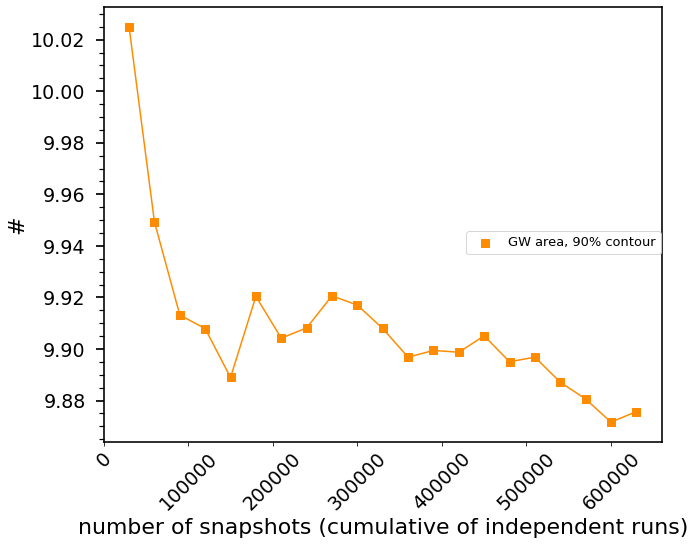

In [47]:
fig,ax=plt.subplots(figsize=(10,8))
GW_snaps=[GW_ind_runs_chainlen100[GW_ind_runs_chainlen100.run_number<=upto_ind_run].shape[0] for upto_ind_run in range(1,22)]
ax.scatter(GW_snaps,
           area_GW,
           color='darkorange',label='GW area, 90% contour' ,
           marker='s',s=80)
ax.plot(GW_snaps,
        area_GW,
        color='darkorange')



plt.setp(ax.get_xticklabels(),fontsize=19,rotation=45)
plt.setp(ax.get_yticklabels(),fontsize=19)
ax.set_xlabel('number of snapshots (cumulative of independent runs)',fontsize=22)
ax.set_ylabel('#',fontsize=22)
color_list = iter(cm.viridis(np.linspace(0, 1, GW_equil_chain_rg_ree.chain_length.unique().shape[0])))
#ax.axvline(x=0.02,ymin=0,ymax=1,linewidth=1.5,color=next(color_list),label='step size used for manuscript')
#ax.text(0.2,0.5,'both protein & GW have 180000 snapshots',
#                  transform=ax.transAxes,fontsize=18,color='black')

#ax.set_ylim(-0.05,1)
for i in ['top', 'left', 'right', 'bottom']:
    ax.spines[i].set_linewidth(1.6)
    
ax.minorticks_on()
ax.tick_params(axis='y', which='major', labelsize=19, width = 1.7, size = 8,pad=10)
ax.tick_params(axis='y', which='minor', width = 1.2, size = 5)        
ax.tick_params(axis='x', which='minor',bottom=False)        
ax.legend(fontsize=13,bbox_to_anchor=(1.01,0.5))
#ax.set_xscale('log')
#ax.set_yscale('log')

#plt.savefig('figures/fa_against_proton_states_pei.png', dpi = 1000, bbox_inches='tight')    



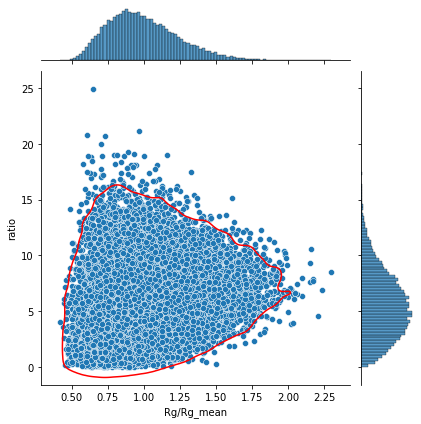

In [60]:
#upto_ind_run=1
g = sns.jointplot(data=GW_ind_runs_chainlen100[GW_ind_runs_chainlen100.run_number<=upto_ind_run],
            x='Rg/Rg_mean',y='ratio')
g.plot_joint(sns.kdeplot, color="r", zorder=10, levels=[0.01])


In [42]:
#this is for single chain length
def protein_3dplot_against_GW_specific_chain_length(protein_var,protein_label,second_obj,GW_chain_length,stepx,stepy):
    #different from the SAW+protein plots be careful
    # Define the x and y data 
    #be careful when doing select all and replace


    x_variable=r'$R_g\left/R_g^{mean}\right.$' 
    y_variable="Instantaneous Shape Ratio"



    epas_cutoff=0
    testeq_GW=GW_equil_chain_rg_ree.copy().sort_values(by='chain_length')
    
    %matplotlib inline
    plt.rcParams["font.weight"] = "regular"
    plt.rcParams["axes.labelweight"] = "regular"
    
    
    x_polmodel_GW=[]
    y_polmodel_GW=[]
    x_total=[]
    y_total=[]

    scatter_markers=['d','x',4,'o','v','^','1','8','s','p','P','*','X','D',9]



    #get chain_length from definition (def) line
    chain_length= GW_chain_length
    x=testeq_GW[(testeq_GW.chain_length==chain_length)  ]['Rg/Rg_mean']
    y=testeq_GW[(testeq_GW.chain_length==chain_length)  ].ratio
    x_polmodel_GW.append(x)
    y_polmodel_GW.append(y)



    if second_obj=='protein':        
        temp_protein =  protein_var.copy()

        for sim in temp_protein.sim.unique():
            x_total.append(temp_protein[temp_protein.sim==sim].Rg.values/temp_protein[temp_protein.sim==sim].Rg.mean())
            y_total.append(temp_protein[temp_protein.sim==sim].ratio.values)                    
        del temp_protein
    elif second_obj=='polymer_model':
        testeq_pol = protein_var.copy()
        epas_cutoff=  float(input('enter epas value'))      

        j=0
        for chain_length in testeq_pol.chain_length.unique():
            for epas in testeq_pol[testeq_pol.chain_length==chain_length].sort_values(by='epas').epas.unique():
                if epas==epas_cutoff:
                    x=testeq_pol[(testeq_pol.chain_length==chain_length) & (testeq_pol.epas==epas) ].Rg2**0.5/((testeq_pol[(testeq_pol.chain_length==chain_length) & (testeq_pol.epas==epas) ].Rg2**0.5).mean())
                    y=testeq_pol[(testeq_pol.chain_length==chain_length) & (testeq_pol.epas==epas) ].ratio
                    x_total.append(x)
                    y_total.append(y)

                    j+=1        
        
        del epas_cutoff, testeq_pol
    elif second_obj=='pei':
        testeq_pol = protein_var.copy()
        proton_cutoff=  float(input('enter protonation state'))      



        x=testeq_pol[(testeq_pol.proton==proton_cutoff)  ]['Rg/Rg_mean']
        y=testeq_pol[(testeq_pol.proton==proton_cutoff)  ].ratio
        x_total.append(x)
        y_total.append(y)
        
        del proton_cutoff, testeq_pol
        
    else:
        print('ERROR. FIX ERROR')


    #no more mention of epas beyond this point   

    x_total=list(chain.from_iterable(x_total))
    y_total=list(chain.from_iterable(y_total))
    x_polmodel_GW=list(chain.from_iterable(x_polmodel_GW))
    y_polmodel_GW=list(chain.from_iterable(y_polmodel_GW))
    #for grid box area calculation, extending xlim and ylim to 3 and 30 respectively
    raise_max_ylim=30-testeq_GW.ratio.max()
    raise_max_xlim=3-testeq_GW['Rg/Rg_mean'].max()
    max_ylim_ratio=30
    max_xlim_rg_rg_mean=3
    min_ylim_ratio=testeq_GW.ratio.min()
    min_xlim_rg_rg_mean=testeq_GW['Rg/Rg_mean'].min()

    #deleting x_polmodel_SAW and y_polmodel_SAW because they are no longer needed.
    #these two variables were added so that this cell was similar to SAW uncollapsed 3d plot cell
    del testeq_GW

    

    # Set up default x and y limits
    xlims = [min_xlim_rg_rg_mean,
             max_xlim_rg_rg_mean]
    ylims = [min_ylim_ratio,
             max_ylim_ratio]

    # Set up your x and y labels
    xlabel = x_variable
    ylabel = y_variable

    # Define the locations for the axes

    left, width = 0.12, 0.55
    bottom, height = 0.12, 0.55
    bottom_h = left_h = left+width
    rect_temperature = [left, bottom, width, height] # dimensions of temp plot
    rect_histx = [left, bottom_h, width, 0.25] # dimensions of x-histogram
    rect_histy = [left_h, bottom, 0.25, height] # dimensions of y-histogram


    # Set up the size of the figure
    fig = plt.figure(1, figsize=(9.5,9))

    # Make the three plots
    axTemperature = plt.axes(rect_temperature) # temperature plot
    axHistx = plt.axes(rect_histx) # x histogram
    axHisty = plt.axes(rect_histy) # y histogram


    axHistx.axes.get_xaxis().set_visible(False)
    axHisty.axes.get_yaxis().set_visible(False)


    # Find the min/max of the data
    xmin = min(xlims)
    xmax = max(xlims)
    ymin = min(ylims)
    ymax = max(ylims)

    # Remove the inner axes numbers of the histograms
    nullfmt = NullFormatter()
    #
    # Define the number of bins
    nxbins = 100
    nybins = 50
    nbins = nxbins+nybins

    xbins = linspace(start = xmin, stop = xmax, num = nxbins)
    ybins = linspace(start = ymin, stop = ymax, num = nybins)
    xcenter = (xbins[0:-1]+xbins[1:])/2.0
    ycenter = (ybins[0:-1]+ybins[1:])/2.0
    aspectratio = (1.0*(xmax - 0))/(1.38*ymax - 0)


    X = xcenter
    Y = ycenter

    axTemperature.scatter(x_polmodel_GW,y_polmodel_GW,
                      marker=scatter_markers[3],s=40,alpha=0.6,color='black',
                       label='GW')
    
    axTemperature.scatter(x_total,
               y_total,
               marker=scatter_markers[0],s=40,alpha=0.6,color='green',
                                      label=protein_label)                



    #Plot the axes labels
    axTemperature.set_xlabel(xlabel,fontsize=20)
    axTemperature.set_ylabel(ylabel,fontsize=20)


    # #Make the tickmarks pretty
    # ticklabels = axTemperature.get_xticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(18)
    #     label.set_family('serif')

    # ticklabels = axTemperature.get_yticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(18)
    #     label.set_family('serif')

    #Set up the plot limits
    axTemperature.set_xlim(xlims)
    axTemperature.set_ylim(ylims)

    #Set up the histogram bins
    xbins = np.arange(xmin, xmax, (xmax-xmin)/nbins)
    ybins = np.arange(ymin, ymax, (ymax-ymin)/nbins)


    axHistx.hist(x_polmodel_GW, bins=xbins, color = 'black',
                label='GW: All Chain Lengths',alpha=0.5,density=True)
    axHistx.hist(x_total, bins=xbins, color = 'green',
                label=protein_label,alpha=0.5,density=True)

    axHisty.hist(y_polmodel_GW, bins=ybins, color = 'black',orientation='horizontal',
                label='GW: All Chain Lengths',alpha=0.5,density=True)

    axHisty.hist(y_total, bins=ybins, color = 'green',orientation='horizontal',
                label=protein_label,alpha=0.5,density=True)
    
    
    
    #must use polmodel_GW as the denominator here.
    #original_n_divisions=100
    
    
    
    step_x=stepx
    step_y=stepy
    max_value_x=max_xlim_rg_rg_mean
    n_divisions_x=round((max_value_x-min_xlim_rg_rg_mean)/step_x)

    max_value_y=max_ylim_ratio
    n_divisions_y=round((max_value_y-min_ylim_ratio)/step_y)
    gridx = np.linspace(min_xlim_rg_rg_mean, max_value_x, n_divisions_x)


    gridy = np.linspace(min_ylim_ratio, max_value_y, n_divisions_y)
    global grid_protein, grid_GW
    grid_protein, _, _ = np.histogram2d(x_total, y_total, bins=[gridx, gridy])
    grid_GW, _, _ = np.histogram2d(x_polmodel_GW, y_polmodel_GW, bins=[gridx, gridy])

    axTemperature.text(0.7,0.75,
                       '$f_A$= '+format(((np.count_nonzero(grid_protein)/grid_protein.size)/(np.count_nonzero(grid_GW)/grid_GW.size)),'0.3f'),
                      transform=axTemperature.transAxes,fontsize=18)
    axTemperature.text(0.5,0.65,
                       'chain length = '+str(GW_chain_length),
                      transform=axTemperature.transAxes,fontsize=18)
    
#made fa_protein_pol global so that i can save variables and use them for fa_summary bar chart    
    global fa_protein_pol,common_i,non_overlap_GW,non_overlap_protein,fa_protein_common_box
    fa_protein_pol=format(((np.count_nonzero(grid_protein)/grid_protein.size)/(np.count_nonzero(grid_GW)/grid_GW.size)),'0.3f')
    fa_protein_pol=float(fa_protein_pol)
    common_i=np.column_stack(np.where(np.logical_and(grid_GW != 0, grid_protein != 0)))
    non_overlap_GW=np.column_stack(np.where(np.logical_and(grid_GW != 0, grid_protein == 0)))
    non_overlap_protein=np.column_stack(np.where(np.logical_and(grid_GW == 0, grid_protein != 0)))
    fa_protein_common_box=common_i.shape[0]/np.count_nonzero(grid_GW)
    print(fa_protein_pol,str(len(x_total)),str(len(x_polmodel_GW)),'GW chain length =',GW_chain_length)


#    axTemp_legend=axTemperature.legend(fontsize=15,
#                                       bbox_to_anchor=(1.4, 1.2))
    axTemp_legend=axTemperature.legend(fontsize=15)

    frame = axTemp_legend.get_frame()
    frame.set_linewidth(1.6)
    frame.set_edgecolor('black')
    #axHisty.hist(y, bins=ybins, orientation='horizontal', color = 'green')






    #Set up the histogram limits
    axHistx.set_xlim( xmin, xmax )
    axHisty.set_ylim( ymin, ymax )

    axHistx.set_ylabel('Prob. Density',fontsize=20)
    axHisty.set_xlabel('Prob. Density',fontsize=20)


    # #Make the tickmarks pretty
    # ticklabels = axHistx.get_yticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(12)
    #     label.set_family('serif')

    # #Make the tickmarks pretty    
    # ticklabels = axHistx.get_xticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(12)
    #     label.set_family('serif')    

    # #Make the tickmarks pretty
    # ticklabels = axHisty.get_xticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(12)
    #     label.set_family('serif')
    # #Make the tickmarks pretty
    # ticklabels = axHisty.get_yticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(12)
    #     label.set_family('serif')


    #Cool trick that changes the number of tickmarks for the histogram axes
    axHisty.xaxis.set_major_locator(MaxNLocator(4))
    axHistx.yaxis.set_major_locator(MaxNLocator(3))

    for i in ['top', 'left', 'right', 'bottom']:
        axHistx.spines[i].set_linewidth(1.6)
        axHisty.spines[i].set_linewidth(1.6)
        axTemperature.spines[i].set_linewidth(1.6)

    axHistx.minorticks_on()
    axHistx.tick_params(axis='y', which='major', labelsize=18, width = 1.7, size = 8,pad=10)
    axHistx.tick_params(axis='y', which='minor', width = 1.2, size = 5)
    axHisty.minorticks_on()
    axHisty.tick_params(axis='x', which='major', labelsize=18, width = 1.7, size = 8,pad=10,labelrotation=270)
    axHisty.tick_params(axis='x', which='minor', width = 1.2, size = 5)
    axTemperature.minorticks_on()
    axTemperature.tick_params(axis='both', which='major', labelsize=18, width = 1.7, size = 8,pad=10)
    axTemperature.tick_params(axis='both', which='minor', width = 1.2, size = 5)   
    plt.setp(axTemperature.get_yticklabels()[-1], visible=False)
    plt.setp(axTemperature.get_xticklabels()[-1], visible=False)
    #fig.subplots_adjust(hspace=0.85,wspace=0.85)





    # Save to a File
    filename = 'GW_3d_plot'
    #plt.savefig(f'figures/GW_{protein_label}_3dplot.png', dpi = 1000, bbox_inches='tight')
    return 


In [43]:
#this is for single chain length
def plot_3d_protein_specific_trajectory(protein_var,protein_label,second_obj,trajectory_list,
                                stepx,stepy):
    #different from the SAW+protein plots be careful
    # Define the x and y data 
    #be careful when doing select all and replace


    x_variable=r'$R_g\left/R_g^{mean}\right.$' 
    y_variable="Instantaneous Shape Ratio"



    epas_cutoff=0
    testeq_GW=GW_equil_chain_rg_ree.copy().sort_values(by='chain_length')
    
    %matplotlib inline
    plt.rcParams["font.weight"] = "regular"
    plt.rcParams["axes.labelweight"] = "regular"
    
    
    x_polmodel_GW=[]
    y_polmodel_GW=[]
    x_total=[]
    y_total=[]

    scatter_markers=['d','x',4,'o','v','^','1','8','s','p','P','*','X','D',9]



    #get chain_length from definition (def) line

    x=testeq_GW['Rg/Rg_mean']
    y=testeq_GW.ratio
    x_polmodel_GW.append(x)
    y_polmodel_GW.append(y)



    if second_obj=='protein':        
        temp_protein =  protein_var.copy()

        for sim in trajectory_list:
            x_total.append(temp_protein[temp_protein.sim==sim].Rg.values/temp_protein[temp_protein.sim==sim].Rg.mean())
            y_total.append(temp_protein[temp_protein.sim==sim].ratio.values)                    
        del temp_protein
    elif second_obj=='polymer_model':
        testeq_pol = protein_var.copy()
        epas_cutoff=  float(input('enter epas value'))      

        j=0
        for chain_length in testeq_pol.chain_length.unique():
            for epas in testeq_pol[testeq_pol.chain_length==chain_length].sort_values(by='epas').epas.unique():
                if epas==epas_cutoff:
                    x=testeq_pol[(testeq_pol.chain_length==chain_length) & (testeq_pol.epas==epas) ].Rg2**0.5/((testeq_pol[(testeq_pol.chain_length==chain_length) & (testeq_pol.epas==epas) ].Rg2**0.5).mean())
                    y=testeq_pol[(testeq_pol.chain_length==chain_length) & (testeq_pol.epas==epas) ].ratio
                    x_total.append(x)
                    y_total.append(y)

                    j+=1        
        
        del epas_cutoff, testeq_pol
    elif second_obj=='pei':
        testeq_pol = protein_var.copy()
        proton_cutoff=  float(input('enter protonation state'))      



        x=testeq_pol[(testeq_pol.proton==proton_cutoff)  ]['Rg/Rg_mean']
        y=testeq_pol[(testeq_pol.proton==proton_cutoff)  ].ratio
        x_total.append(x)
        y_total.append(y)
        
        del proton_cutoff, testeq_pol
        
    else:
        print('ERROR. FIX ERROR')


    #no more mention of epas beyond this point   

    x_total=list(chain.from_iterable(x_total))
    y_total=list(chain.from_iterable(y_total))
    x_polmodel_GW=list(chain.from_iterable(x_polmodel_GW))
    y_polmodel_GW=list(chain.from_iterable(y_polmodel_GW))
    #for grid box area calculation, extending xlim and ylim to 3 and 30 respectively
    raise_max_ylim=30-testeq_GW.ratio.max()
    raise_max_xlim=3-testeq_GW['Rg/Rg_mean'].max()
    max_ylim_ratio=30
    max_xlim_rg_rg_mean=3
    min_ylim_ratio=testeq_GW.ratio.min()
    min_xlim_rg_rg_mean=testeq_GW['Rg/Rg_mean'].min()

    #deleting x_polmodel_SAW and y_polmodel_SAW because they are no longer needed.
    #these two variables were added so that this cell was similar to SAW uncollapsed 3d plot cell
    del testeq_GW

    

    # Set up default x and y limits
    xlims = [min_xlim_rg_rg_mean,
             max_xlim_rg_rg_mean]
    ylims = [min_ylim_ratio,
             max_ylim_ratio]

    # Set up your x and y labels
    xlabel = x_variable
    ylabel = y_variable

    # Define the locations for the axes

    left, width = 0.12, 0.55
    bottom, height = 0.12, 0.55
    bottom_h = left_h = left+width
    rect_temperature = [left, bottom, width, height] # dimensions of temp plot
    rect_histx = [left, bottom_h, width, 0.25] # dimensions of x-histogram
    rect_histy = [left_h, bottom, 0.25, height] # dimensions of y-histogram


    # Set up the size of the figure
    fig = plt.figure(1, figsize=(9.5,9))

    # Make the three plots
    axTemperature = plt.axes(rect_temperature) # temperature plot
    axHistx = plt.axes(rect_histx) # x histogram
    axHisty = plt.axes(rect_histy) # y histogram


    axHistx.axes.get_xaxis().set_visible(False)
    axHisty.axes.get_yaxis().set_visible(False)


    # Find the min/max of the data
    xmin = min(xlims)
    xmax = max(xlims)
    ymin = min(ylims)
    ymax = max(ylims)

    # Remove the inner axes numbers of the histograms
    nullfmt = NullFormatter()
    #
    # Define the number of bins
    nxbins = 100
    nybins = 50
    nbins = nxbins+nybins

    xbins = linspace(start = xmin, stop = xmax, num = nxbins)
    ybins = linspace(start = ymin, stop = ymax, num = nybins)
    xcenter = (xbins[0:-1]+xbins[1:])/2.0
    ycenter = (ybins[0:-1]+ybins[1:])/2.0
    aspectratio = (1.0*(xmax - 0))/(1.38*ymax - 0)


    X = xcenter
    Y = ycenter

    axTemperature.scatter(x_polmodel_GW,y_polmodel_GW,
                      marker=scatter_markers[3],s=40,alpha=0.6,color='black',
                       label='GW')
    
    axTemperature.scatter(x_total,
               y_total,
               marker=scatter_markers[0],s=40,alpha=0.6,color='green',
                                      label=protein_label)                



    #Plot the axes labels
    axTemperature.set_xlabel(xlabel,fontsize=20)
    axTemperature.set_ylabel(ylabel,fontsize=20)


    # #Make the tickmarks pretty
    # ticklabels = axTemperature.get_xticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(18)
    #     label.set_family('serif')

    # ticklabels = axTemperature.get_yticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(18)
    #     label.set_family('serif')

    #Set up the plot limits
    axTemperature.set_xlim(xlims)
    axTemperature.set_ylim(ylims)

    #Set up the histogram bins
    xbins = np.arange(xmin, xmax, (xmax-xmin)/nbins)
    ybins = np.arange(ymin, ymax, (ymax-ymin)/nbins)


    axHistx.hist(x_polmodel_GW, bins=xbins, color = 'black',
                label='GW: All Chain Lengths',alpha=0.5,density=True)
    axHistx.hist(x_total, bins=xbins, color = 'green',
                label=protein_label,alpha=0.5,density=True)

    axHisty.hist(y_polmodel_GW, bins=ybins, color = 'black',orientation='horizontal',
                label='GW: All Chain Lengths',alpha=0.5,density=True)

    axHisty.hist(y_total, bins=ybins, color = 'green',orientation='horizontal',
                label=protein_label,alpha=0.5,density=True)
    
    
    
    #must use polmodel_GW as the denominator here.
    #original_n_divisions=100
    
    
    
    step_x=stepx
    step_y=stepy
    max_value_x=max_xlim_rg_rg_mean
    n_divisions_x=round((max_value_x-min_xlim_rg_rg_mean)/step_x)

    max_value_y=max_ylim_ratio
    n_divisions_y=round((max_value_y-min_ylim_ratio)/step_y)
    gridx = np.linspace(min_xlim_rg_rg_mean, max_value_x, n_divisions_x)


    gridy = np.linspace(min_ylim_ratio, max_value_y, n_divisions_y)
    global grid_protein, grid_GW
    grid_protein, _, _ = np.histogram2d(x_total, y_total, bins=[gridx, gridy])
    grid_GW, _, _ = np.histogram2d(x_polmodel_GW, y_polmodel_GW, bins=[gridx, gridy])

    axTemperature.text(0.7,0.75,
                       '$f_A$= '+format(((np.count_nonzero(grid_protein)/grid_protein.size)/(np.count_nonzero(grid_GW)/grid_GW.size)),'0.3f'),
                      transform=axTemperature.transAxes,fontsize=18)
    
#made fa_protein_pol global so that i can save variables and use them for fa_summary bar chart    
    global fa_protein_pol,common_i,non_overlap_GW,non_overlap_protein,fa_protein_common_box
    fa_protein_pol=format(((np.count_nonzero(grid_protein)/grid_protein.size)/(np.count_nonzero(grid_GW)/grid_GW.size)),'0.3f')
    fa_protein_pol=float(fa_protein_pol)
    common_i=np.column_stack(np.where(np.logical_and(grid_GW != 0, grid_protein != 0)))
    non_overlap_GW=np.column_stack(np.where(np.logical_and(grid_GW != 0, grid_protein == 0)))
    non_overlap_protein=np.column_stack(np.where(np.logical_and(grid_GW == 0, grid_protein != 0)))
    fa_protein_common_box=common_i.shape[0]/np.count_nonzero(grid_GW)
    print(fa_protein_pol,str(len(x_total)),str(len(x_polmodel_GW)),'protein traj combination =',trajectory_list)


#    axTemp_legend=axTemperature.legend(fontsize=15,
#                                       bbox_to_anchor=(1.4, 1.2))
    axTemp_legend=axTemperature.legend(fontsize=15)

    frame = axTemp_legend.get_frame()
    frame.set_linewidth(1.6)
    frame.set_edgecolor('black')
    #axHisty.hist(y, bins=ybins, orientation='horizontal', color = 'green')






    #Set up the histogram limits
    axHistx.set_xlim( xmin, xmax )
    axHisty.set_ylim( ymin, ymax )

    axHistx.set_ylabel('Prob. Density',fontsize=20)
    axHisty.set_xlabel('Prob. Density',fontsize=20)


    # #Make the tickmarks pretty
    # ticklabels = axHistx.get_yticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(12)
    #     label.set_family('serif')

    # #Make the tickmarks pretty    
    # ticklabels = axHistx.get_xticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(12)
    #     label.set_family('serif')    

    # #Make the tickmarks pretty
    # ticklabels = axHisty.get_xticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(12)
    #     label.set_family('serif')
    # #Make the tickmarks pretty
    # ticklabels = axHisty.get_yticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(12)
    #     label.set_family('serif')


    #Cool trick that changes the number of tickmarks for the histogram axes
    axHisty.xaxis.set_major_locator(MaxNLocator(4))
    axHistx.yaxis.set_major_locator(MaxNLocator(3))

    for i in ['top', 'left', 'right', 'bottom']:
        axHistx.spines[i].set_linewidth(1.6)
        axHisty.spines[i].set_linewidth(1.6)
        axTemperature.spines[i].set_linewidth(1.6)

    axHistx.minorticks_on()
    axHistx.tick_params(axis='y', which='major', labelsize=18, width = 1.7, size = 8,pad=10)
    axHistx.tick_params(axis='y', which='minor', width = 1.2, size = 5)
    axHisty.minorticks_on()
    axHisty.tick_params(axis='x', which='major', labelsize=18, width = 1.7, size = 8,pad=10,labelrotation=270)
    axHisty.tick_params(axis='x', which='minor', width = 1.2, size = 5)
    axTemperature.minorticks_on()
    axTemperature.tick_params(axis='both', which='major', labelsize=18, width = 1.7, size = 8,pad=10)
    axTemperature.tick_params(axis='both', which='minor', width = 1.2, size = 5)   
    plt.setp(axTemperature.get_yticklabels()[-1], visible=False)
    plt.setp(axTemperature.get_xticklabels()[-1], visible=False)
    #fig.subplots_adjust(hspace=0.85,wspace=0.85)





    # Save to a File
    filename = 'GW_3d_plot'
    #plt.savefig(f'figures/GW_{protein_label}_3dplot.png', dpi = 1000, bbox_inches='tight')
    return 


In [44]:

def only_protein_every_ith_snapshot(protein_var,protein_label,second_obj,every_ith_snap,stepx,stepy):
    #different from the SAW+protein plots be careful
    # Define the x and y data 
    #be careful when doing select all and replace


    x_variable=r'$R_g\left/R_g^{mean}\right.$' 
    y_variable="Instantaneous Shape Ratio"



    epas_cutoff=0
    testeq_GW=GW_equil_chain_rg_ree.copy().sort_values(by='chain_length')
    
    %matplotlib inline
    plt.rcParams["font.weight"] = "regular"
    plt.rcParams["axes.labelweight"] = "regular"
    
    
    x_polmodel_GW=[]
    y_polmodel_GW=[]
    x_total=[]
    y_total=[]

    scatter_markers=['d','x',4,'o','v','^','1','8','s','p','P','*','X','D',9]



    #get chain_length from definition (def) line
  
    x_polmodel_GW.append(testeq_GW['Rg/Rg_mean'])
    y_polmodel_GW.append(testeq_GW['ratio'])

    if second_obj=='protein':   
        temp_protein=protein_var.copy()
        x_total.append(temp_protein['Rg/Rg_mean'].iloc[::every_ith_snap])
        y_total.append(temp_protein['ratio'].iloc[::every_ith_snap])                    

        del temp_protein
    elif second_obj=='polymer_model':
        testeq_pol = protein_var.copy()
        epas_cutoff=  float(input('enter epas value'))      

        j=0
        for chain_length in testeq_pol.chain_length.unique():
            for epas in testeq_pol[testeq_pol.chain_length==chain_length].sort_values(by='epas').epas.unique():
                if epas==epas_cutoff:
                    x=testeq_pol[(testeq_pol.chain_length==chain_length) & (testeq_pol.epas==epas) ].Rg2**0.5/((testeq_pol[(testeq_pol.chain_length==chain_length) & (testeq_pol.epas==epas) ].Rg2**0.5).mean())
                    y=testeq_pol[(testeq_pol.chain_length==chain_length) & (testeq_pol.epas==epas) ].ratio
                    x_total.append(x)
                    y_total.append(y)

                    j+=1        
        
        del epas_cutoff, testeq_pol
    elif second_obj=='pei':
        testeq_pol = protein_var.copy()
        proton_cutoff=  float(input('enter protonation state'))      



        x=testeq_pol[(testeq_pol.proton==proton_cutoff)  ]['Rg/Rg_mean']
        y=testeq_pol[(testeq_pol.proton==proton_cutoff)  ].ratio
        x_total.append(x)
        y_total.append(y)
        
        del proton_cutoff, testeq_pol
        
    else:
        print('ERROR. FIX ERROR')


    #no more mention of epas beyond this point   

    x_total=list(chain.from_iterable(x_total))
    y_total=list(chain.from_iterable(y_total))
    x_polmodel_GW=list(chain.from_iterable(x_polmodel_GW))
    y_polmodel_GW=list(chain.from_iterable(y_polmodel_GW))
    #for grid box area calculation, extending xlim and ylim to 3 and 30 respectively
    raise_max_ylim=30-testeq_GW.ratio.max()
    raise_max_xlim=3-testeq_GW['Rg/Rg_mean'].max()
    max_ylim_ratio=30
    max_xlim_rg_rg_mean=3
    min_ylim_ratio=testeq_GW.ratio.min()
    min_xlim_rg_rg_mean=testeq_GW['Rg/Rg_mean'].min()

    #deleting x_polmodel_SAW and y_polmodel_SAW because they are no longer needed.
    #these two variables were added so that this cell was similar to SAW uncollapsed 3d plot cell
    del testeq_GW

    

    # Set up default x and y limits
    xlims = [min_xlim_rg_rg_mean,
             max_xlim_rg_rg_mean]
    ylims = [min_ylim_ratio,
             max_ylim_ratio]

    # Set up your x and y labels
    xlabel = x_variable
    ylabel = y_variable

    # Define the locations for the axes

    left, width = 0.12, 0.55
    bottom, height = 0.12, 0.55
    bottom_h = left_h = left+width
    rect_temperature = [left, bottom, width, height] # dimensions of temp plot
    rect_histx = [left, bottom_h, width, 0.25] # dimensions of x-histogram
    rect_histy = [left_h, bottom, 0.25, height] # dimensions of y-histogram


    # Set up the size of the figure
    fig = plt.figure(1, figsize=(9.5,9))

    # Make the three plots
    axTemperature = plt.axes(rect_temperature) # temperature plot
    axHistx = plt.axes(rect_histx) # x histogram
    axHisty = plt.axes(rect_histy) # y histogram


    axHistx.axes.get_xaxis().set_visible(False)
    axHisty.axes.get_yaxis().set_visible(False)


    # Find the min/max of the data
    xmin = min(xlims)
    xmax = max(xlims)
    ymin = min(ylims)
    ymax = max(ylims)

    # Remove the inner axes numbers of the histograms
    nullfmt = NullFormatter()
    #
    # Define the number of bins
    nxbins = 100
    nybins = 50
    nbins = nxbins+nybins

    xbins = linspace(start = xmin, stop = xmax, num = nxbins)
    ybins = linspace(start = ymin, stop = ymax, num = nybins)
    xcenter = (xbins[0:-1]+xbins[1:])/2.0
    ycenter = (ybins[0:-1]+ybins[1:])/2.0
    aspectratio = (1.0*(xmax - 0))/(1.38*ymax - 0)


    X = xcenter
    Y = ycenter

    axTemperature.scatter(x_polmodel_GW,y_polmodel_GW,
                      marker=scatter_markers[3],s=40,alpha=0.6,color='black',
                       label='GW')
    
    axTemperature.scatter(x_total,
               y_total,
               marker=scatter_markers[0],s=40,alpha=0.6,color='green',
                                      label=protein_label)                



    #Plot the axes labels
    axTemperature.set_xlabel(xlabel,fontsize=20)
    axTemperature.set_ylabel(ylabel,fontsize=20)


    # #Make the tickmarks pretty
    # ticklabels = axTemperature.get_xticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(18)
    #     label.set_family('serif')

    # ticklabels = axTemperature.get_yticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(18)
    #     label.set_family('serif')

    #Set up the plot limits
    axTemperature.set_xlim(xlims)
    axTemperature.set_ylim(ylims)

    #Set up the histogram bins
    xbins = np.arange(xmin, xmax, (xmax-xmin)/nbins)
    ybins = np.arange(ymin, ymax, (ymax-ymin)/nbins)


    axHistx.hist(x_polmodel_GW, bins=xbins, color = 'black',
                label='GW: All Chain Lengths',alpha=0.5,density=True)
    axHistx.hist(x_total, bins=xbins, color = 'green',
                label=protein_label,alpha=0.5,density=True)

    axHisty.hist(y_polmodel_GW, bins=ybins, color = 'black',orientation='horizontal',
                label='GW: All Chain Lengths',alpha=0.5,density=True)

    axHisty.hist(y_total, bins=ybins, color = 'green',orientation='horizontal',
                label=protein_label,alpha=0.5,density=True)
    
    
    
    #must use polmodel_GW as the denominator here.
    #original_n_divisions=100
    
    
    
    step_x=stepx
    step_y=stepy
    max_value_x=max_xlim_rg_rg_mean
    n_divisions_x=round((max_value_x-min_xlim_rg_rg_mean)/step_x)

    max_value_y=max_ylim_ratio
    n_divisions_y=round((max_value_y-min_ylim_ratio)/step_y)
    gridx = np.linspace(min_xlim_rg_rg_mean, max_value_x, n_divisions_x)


    gridy = np.linspace(min_ylim_ratio, max_value_y, n_divisions_y)
    global grid_protein, grid_GW
    grid_protein, _, _ = np.histogram2d(x_total, y_total, bins=[gridx, gridy])
    grid_GW, _, _ = np.histogram2d(x_polmodel_GW, y_polmodel_GW, bins=[gridx, gridy])

    axTemperature.text(0.7,0.75,
                       '$f_A$= '+format(((np.count_nonzero(grid_protein)/grid_protein.size)/(np.count_nonzero(grid_GW)/grid_GW.size)),'0.3f'),
                      transform=axTemperature.transAxes,fontsize=18)
    axTemperature.text(0.25,0.65,
                       '# of total snapshots = '+ str(len(x_polmodel_GW)),
                      transform=axTemperature.transAxes,fontsize=18)
    
#made fa_protein_pol global so that i can save variables and use them for fa_summary bar chart    
    global fa_protein_pol,common_i,non_overlap_GW,non_overlap_protein,fa_protein_common_box
    fa_protein_pol=format(((np.count_nonzero(grid_protein)/grid_protein.size)/(np.count_nonzero(grid_GW)/grid_GW.size)),'0.3f')
    fa_protein_pol=float(fa_protein_pol)
    common_i=np.column_stack(np.where(np.logical_and(grid_GW != 0, grid_protein != 0)))
    non_overlap_GW=np.column_stack(np.where(np.logical_and(grid_GW != 0, grid_protein == 0)))
    non_overlap_protein=np.column_stack(np.where(np.logical_and(grid_GW == 0, grid_protein != 0)))
    fa_protein_common_box=common_i.shape[0]/np.count_nonzero(grid_GW)
    print(fa_protein_pol,str(len(x_total)),str(len(x_polmodel_GW)))




#    axTemp_legend=axTemperature.legend(fontsize=15,
#                                       bbox_to_anchor=(1.4, 1.2))
    axTemp_legend=axTemperature.legend(fontsize=15)

    frame = axTemp_legend.get_frame()
    frame.set_linewidth(1.6)
    frame.set_edgecolor('black')
    #axHisty.hist(y, bins=ybins, orientation='horizontal', color = 'green')






    #Set up the histogram limits
    axHistx.set_xlim( xmin, xmax )
    axHisty.set_ylim( ymin, ymax )

    axHistx.set_ylabel('Prob. Density',fontsize=20)
    axHisty.set_xlabel('Prob. Density',fontsize=20)


    # #Make the tickmarks pretty
    # ticklabels = axHistx.get_yticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(12)
    #     label.set_family('serif')

    # #Make the tickmarks pretty    
    # ticklabels = axHistx.get_xticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(12)
    #     label.set_family('serif')    

    # #Make the tickmarks pretty
    # ticklabels = axHisty.get_xticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(12)
    #     label.set_family('serif')
    # #Make the tickmarks pretty
    # ticklabels = axHisty.get_yticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(12)
    #     label.set_family('serif')


    #Cool trick that changes the number of tickmarks for the histogram axes
    axHisty.xaxis.set_major_locator(MaxNLocator(4))
    axHistx.yaxis.set_major_locator(MaxNLocator(3))

    for i in ['top', 'left', 'right', 'bottom']:
        axHistx.spines[i].set_linewidth(1.6)
        axHisty.spines[i].set_linewidth(1.6)
        axTemperature.spines[i].set_linewidth(1.6)

    axHistx.minorticks_on()
    axHistx.tick_params(axis='y', which='major', labelsize=18, width = 1.7, size = 8,pad=10)
    axHistx.tick_params(axis='y', which='minor', width = 1.2, size = 5)
    axHisty.minorticks_on()
    axHisty.tick_params(axis='x', which='major', labelsize=18, width = 1.7, size = 8,pad=10,labelrotation=270)
    axHisty.tick_params(axis='x', which='minor', width = 1.2, size = 5)
    axTemperature.minorticks_on()
    axTemperature.tick_params(axis='both', which='major', labelsize=18, width = 1.7, size = 8,pad=10)
    axTemperature.tick_params(axis='both', which='minor', width = 1.2, size = 5)   
    plt.setp(axTemperature.get_yticklabels()[-1], visible=False)
    plt.setp(axTemperature.get_xticklabels()[-1], visible=False)
    #fig.subplots_adjust(hspace=0.85,wspace=0.85)





    # Save to a File
    filename = 'GW_3d_plot'
    #plt.savefig(f'figures/GW_{protein_label}_3dplot.png', dpi = 1000, bbox_inches='tight')
    return 


In [45]:
#this is for single chain length
def protein_3dplot_against_GW_every_ith_snapshot(protein_var,protein_label,second_obj,every_ith_snap,stepx,stepy):
    #different from the SAW+protein plots be careful
    # Define the x and y data 
    #be careful when doing select all and replace


    x_variable=r'$R_g\left/R_g^{mean}\right.$' 
    y_variable="Instantaneous Shape Ratio"



    epas_cutoff=0
    testeq_GW=GW_equil_chain_rg_ree.copy().sort_values(by='chain_length')
    
    %matplotlib inline
    plt.rcParams["font.weight"] = "regular"
    plt.rcParams["axes.labelweight"] = "regular"
    
    
    x_polmodel_GW=[]
    y_polmodel_GW=[]
    x_total=[]
    y_total=[]

    scatter_markers=['d','x',4,'o','v','^','1','8','s','p','P','*','X','D',9]



    #get chain_length from definition (def) line
  
    x_polmodel_GW.append(testeq_GW['Rg/Rg_mean'].iloc[::every_ith_snap])
    y_polmodel_GW.append(testeq_GW['ratio'].iloc[::every_ith_snap])

    if second_obj=='protein':        
        temp_protein =  protein_var.copy()
        for sim in temp_protein.sim.unique():
            x_total.append(temp_protein[temp_protein.sim==sim].Rg.values/temp_protein[temp_protein.sim==sim].Rg.mean())
            y_total.append(temp_protein[temp_protein.sim==sim].ratio.values)                    
        del temp_protein
    elif second_obj=='polymer_model':
        testeq_pol = protein_var.copy()
        epas_cutoff=  float(input('enter epas value'))      

        j=0
        for chain_length in testeq_pol.chain_length.unique():
            for epas in testeq_pol[testeq_pol.chain_length==chain_length].sort_values(by='epas').epas.unique():
                if epas==epas_cutoff:
                    x=testeq_pol[(testeq_pol.chain_length==chain_length) & (testeq_pol.epas==epas) ].Rg2**0.5/((testeq_pol[(testeq_pol.chain_length==chain_length) & (testeq_pol.epas==epas) ].Rg2**0.5).mean())
                    y=testeq_pol[(testeq_pol.chain_length==chain_length) & (testeq_pol.epas==epas) ].ratio
                    x_total.append(x)
                    y_total.append(y)

                    j+=1        
        
        del epas_cutoff, testeq_pol
    elif second_obj=='pei':
        testeq_pol = protein_var.copy()
        proton_cutoff=  float(input('enter protonation state'))      



        x=testeq_pol[(testeq_pol.proton==proton_cutoff)  ]['Rg/Rg_mean']
        y=testeq_pol[(testeq_pol.proton==proton_cutoff)  ].ratio
        x_total.append(x)
        y_total.append(y)
        
        del proton_cutoff, testeq_pol
        
    else:
        print('ERROR. FIX ERROR')


    #no more mention of epas beyond this point   

    x_total=list(chain.from_iterable(x_total))
    y_total=list(chain.from_iterable(y_total))
    x_polmodel_GW=list(chain.from_iterable(x_polmodel_GW))
    y_polmodel_GW=list(chain.from_iterable(y_polmodel_GW))
    #for grid box area calculation, extending xlim and ylim to 3 and 30 respectively
    raise_max_ylim=30-testeq_GW.ratio.max()
    raise_max_xlim=3-testeq_GW['Rg/Rg_mean'].max()
    max_ylim_ratio=30
    max_xlim_rg_rg_mean=3
    min_ylim_ratio=testeq_GW.ratio.min()
    min_xlim_rg_rg_mean=testeq_GW['Rg/Rg_mean'].min()

    #deleting x_polmodel_SAW and y_polmodel_SAW because they are no longer needed.
    #these two variables were added so that this cell was similar to SAW uncollapsed 3d plot cell
    del testeq_GW

    

    # Set up default x and y limits
    xlims = [min_xlim_rg_rg_mean,
             max_xlim_rg_rg_mean]
    ylims = [min_ylim_ratio,
             max_ylim_ratio]

    # Set up your x and y labels
    xlabel = x_variable
    ylabel = y_variable

    # Define the locations for the axes

    left, width = 0.12, 0.55
    bottom, height = 0.12, 0.55
    bottom_h = left_h = left+width
    rect_temperature = [left, bottom, width, height] # dimensions of temp plot
    rect_histx = [left, bottom_h, width, 0.25] # dimensions of x-histogram
    rect_histy = [left_h, bottom, 0.25, height] # dimensions of y-histogram


    # Set up the size of the figure
    fig = plt.figure(1, figsize=(9.5,9))

    # Make the three plots
    axTemperature = plt.axes(rect_temperature) # temperature plot
    axHistx = plt.axes(rect_histx) # x histogram
    axHisty = plt.axes(rect_histy) # y histogram


    axHistx.axes.get_xaxis().set_visible(False)
    axHisty.axes.get_yaxis().set_visible(False)


    # Find the min/max of the data
    xmin = min(xlims)
    xmax = max(xlims)
    ymin = min(ylims)
    ymax = max(ylims)

    # Remove the inner axes numbers of the histograms
    nullfmt = NullFormatter()
    #
    # Define the number of bins
    nxbins = 100
    nybins = 50
    nbins = nxbins+nybins

    xbins = linspace(start = xmin, stop = xmax, num = nxbins)
    ybins = linspace(start = ymin, stop = ymax, num = nybins)
    xcenter = (xbins[0:-1]+xbins[1:])/2.0
    ycenter = (ybins[0:-1]+ybins[1:])/2.0
    aspectratio = (1.0*(xmax - 0))/(1.38*ymax - 0)


    X = xcenter
    Y = ycenter

    axTemperature.scatter(x_polmodel_GW,y_polmodel_GW,
                      marker=scatter_markers[3],s=40,alpha=0.6,color='black',
                       label='GW')
    
    axTemperature.scatter(x_total,
               y_total,
               marker=scatter_markers[0],s=40,alpha=0.6,color='green',
                                      label=protein_label)                



    #Plot the axes labels
    axTemperature.set_xlabel(xlabel,fontsize=20)
    axTemperature.set_ylabel(ylabel,fontsize=20)


    # #Make the tickmarks pretty
    # ticklabels = axTemperature.get_xticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(18)
    #     label.set_family('serif')

    # ticklabels = axTemperature.get_yticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(18)
    #     label.set_family('serif')

    #Set up the plot limits
    axTemperature.set_xlim(xlims)
    axTemperature.set_ylim(ylims)

    #Set up the histogram bins
    xbins = np.arange(xmin, xmax, (xmax-xmin)/nbins)
    ybins = np.arange(ymin, ymax, (ymax-ymin)/nbins)


    axHistx.hist(x_polmodel_GW, bins=xbins, color = 'black',
                label='GW: All Chain Lengths',alpha=0.5,density=True)
    axHistx.hist(x_total, bins=xbins, color = 'green',
                label=protein_label,alpha=0.5,density=True)

    axHisty.hist(y_polmodel_GW, bins=ybins, color = 'black',orientation='horizontal',
                label='GW: All Chain Lengths',alpha=0.5,density=True)

    axHisty.hist(y_total, bins=ybins, color = 'green',orientation='horizontal',
                label=protein_label,alpha=0.5,density=True)
    
    
    
    #must use polmodel_GW as the denominator here.
    #original_n_divisions=100
    
    
    
    step_x=stepx
    step_y=stepy
    max_value_x=max_xlim_rg_rg_mean
    n_divisions_x=round((max_value_x-min_xlim_rg_rg_mean)/step_x)

    max_value_y=max_ylim_ratio
    n_divisions_y=round((max_value_y-min_ylim_ratio)/step_y)
    gridx = np.linspace(min_xlim_rg_rg_mean, max_value_x, n_divisions_x)


    gridy = np.linspace(min_ylim_ratio, max_value_y, n_divisions_y)
    global grid_protein, grid_GW
    grid_protein, _, _ = np.histogram2d(x_total, y_total, bins=[gridx, gridy])
    grid_GW, _, _ = np.histogram2d(x_polmodel_GW, y_polmodel_GW, bins=[gridx, gridy])

    axTemperature.text(0.7,0.75,
                       '$f_A$= '+format(((np.count_nonzero(grid_protein)/grid_protein.size)/(np.count_nonzero(grid_GW)/grid_GW.size)),'0.3f'),
                      transform=axTemperature.transAxes,fontsize=18)
    axTemperature.text(0.25,0.65,
                       '# of total snapshots = '+ str(len(x_polmodel_GW)),
                      transform=axTemperature.transAxes,fontsize=18)
    
#made fa_protein_pol global so that i can save variables and use them for fa_summary bar chart    
    global fa_protein_pol
    fa_protein_pol=format(((np.count_nonzero(grid_protein)/grid_protein.size)/(np.count_nonzero(grid_GW)/grid_GW.size)),'0.3f')
    fa_protein_pol=float(fa_protein_pol)
    print(fa_protein_pol,str(len(x_total)),str(len(x_polmodel_GW)))
#    axTemp_legend=axTemperature.legend(fontsize=15,
#                                       bbox_to_anchor=(1.4, 1.2))
    axTemp_legend=axTemperature.legend(fontsize=15)

    frame = axTemp_legend.get_frame()
    frame.set_linewidth(1.6)
    frame.set_edgecolor('black')
    #axHisty.hist(y, bins=ybins, orientation='horizontal', color = 'green')






    #Set up the histogram limits
    axHistx.set_xlim( xmin, xmax )
    axHisty.set_ylim( ymin, ymax )

    axHistx.set_ylabel('Prob. Density',fontsize=20)
    axHisty.set_xlabel('Prob. Density',fontsize=20)


    # #Make the tickmarks pretty
    # ticklabels = axHistx.get_yticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(12)
    #     label.set_family('serif')

    # #Make the tickmarks pretty    
    # ticklabels = axHistx.get_xticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(12)
    #     label.set_family('serif')    

    # #Make the tickmarks pretty
    # ticklabels = axHisty.get_xticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(12)
    #     label.set_family('serif')
    # #Make the tickmarks pretty
    # ticklabels = axHisty.get_yticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(12)
    #     label.set_family('serif')


    #Cool trick that changes the number of tickmarks for the histogram axes
    axHisty.xaxis.set_major_locator(MaxNLocator(4))
    axHistx.yaxis.set_major_locator(MaxNLocator(3))

    for i in ['top', 'left', 'right', 'bottom']:
        axHistx.spines[i].set_linewidth(1.6)
        axHisty.spines[i].set_linewidth(1.6)
        axTemperature.spines[i].set_linewidth(1.6)

    axHistx.minorticks_on()
    axHistx.tick_params(axis='y', which='major', labelsize=18, width = 1.7, size = 8,pad=10)
    axHistx.tick_params(axis='y', which='minor', width = 1.2, size = 5)
    axHisty.minorticks_on()
    axHisty.tick_params(axis='x', which='major', labelsize=18, width = 1.7, size = 8,pad=10,labelrotation=270)
    axHisty.tick_params(axis='x', which='minor', width = 1.2, size = 5)
    axTemperature.minorticks_on()
    axTemperature.tick_params(axis='both', which='major', labelsize=18, width = 1.7, size = 8,pad=10)
    axTemperature.tick_params(axis='both', which='minor', width = 1.2, size = 5)   
    plt.setp(axTemperature.get_yticklabels()[-1], visible=False)
    plt.setp(axTemperature.get_xticklabels()[-1], visible=False)
    #fig.subplots_adjust(hspace=0.85,wspace=0.85)





    # Save to a File
    filename = 'GW_3d_plot'
    #plt.savefig(f'figures/GW_{protein_label}_3dplot.png', dpi = 1000, bbox_inches='tight')
    return 


In [46]:
#this is for single chain length
def protein_3dplot_against_GW_ind_runs(GW_var,protein_var,protein_label,
                                                          second_obj,ind_run_number,stepx,stepy):
    #different from the SAW+protein plots be careful
    # Define the x and y data 
    #be careful when doing select all and replace


    x_variable=r'$R_g\left/R_g^{mean}\right.$' 
    y_variable="Instantaneous Shape Ratio"



    epas_cutoff=0
    testeq_GW=GW_var.copy()
    
    %matplotlib inline
    plt.rcParams["font.weight"] = "regular"
    plt.rcParams["axes.labelweight"] = "regular"
    
    
    x_polmodel_GW=[]
    y_polmodel_GW=[]
    x_total=[]
    y_total=[]

    scatter_markers=['d','x',4,'o','v','^','1','8','s','p','P','*','X','D',9]



    #get chain_length from definition (def) line
  
    x_polmodel_GW.append(testeq_GW[testeq_GW.run_number==ind_run_number]['Rg/Rg_mean'])
    y_polmodel_GW.append(testeq_GW[testeq_GW.run_number==ind_run_number]['ratio'])

    if second_obj=='protein':        
        temp_protein =  protein_var.copy()
        for sim in temp_protein.sim.unique():
            x_total.append(temp_protein[temp_protein.sim==sim].Rg.values/temp_protein[temp_protein.sim==sim].Rg.mean())
            y_total.append(temp_protein[temp_protein.sim==sim].ratio.values)                    
        del temp_protein
    elif second_obj=='polymer_model':
        testeq_pol = protein_var.copy()
        epas_cutoff=  float(input('enter epas value'))      

        j=0
        for chain_length in testeq_pol.chain_length.unique():
            for epas in testeq_pol[testeq_pol.chain_length==chain_length].sort_values(by='epas').epas.unique():
                if epas==epas_cutoff:
                    x=testeq_pol[(testeq_pol.chain_length==chain_length) & (testeq_pol.epas==epas) ].Rg2**0.5/((testeq_pol[(testeq_pol.chain_length==chain_length) & (testeq_pol.epas==epas) ].Rg2**0.5).mean())
                    y=testeq_pol[(testeq_pol.chain_length==chain_length) & (testeq_pol.epas==epas) ].ratio
                    x_total.append(x)
                    y_total.append(y)

                    j+=1        
        
        del epas_cutoff, testeq_pol
    elif second_obj=='pei':
        testeq_pol = protein_var.copy()
        proton_cutoff=  float(input('enter protonation state'))      



        x=testeq_pol[(testeq_pol.proton==proton_cutoff)  ]['Rg/Rg_mean']
        y=testeq_pol[(testeq_pol.proton==proton_cutoff)  ].ratio
        x_total.append(x)
        y_total.append(y)
        
        del proton_cutoff, testeq_pol
        
    else:
        print('ERROR. FIX ERROR')


    #no more mention of epas beyond this point   

    x_total=list(chain.from_iterable(x_total))
    y_total=list(chain.from_iterable(y_total))
    x_polmodel_GW=list(chain.from_iterable(x_polmodel_GW))
    y_polmodel_GW=list(chain.from_iterable(y_polmodel_GW))
    #for grid box area calculation, extending xlim and ylim to 3 and 30 respectively
    raise_max_ylim=30-GW_equil_chain_rg_ree.ratio.max()
    raise_max_xlim=3-GW_equil_chain_rg_ree['Rg/Rg_mean'].max()
    max_ylim_ratio=30
    max_xlim_rg_rg_mean=3
    min_ylim_ratio=GW_equil_chain_rg_ree.ratio.min()
    min_xlim_rg_rg_mean=GW_equil_chain_rg_ree['Rg/Rg_mean'].min()

    #deleting x_polmodel_SAW and y_polmodel_SAW because they are no longer needed.
    #these two variables were added so that this cell was similar to SAW uncollapsed 3d plot cell
    del testeq_GW

    

    # Set up default x and y limits
    xlims = [min_xlim_rg_rg_mean,
             max_xlim_rg_rg_mean]
    ylims = [min_ylim_ratio,
             max_ylim_ratio]

    # Set up your x and y labels
    xlabel = x_variable
    ylabel = y_variable

    # Define the locations for the axes

    left, width = 0.12, 0.55
    bottom, height = 0.12, 0.55
    bottom_h = left_h = left+width
    rect_temperature = [left, bottom, width, height] # dimensions of temp plot
    rect_histx = [left, bottom_h, width, 0.25] # dimensions of x-histogram
    rect_histy = [left_h, bottom, 0.25, height] # dimensions of y-histogram


    # Set up the size of the figure
    fig = plt.figure(1, figsize=(9.5,9))

    # Make the three plots
    axTemperature = plt.axes(rect_temperature) # temperature plot
    axHistx = plt.axes(rect_histx) # x histogram
    axHisty = plt.axes(rect_histy) # y histogram


    axHistx.axes.get_xaxis().set_visible(False)
    axHisty.axes.get_yaxis().set_visible(False)


    # Find the min/max of the data
    xmin = min(xlims)
    xmax = max(xlims)
    ymin = min(ylims)
    ymax = max(ylims)

    # Remove the inner axes numbers of the histograms
    nullfmt = NullFormatter()
    #
    # Define the number of bins
    nxbins = 100
    nybins = 50
    nbins = nxbins+nybins

    xbins = linspace(start = xmin, stop = xmax, num = nxbins)
    ybins = linspace(start = ymin, stop = ymax, num = nybins)
    xcenter = (xbins[0:-1]+xbins[1:])/2.0
    ycenter = (ybins[0:-1]+ybins[1:])/2.0
    aspectratio = (1.0*(xmax - 0))/(1.38*ymax - 0)


    X = xcenter
    Y = ycenter

    axTemperature.scatter(x_polmodel_GW,y_polmodel_GW,
                      marker=scatter_markers[3],s=40,alpha=0.6,color='black',
                       label='GW')
    
    axTemperature.scatter(x_total,
               y_total,
               marker=scatter_markers[0],s=40,alpha=0.6,color='green',
                                      label=protein_label)                



    #Plot the axes labels
    axTemperature.set_xlabel(xlabel,fontsize=20)
    axTemperature.set_ylabel(ylabel,fontsize=20)


    # #Make the tickmarks pretty
    # ticklabels = axTemperature.get_xticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(18)
    #     label.set_family('serif')

    # ticklabels = axTemperature.get_yticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(18)
    #     label.set_family('serif')

    #Set up the plot limits
    axTemperature.set_xlim(xlims)
    axTemperature.set_ylim(ylims)

    #Set up the histogram bins
    xbins = np.arange(xmin, xmax, (xmax-xmin)/nbins)
    ybins = np.arange(ymin, ymax, (ymax-ymin)/nbins)


    axHistx.hist(x_polmodel_GW, bins=xbins, color = 'black',
                label='GW: All Chain Lengths',alpha=0.5,density=True)
    axHistx.hist(x_total, bins=xbins, color = 'green',
                label=protein_label,alpha=0.5,density=True)

    axHisty.hist(y_polmodel_GW, bins=ybins, color = 'black',orientation='horizontal',
                label='GW: All Chain Lengths',alpha=0.5,density=True)

    axHisty.hist(y_total, bins=ybins, color = 'green',orientation='horizontal',
                label=protein_label,alpha=0.5,density=True)
    
    
    
    #must use polmodel_GW as the denominator here.
    #original_n_divisions=100
    
    
    
    step_x=stepx
    step_y=stepy
    max_value_x=max_xlim_rg_rg_mean
    n_divisions_x=round((max_value_x-min_xlim_rg_rg_mean)/step_x)

    max_value_y=max_ylim_ratio
    n_divisions_y=round((max_value_y-min_ylim_ratio)/step_y)
    gridx = np.linspace(min_xlim_rg_rg_mean, max_value_x, n_divisions_x)


    gridy = np.linspace(min_ylim_ratio, max_value_y, n_divisions_y)
    global grid_protein, grid_GW
    grid_protein, _, _ = np.histogram2d(x_total, y_total, bins=[gridx, gridy])
    grid_GW, _, _ = np.histogram2d(x_polmodel_GW, y_polmodel_GW, bins=[gridx, gridy])

    axTemperature.text(0.7,0.75,
                       '$f_A$= '+format(((np.count_nonzero(grid_protein)/grid_protein.size)/(np.count_nonzero(grid_GW)/grid_GW.size)),'0.3f'),
                      transform=axTemperature.transAxes,fontsize=18)
    axTemperature.text(0.25,0.65,
                       '# of GW total snapshots = '+ str(len(x_polmodel_GW))+f'\nchain_length = {GW_var.chain_length.unique()[0]}',
                      transform=axTemperature.transAxes,fontsize=18)
    
#made fa_protein_pol global so that i can save variables and use them for fa_summary bar chart    
    global fa_protein_pol,common_i,non_overlap_GW,non_overlap_protein,fa_protein_common_box
    fa_protein_pol=format(((np.count_nonzero(grid_protein)/grid_protein.size)/(np.count_nonzero(grid_GW)/grid_GW.size)),'0.3f')
    fa_protein_pol=float(fa_protein_pol)
    common_i=np.column_stack(np.where(np.logical_and(grid_GW != 0, grid_protein != 0)))
    non_overlap_GW=np.column_stack(np.where(np.logical_and(grid_GW != 0, grid_protein == 0)))
    non_overlap_protein=np.column_stack(np.where(np.logical_and(grid_GW == 0, grid_protein != 0)))
    fa_protein_common_box=common_i.shape[0]/np.count_nonzero(grid_GW)
    print(fa_protein_pol,str(len(x_total)),str(len(x_polmodel_GW)),stepx)

    axTemp_legend=axTemperature.legend(fontsize=15,
                                       bbox_to_anchor=(1.4, 1.2))
    axTemp_legend=axTemperature.legend(fontsize=15)

    frame = axTemp_legend.get_frame()
    frame.set_linewidth(1.6)
    frame.set_edgecolor('black')
    #axHisty.hist(y, bins=ybins, orientation='horizontal', color = 'green')






    #Set up the histogram limits
    axHistx.set_xlim( xmin, xmax )
    axHisty.set_ylim( ymin, ymax )

    axHistx.set_ylabel('Prob. Density',fontsize=20)
    axHisty.set_xlabel('Prob. Density',fontsize=20)


    # #Make the tickmarks pretty
    # ticklabels = axHistx.get_yticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(12)
    #     label.set_family('serif')

    # #Make the tickmarks pretty    
    # ticklabels = axHistx.get_xticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(12)
    #     label.set_family('serif')    

    # #Make the tickmarks pretty
    # ticklabels = axHisty.get_xticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(12)
    #     label.set_family('serif')
    # #Make the tickmarks pretty
    # ticklabels = axHisty.get_yticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(12)
    #     label.set_family('serif')


    #Cool trick that changes the number of tickmarks for the histogram axes
    axHisty.xaxis.set_major_locator(MaxNLocator(4))
    axHistx.yaxis.set_major_locator(MaxNLocator(3))

    for i in ['top', 'left', 'right', 'bottom']:
        axHistx.spines[i].set_linewidth(1.6)
        axHisty.spines[i].set_linewidth(1.6)
        axTemperature.spines[i].set_linewidth(1.6)

    axHistx.minorticks_on()
    axHistx.tick_params(axis='y', which='major', labelsize=18, width = 1.7, size = 8,pad=10)
    axHistx.tick_params(axis='y', which='minor', width = 1.2, size = 5)
    axHisty.minorticks_on()
    axHisty.tick_params(axis='x', which='major', labelsize=18, width = 1.7, size = 8,pad=10,labelrotation=270)
    axHisty.tick_params(axis='x', which='minor', width = 1.2, size = 5)
    axTemperature.minorticks_on()
    axTemperature.tick_params(axis='both', which='major', labelsize=18, width = 1.7, size = 8,pad=10)
    axTemperature.tick_params(axis='both', which='minor', width = 1.2, size = 5)   
    plt.setp(axTemperature.get_yticklabels()[-1], visible=False)
    plt.setp(axTemperature.get_xticklabels()[-1], visible=False)
    #fig.subplots_adjust(hspace=0.85,wspace=0.85)





    # Save to a File
    filename = 'GW_3d_plot'
    #plt.savefig(f'figures/GW_{protein_label}_3dplot.png', dpi = 1000, bbox_inches='tight')
    return 


In [47]:
#this is for single chain length
def protein_3dplot_against_GW_cumulative_chain_length(protein_var,protein_label,second_obj,upto_chain_length,
                                                     stepx,stepy):
    #different from the SAW+protein plots be careful
    # Define the x and y data 
    #be careful when doing select all and replace


    x_variable=r'$R_g\left/R_g^{mean}\right.$' 
    y_variable="Instantaneous Shape Ratio"



    epas_cutoff=0
    testeq_GW=GW_equil_chain_rg_ree.copy().sort_values(by='chain_length')
    
    %matplotlib inline
    plt.rcParams["font.weight"] = "regular"
    plt.rcParams["axes.labelweight"] = "regular"
    
    
    x_polmodel_GW=[]
    y_polmodel_GW=[]
    x_total=[]
    y_total=[]

    scatter_markers=['d','x',4,'o','v','^','1','8','s','p','P','*','X','D',9]



    #get chain_length from definition (def) line
  
    x_polmodel_GW.append(testeq_GW[testeq_GW.chain_length<=upto_chain_length]['Rg/Rg_mean'])
    y_polmodel_GW.append(testeq_GW[testeq_GW.chain_length<=upto_chain_length]['ratio'])

    if second_obj=='protein':        
        temp_protein =  protein_var.copy()
        for sim in temp_protein.sim.unique():
            x_total.append(temp_protein[temp_protein.sim==sim].Rg.values/temp_protein[temp_protein.sim==sim].Rg.mean())
            y_total.append(temp_protein[temp_protein.sim==sim].ratio.values)                    
        del temp_protein
    elif second_obj=='polymer_model':
        testeq_pol = protein_var.copy()
        epas_cutoff=  float(input('enter epas value'))      

        j=0
        for chain_length in testeq_pol.chain_length.unique():
            for epas in testeq_pol[testeq_pol.chain_length==chain_length].sort_values(by='epas').epas.unique():
                if epas==epas_cutoff:
                    x=testeq_pol[(testeq_pol.chain_length==chain_length) & (testeq_pol.epas==epas) ].Rg2**0.5/((testeq_pol[(testeq_pol.chain_length==chain_length) & (testeq_pol.epas==epas) ].Rg2**0.5).mean())
                    y=testeq_pol[(testeq_pol.chain_length==chain_length) & (testeq_pol.epas==epas) ].ratio
                    x_total.append(x)
                    y_total.append(y)

                    j+=1        
        
        del epas_cutoff, testeq_pol
    elif second_obj=='pei':
        testeq_pol = protein_var.copy()
        proton_cutoff=  float(input('enter protonation state'))      



        x=testeq_pol[(testeq_pol.proton==proton_cutoff)  ]['Rg/Rg_mean']
        y=testeq_pol[(testeq_pol.proton==proton_cutoff)  ].ratio
        x_total.append(x)
        y_total.append(y)
        
        del proton_cutoff, testeq_pol
        
    else:
        print('ERROR. FIX ERROR')


    #no more mention of epas beyond this point   

    x_total=list(chain.from_iterable(x_total))
    y_total=list(chain.from_iterable(y_total))
    x_polmodel_GW=list(chain.from_iterable(x_polmodel_GW))
    y_polmodel_GW=list(chain.from_iterable(y_polmodel_GW))
    #for grid box area calculation, extending xlim and ylim to 3 and 30 respectively
    raise_max_ylim=30-testeq_GW.ratio.max()
    raise_max_xlim=3-testeq_GW['Rg/Rg_mean'].max()
    max_ylim_ratio=30
    max_xlim_rg_rg_mean=3
    min_ylim_ratio=testeq_GW.ratio.min()
    min_xlim_rg_rg_mean=testeq_GW['Rg/Rg_mean'].min()

    #deleting x_polmodel_SAW and y_polmodel_SAW because they are no longer needed.
    #these two variables were added so that this cell was similar to SAW uncollapsed 3d plot cell
    del testeq_GW

    

    # Set up default x and y limits
    xlims = [min_xlim_rg_rg_mean,
             max_xlim_rg_rg_mean]
    ylims = [min_ylim_ratio,
             max_ylim_ratio]

    # Set up your x and y labels
    xlabel = x_variable
    ylabel = y_variable

    # Define the locations for the axes

    left, width = 0.12, 0.55
    bottom, height = 0.12, 0.55
    bottom_h = left_h = left+width
    rect_temperature = [left, bottom, width, height] # dimensions of temp plot
    rect_histx = [left, bottom_h, width, 0.25] # dimensions of x-histogram
    rect_histy = [left_h, bottom, 0.25, height] # dimensions of y-histogram


    # Set up the size of the figure
    fig = plt.figure(1, figsize=(9.5,9))

    # Make the three plots
    axTemperature = plt.axes(rect_temperature) # temperature plot
    axHistx = plt.axes(rect_histx) # x histogram
    axHisty = plt.axes(rect_histy) # y histogram


    axHistx.axes.get_xaxis().set_visible(False)
    axHisty.axes.get_yaxis().set_visible(False)


    # Find the min/max of the data
    xmin = min(xlims)
    xmax = max(xlims)
    ymin = min(ylims)
    ymax = max(ylims)

    # Remove the inner axes numbers of the histograms
    nullfmt = NullFormatter()
    #
    # Define the number of bins
    nxbins = 100
    nybins = 50
    nbins = nxbins+nybins

    xbins = linspace(start = xmin, stop = xmax, num = nxbins)
    ybins = linspace(start = ymin, stop = ymax, num = nybins)
    xcenter = (xbins[0:-1]+xbins[1:])/2.0
    ycenter = (ybins[0:-1]+ybins[1:])/2.0
    aspectratio = (1.0*(xmax - 0))/(1.38*ymax - 0)


    X = xcenter
    Y = ycenter

    axTemperature.scatter(x_polmodel_GW,y_polmodel_GW,
                      marker=scatter_markers[3],s=40,alpha=0.6,color='black',
                       label='GW')
    
    axTemperature.scatter(x_total,
               y_total,
               marker=scatter_markers[0],s=40,alpha=0.6,color='green',
                                      label=protein_label)                



    #Plot the axes labels
    axTemperature.set_xlabel(xlabel,fontsize=20)
    axTemperature.set_ylabel(ylabel,fontsize=20)


    # #Make the tickmarks pretty
    # ticklabels = axTemperature.get_xticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(18)
    #     label.set_family('serif')

    # ticklabels = axTemperature.get_yticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(18)
    #     label.set_family('serif')

    #Set up the plot limits
    axTemperature.set_xlim(xlims)
    axTemperature.set_ylim(ylims)

    #Set up the histogram bins
    xbins = np.arange(xmin, xmax, (xmax-xmin)/nbins)
    ybins = np.arange(ymin, ymax, (ymax-ymin)/nbins)


    axHistx.hist(x_polmodel_GW, bins=xbins, color = 'black',
                label='GW: All Chain Lengths',alpha=0.5,density=True)
    axHistx.hist(x_total, bins=xbins, color = 'green',
                label=protein_label,alpha=0.5,density=True)

    axHisty.hist(y_polmodel_GW, bins=ybins, color = 'black',orientation='horizontal',
                label='GW: All Chain Lengths',alpha=0.5,density=True)

    axHisty.hist(y_total, bins=ybins, color = 'green',orientation='horizontal',
                label=protein_label,alpha=0.5,density=True)
    
    
    
    #must use polmodel_GW as the denominator here.
    #original_n_divisions=100
    
    
    
    step_x=stepx
    step_y=stepy
    max_value_x=max_xlim_rg_rg_mean
    n_divisions_x=round((max_value_x-min_xlim_rg_rg_mean)/step_x)

    max_value_y=max_ylim_ratio
    n_divisions_y=round((max_value_y-min_ylim_ratio)/step_y)
    gridx = np.linspace(min_xlim_rg_rg_mean, max_value_x, n_divisions_x)


    gridy = np.linspace(min_ylim_ratio, max_value_y, n_divisions_y)
    global grid_protein, grid_GW
    grid_protein, _, _ = np.histogram2d(x_total, y_total, bins=[gridx, gridy])
    grid_GW, _, _ = np.histogram2d(x_polmodel_GW, y_polmodel_GW, bins=[gridx, gridy])

    axTemperature.text(0.7,0.75,
                       '$f_A$= '+format(((np.count_nonzero(grid_protein)/grid_protein.size)/(np.count_nonzero(grid_GW)/grid_GW.size)),'0.3f'),
                      transform=axTemperature.transAxes,fontsize=18)
    axTemperature.text(0.25,0.65,
                       '# of total snapshots = '+ str(len(x_polmodel_GW)),
                      transform=axTemperature.transAxes,fontsize=18)
    
#made fa_protein_pol global so that i can save variables and use them for fa_summary bar chart        
    global fa_protein_pol,common_i,non_overlap_GW,non_overlap_protein,fa_protein_common_box
    fa_protein_pol=format(((np.count_nonzero(grid_protein)/grid_protein.size)/(np.count_nonzero(grid_GW)/grid_GW.size)),'0.3f')
    fa_protein_pol=float(fa_protein_pol)
    common_i=np.column_stack(np.where(np.logical_and(grid_GW != 0, grid_protein != 0)))
    non_overlap_GW=np.column_stack(np.where(np.logical_and(grid_GW != 0, grid_protein == 0)))
    non_overlap_protein=np.column_stack(np.where(np.logical_and(grid_GW == 0, grid_protein != 0)))
    fa_protein_common_box=common_i.shape[0]/np.count_nonzero(grid_GW)
    print(fa_protein_pol,str(len(x_total)),str(len(x_polmodel_GW)),upto_chain_length)

#    axTemp_legend=axTemperature.legend(fontsize=15,
#                                       bbox_to_anchor=(1.4, 1.2))
    axTemp_legend=axTemperature.legend(fontsize=15)

    frame = axTemp_legend.get_frame()
    frame.set_linewidth(1.6)
    frame.set_edgecolor('black')
    #axHisty.hist(y, bins=ybins, orientation='horizontal', color = 'green')






    #Set up the histogram limits
    axHistx.set_xlim( xmin, xmax )
    axHisty.set_ylim( ymin, ymax )

    axHistx.set_ylabel('Prob. Density',fontsize=20)
    axHisty.set_xlabel('Prob. Density',fontsize=20)


    # #Make the tickmarks pretty
    # ticklabels = axHistx.get_yticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(12)
    #     label.set_family('serif')

    # #Make the tickmarks pretty    
    # ticklabels = axHistx.get_xticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(12)
    #     label.set_family('serif')    

    # #Make the tickmarks pretty
    # ticklabels = axHisty.get_xticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(12)
    #     label.set_family('serif')
    # #Make the tickmarks pretty
    # ticklabels = axHisty.get_yticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(12)
    #     label.set_family('serif')


    #Cool trick that changes the number of tickmarks for the histogram axes
    axHisty.xaxis.set_major_locator(MaxNLocator(4))
    axHistx.yaxis.set_major_locator(MaxNLocator(3))

    for i in ['top', 'left', 'right', 'bottom']:
        axHistx.spines[i].set_linewidth(1.6)
        axHisty.spines[i].set_linewidth(1.6)
        axTemperature.spines[i].set_linewidth(1.6)

    axHistx.minorticks_on()
    axHistx.tick_params(axis='y', which='major', labelsize=18, width = 1.7, size = 8,pad=10)
    axHistx.tick_params(axis='y', which='minor', width = 1.2, size = 5)
    axHisty.minorticks_on()
    axHisty.tick_params(axis='x', which='major', labelsize=18, width = 1.7, size = 8,pad=10,labelrotation=270)
    axHisty.tick_params(axis='x', which='minor', width = 1.2, size = 5)
    axTemperature.minorticks_on()
    axTemperature.tick_params(axis='both', which='major', labelsize=18, width = 1.7, size = 8,pad=10)
    axTemperature.tick_params(axis='both', which='minor', width = 1.2, size = 5)   
    plt.setp(axTemperature.get_yticklabels()[-1], visible=False)
    plt.setp(axTemperature.get_xticklabels()[-1], visible=False)
    #fig.subplots_adjust(hspace=0.85,wspace=0.85)





    # Save to a File
    filename = 'GW_3d_plot'
    #plt.savefig(f'figures/GW_{protein_label}_3dplot.png', dpi = 1000, bbox_inches='tight')
    return 


In [48]:
#this is for single chain length
def protein_3dplot_against_GW_cumulative_ind_run(GW_var,protein_var,protein_label,second_obj,upto_ind_run,
                                                     stepx,stepy):
    #different from the SAW+protein plots be careful
    # Define the x and y data 
    #be careful when doing select all and replace


    x_variable=r'$R_g\left/R_g^{mean}\right.$' 
    y_variable="Instantaneous Shape Ratio"



    epas_cutoff=0
    testeq_GW=GW_var.copy()
    
    %matplotlib inline
    plt.rcParams["font.weight"] = "regular"
    plt.rcParams["axes.labelweight"] = "regular"
    
    
    x_polmodel_GW=[]
    y_polmodel_GW=[]
    x_total=[]
    y_total=[]

    scatter_markers=['d','x',4,'o','v','^','1','8','s','p','P','*','X','D',9]



    #get chain_length from definition (def) line
  
    x_polmodel_GW.append(testeq_GW[testeq_GW.run_number<=upto_ind_run]['Rg/Rg_mean'])
    y_polmodel_GW.append(testeq_GW[testeq_GW.run_number<=upto_ind_run]['ratio'])

    if second_obj=='protein':        
        temp_protein =  protein_var.copy()
        for sim in temp_protein.sim.unique():
            x_total.append(temp_protein[temp_protein.sim==sim].Rg.values/temp_protein[temp_protein.sim==sim].Rg.mean())
            y_total.append(temp_protein[temp_protein.sim==sim].ratio.values)                    
        del temp_protein
    elif second_obj=='polymer_model':
        testeq_pol = protein_var.copy()
        epas_cutoff=  float(input('enter epas value'))      

        j=0
        for chain_length in testeq_pol.chain_length.unique():
            for epas in testeq_pol[testeq_pol.chain_length==chain_length].sort_values(by='epas').epas.unique():
                if epas==epas_cutoff:
                    x=testeq_pol[(testeq_pol.chain_length==chain_length) & (testeq_pol.epas==epas) ].Rg2**0.5/((testeq_pol[(testeq_pol.chain_length==chain_length) & (testeq_pol.epas==epas) ].Rg2**0.5).mean())
                    y=testeq_pol[(testeq_pol.chain_length==chain_length) & (testeq_pol.epas==epas) ].ratio
                    x_total.append(x)
                    y_total.append(y)

                    j+=1        
        
        del epas_cutoff, testeq_pol
    elif second_obj=='pei':
        testeq_pol = protein_var.copy()
        proton_cutoff=  float(input('enter protonation state'))      



        x=testeq_pol[(testeq_pol.proton==proton_cutoff)  ]['Rg/Rg_mean']
        y=testeq_pol[(testeq_pol.proton==proton_cutoff)  ].ratio
        x_total.append(x)
        y_total.append(y)
        
        del proton_cutoff, testeq_pol
        
    else:
        print('ERROR. FIX ERROR')


    #no more mention of epas beyond this point   

    x_total=list(chain.from_iterable(x_total))
    y_total=list(chain.from_iterable(y_total))
    x_polmodel_GW=list(chain.from_iterable(x_polmodel_GW))
    y_polmodel_GW=list(chain.from_iterable(y_polmodel_GW))
    #for grid box area calculation, extending xlim and ylim to 3 and 30 respectively
    raise_max_ylim=30-GW_equil_chain_rg_ree.ratio.max()
    raise_max_xlim=3-GW_equil_chain_rg_ree['Rg/Rg_mean'].max()
    max_ylim_ratio=30
    max_xlim_rg_rg_mean=3
    min_ylim_ratio=GW_equil_chain_rg_ree.ratio.min()
    min_xlim_rg_rg_mean=GW_equil_chain_rg_ree['Rg/Rg_mean'].min()

    #deleting x_polmodel_SAW and y_polmodel_SAW because they are no longer needed.
    #these two variables were added so that this cell was similar to SAW uncollapsed 3d plot cell
    del testeq_GW

    

    # Set up default x and y limits
    xlims = [min_xlim_rg_rg_mean,
             max_xlim_rg_rg_mean]
    ylims = [min_ylim_ratio,
             max_ylim_ratio]

    # Set up your x and y labels
    xlabel = x_variable
    ylabel = y_variable

    # Define the locations for the axes

    left, width = 0.12, 0.55
    bottom, height = 0.12, 0.55
    bottom_h = left_h = left+width
    rect_temperature = [left, bottom, width, height] # dimensions of temp plot
    rect_histx = [left, bottom_h, width, 0.25] # dimensions of x-histogram
    rect_histy = [left_h, bottom, 0.25, height] # dimensions of y-histogram


    # Set up the size of the figure
    fig = plt.figure(1, figsize=(9.5,9))

    # Make the three plots
    axTemperature = plt.axes(rect_temperature) # temperature plot
    axHistx = plt.axes(rect_histx) # x histogram
    axHisty = plt.axes(rect_histy) # y histogram


    axHistx.axes.get_xaxis().set_visible(False)
    axHisty.axes.get_yaxis().set_visible(False)


    # Find the min/max of the data
    xmin = min(xlims)
    xmax = max(xlims)
    ymin = min(ylims)
    ymax = max(ylims)

    # Remove the inner axes numbers of the histograms
    nullfmt = NullFormatter()
    #
    # Define the number of bins
    nxbins = 100
    nybins = 50
    nbins = nxbins+nybins

    xbins = linspace(start = xmin, stop = xmax, num = nxbins)
    ybins = linspace(start = ymin, stop = ymax, num = nybins)
    xcenter = (xbins[0:-1]+xbins[1:])/2.0
    ycenter = (ybins[0:-1]+ybins[1:])/2.0
    aspectratio = (1.0*(xmax - 0))/(1.38*ymax - 0)


    X = xcenter
    Y = ycenter

    axTemperature.scatter(x_polmodel_GW,y_polmodel_GW,
                      marker=scatter_markers[3],s=40,alpha=0.6,color='black',
                       label='GW')
    
    axTemperature.scatter(x_total,
               y_total,
               marker=scatter_markers[0],s=40,alpha=0.6,color='green',
                                      label=protein_label)                



    #Plot the axes labels
    axTemperature.set_xlabel(xlabel,fontsize=20)
    axTemperature.set_ylabel(ylabel,fontsize=20)


    # #Make the tickmarks pretty
    # ticklabels = axTemperature.get_xticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(18)
    #     label.set_family('serif')

    # ticklabels = axTemperature.get_yticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(18)
    #     label.set_family('serif')

    #Set up the plot limits
    axTemperature.set_xlim(xlims)
    axTemperature.set_ylim(ylims)

    #Set up the histogram bins
    xbins = np.arange(xmin, xmax, (xmax-xmin)/nbins)
    ybins = np.arange(ymin, ymax, (ymax-ymin)/nbins)


    axHistx.hist(x_polmodel_GW, bins=xbins, color = 'black',
                label='GW: All Chain Lengths',alpha=0.5,density=True)
    axHistx.hist(x_total, bins=xbins, color = 'green',
                label=protein_label,alpha=0.5,density=True)

    axHisty.hist(y_polmodel_GW, bins=ybins, color = 'black',orientation='horizontal',
                label='GW: All Chain Lengths',alpha=0.5,density=True)

    axHisty.hist(y_total, bins=ybins, color = 'green',orientation='horizontal',
                label=protein_label,alpha=0.5,density=True)
    
    
    
    #must use polmodel_GW as the denominator here.
    #original_n_divisions=100
    
    
    
    step_x=stepx
    step_y=stepy
    max_value_x=max_xlim_rg_rg_mean
    n_divisions_x=round((max_value_x-min_xlim_rg_rg_mean)/step_x)

    max_value_y=max_ylim_ratio
    n_divisions_y=round((max_value_y-min_ylim_ratio)/step_y)
    gridx = np.linspace(min_xlim_rg_rg_mean, max_value_x, n_divisions_x)


    gridy = np.linspace(min_ylim_ratio, max_value_y, n_divisions_y)
    global grid_protein, grid_GW
    grid_protein, _, _ = np.histogram2d(x_total, y_total, bins=[gridx, gridy])
    grid_GW, _, _ = np.histogram2d(x_polmodel_GW, y_polmodel_GW, bins=[gridx, gridy])

    axTemperature.text(0.7,0.75,
                       '$f_A$= '+format(((np.count_nonzero(grid_protein)/grid_protein.size)/(np.count_nonzero(grid_GW)/grid_GW.size)),'0.3f'),
                      transform=axTemperature.transAxes,fontsize=18)
    axTemperature.text(0.25,0.65,
                       '# of total snapshots = '+ str(len(x_polmodel_GW)),
                      transform=axTemperature.transAxes,fontsize=18)
    
#made fa_protein_pol global so that i can save variables and use them for fa_summary bar chart    
    global fa_protein_pol,common_i,non_overlap_GW,non_overlap_protein,fa_protein_common_box
    fa_protein_pol=format(((np.count_nonzero(grid_protein)/grid_protein.size)/(np.count_nonzero(grid_GW)/grid_GW.size)),'0.3f')
    fa_protein_pol=float(fa_protein_pol)
    common_i=np.column_stack(np.where(np.logical_and(grid_GW != 0, grid_protein != 0)))
    non_overlap_GW=np.column_stack(np.where(np.logical_and(grid_GW != 0, grid_protein == 0)))
    non_overlap_protein=np.column_stack(np.where(np.logical_and(grid_GW == 0, grid_protein != 0)))
    fa_protein_common_box=common_i.shape[0]/np.count_nonzero(grid_GW)
    print(fa_protein_pol,str(len(x_total)),str(len(x_polmodel_GW)),upto_ind_run)
#    axTemp_legend=axTemperature.legend(fontsize=15,
#                                       bbox_to_anchor=(1.4, 1.2))
    axTemp_legend=axTemperature.legend(fontsize=15)

    frame = axTemp_legend.get_frame()
    frame.set_linewidth(1.6)
    frame.set_edgecolor('black')
    #axHisty.hist(y, bins=ybins, orientation='horizontal', color = 'green')






    #Set up the histogram limits
    axHistx.set_xlim( xmin, xmax )
    axHisty.set_ylim( ymin, ymax )

    axHistx.set_ylabel('Prob. Density',fontsize=20)
    axHisty.set_xlabel('Prob. Density',fontsize=20)


    # #Make the tickmarks pretty
    # ticklabels = axHistx.get_yticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(12)
    #     label.set_family('serif')

    # #Make the tickmarks pretty    
    # ticklabels = axHistx.get_xticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(12)
    #     label.set_family('serif')    

    # #Make the tickmarks pretty
    # ticklabels = axHisty.get_xticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(12)
    #     label.set_family('serif')
    # #Make the tickmarks pretty
    # ticklabels = axHisty.get_yticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(12)
    #     label.set_family('serif')


    #Cool trick that changes the number of tickmarks for the histogram axes
    axHisty.xaxis.set_major_locator(MaxNLocator(4))
    axHistx.yaxis.set_major_locator(MaxNLocator(3))

    for i in ['top', 'left', 'right', 'bottom']:
        axHistx.spines[i].set_linewidth(1.6)
        axHisty.spines[i].set_linewidth(1.6)
        axTemperature.spines[i].set_linewidth(1.6)

    axHistx.minorticks_on()
    axHistx.tick_params(axis='y', which='major', labelsize=18, width = 1.7, size = 8,pad=10)
    axHistx.tick_params(axis='y', which='minor', width = 1.2, size = 5)
    axHisty.minorticks_on()
    axHisty.tick_params(axis='x', which='major', labelsize=18, width = 1.7, size = 8,pad=10,labelrotation=270)
    axHisty.tick_params(axis='x', which='minor', width = 1.2, size = 5)
    axTemperature.minorticks_on()
    axTemperature.tick_params(axis='both', which='major', labelsize=18, width = 1.7, size = 8,pad=10)
    axTemperature.tick_params(axis='both', which='minor', width = 1.2, size = 5)   
    plt.setp(axTemperature.get_yticklabels()[-1], visible=False)
    plt.setp(axTemperature.get_xticklabels()[-1], visible=False)
    #fig.subplots_adjust(hspace=0.85,wspace=0.85)





    # Save to a File
    filename = 'GW_3d_plot'
    #plt.savefig(f'figures/GW_{protein_label}_3dplot.png', dpi = 1000, bbox_inches='tight')
    return 


In [49]:
# def protein_3dplot_against_GW_select_no_snapshots(protein_var,protein_label,second_obj,
#                                                    GW_every_how_many_snaps,
#                                                    protein_every_how_many_snaps,n_iter):
#     #different from the SAW+protein plots be careful
#     # Define the x and y data 
#     #be careful when doing select all and replace


#     x_variable=r'$R_g\left/R_g^{mean}\right.$' 
#     y_variable="Instantaneous Shape Ratio"



#     epas_cutoff=0

#     %time
#     %matplotlib inline
#     plt.rcParams["font.weight"] = "regular"
#     plt.rcParams["axes.labelweight"] = "regular"
    
    
  
#     global fa_values_all_iter
#     fa_values_all_iter=[]
#     scatter_markers=['d','x',4,'o','v','^','1','8','s','p','P','*','X','D',9]

#     for iter_ in range(n_iter):
#         x_polmodel_GW=[]
#         y_polmodel_GW=[]
#         x_total=[]
#         y_total=[]
#         testeq_GW=GW_equil_chain_rg_ree.copy().sort_values(by='chain_length')
#         #collect all index values, shuffle them randomly
#         #PAY ATTENTION TO .copy() after GW or protein variable
#         snapshot_index_values_GW=testeq_GW.copy().index.values
#         np.random.shuffle(snapshot_index_values_GW)
#         selected_snapshots_GW=snapshot_index_values_GW[0:GW_every_how_many_snaps]
#         x=testeq_GW.loc[selected_snapshots_GW]['Rg/Rg_mean']
#         y=testeq_GW.loc[selected_snapshots_GW].ratio
#         x_polmodel_GW.append(x)
#         y_polmodel_GW.append(y)



#         if second_obj=='protein':        
#             temp_protein =  protein_var.copy()
#             #collect all index values, shuffle them randomly
#             #PAY ATTENTION TO .copy() after GW or protein variable
#             snapshot_index_values_protein=temp_protein.copy().index.values
#             np.random.shuffle(snapshot_index_values_protein)
#             selected_snapshots_protein=snapshot_index_values_protein[0:protein_every_how_many_snaps]

#             x_total.append(temp_protein.loc[selected_snapshots_protein]['Rg/Rg_mean'])
#             y_total.append(temp_protein.loc[selected_snapshots_protein].ratio.values)
#             del temp_protein
#     #     elif second_obj=='polymer_model':
#     #         testeq_pol = protein_var.copy()
#     #         epas_cutoff=  float(input('enter epas value'))      

#     #         j=0
#     #         for chain_length in testeq_pol.chain_length.unique():
#     #             for epas in testeq_pol[testeq_pol.chain_length==chain_length].sort_values(by='epas').epas.unique():
#     #                 if epas==epas_cutoff:
#     #                     x=testeq_pol[(testeq_pol.chain_length==chain_length) & (testeq_pol.epas==epas) ].Rg2**0.5/((testeq_pol[(testeq_pol.chain_length==chain_length) & (testeq_pol.epas==epas) ].Rg2**0.5).mean())
#     #                     y=testeq_pol[(testeq_pol.chain_length==chain_length) & (testeq_pol.epas==epas) ].ratio
#     #                     x_total.append(x)
#     #                     y_total.append(y)

#     #                     j+=1        

#     #         del epas_cutoff, testeq_pol
#     #     elif second_obj=='pei':
#     #         testeq_pol = protein_var.copy()
#     #         proton_cutoff=  float(input('enter protonation state'))      



#     #         x=testeq_pol[(testeq_pol.proton==proton_cutoff)  ]['Rg/Rg_mean']
#     #         y=testeq_pol[(testeq_pol.proton==proton_cutoff)  ].ratio
#     #         x_total.append(x)
#     #         y_total.append(y)

#     #         del proton_cutoff, testeq_pol

#         else:
#             print('ERROR. FIX ERROR')


#         #no more mention of epas beyond this point   

#         x_total=list(chain.from_iterable(x_total))

#         y_total=list(chain.from_iterable(y_total))

#         x_polmodel_GW=list(chain.from_iterable(x_polmodel_GW))
#         y_polmodel_GW=list(chain.from_iterable(y_polmodel_GW))

#         #for grid box area calculation, extending xlim and ylim to 3 and 30 respectively
#         raise_max_ylim=30-testeq_GW.ratio.max()
#         raise_max_xlim=3-testeq_GW['Rg/Rg_mean'].max()
#         max_ylim_ratio=30
#         max_xlim_rg_rg_mean=3
#         min_ylim_ratio=testeq_GW.ratio.min()
#         min_xlim_rg_rg_mean=testeq_GW['Rg/Rg_mean'].min()
#         del testeq_GW


#         #must use polmodel_GW as the denominator here.
#         #original_n_divisions=100
#         step_x=0.02
#         step_y=0.2
#         max_value_x=max_xlim_rg_rg_mean
#         n_divisions_x=round((max_value_x-min_xlim_rg_rg_mean)/step_x)

#         max_value_y=max_ylim_ratio
#         n_divisions_y=round((max_value_y-min_ylim_ratio)/step_y)
#         gridx = np.linspace(min_xlim_rg_rg_mean, max_value_x, n_divisions_x)


#         gridy = np.linspace(min_ylim_ratio, max_value_y, n_divisions_y)
#         global grid_protein, grid_GW
#         grid_protein, _, _ = np.histogram2d(x_total, y_total, bins=[gridx, gridy])
#         grid_GW, _, _ = np.histogram2d(x_polmodel_GW, y_polmodel_GW, bins=[gridx, gridy])



#         fa_protein_pol=format(((np.count_nonzero(grid_protein)/grid_protein.size)/(np.count_nonzero(grid_GW)/grid_GW.size)),'0.3f')
#         fa_protein_pol=float(fa_protein_pol)
#         fa_values_all_iter.append(fa_protein_pol)
    
#     return fa_values_all_iter


In [50]:
#this is for single chain length
def protein_3dplot_against_GW_protein_GW_ith_snapshot(protein_var,protein_label,second_obj,every_ith_snap,
                                                     stepx,stepy):
    #different from the SAW+protein plots be careful
    # Define the x and y data 
    #be careful when doing select all and replace


    x_variable=r'$R_g\left/R_g^{mean}\right.$' 
    y_variable="Instantaneous Shape Ratio"



    epas_cutoff=0
    testeq_GW=GW_equil_chain_rg_ree.copy().sort_values(by='chain_length')
    
    %matplotlib inline
    plt.rcParams["font.weight"] = "regular"
    plt.rcParams["axes.labelweight"] = "regular"
    
    
    x_polmodel_GW=[]
    y_polmodel_GW=[]
    x_total=[]
    y_total=[]

    scatter_markers=['d','x',4,'o','v','^','1','8','s','p','P','*','X','D',9]



    #get chain_length from definition (def) line
  
    x_polmodel_GW.append(testeq_GW.iloc[::every_ith_snap]['Rg/Rg_mean'].values)
    y_polmodel_GW.append(testeq_GW.iloc[::every_ith_snap]['ratio'].values)

    if second_obj=='protein':        
        temp_protein =  protein_var.copy()
        #taking out 4000 snapshots for each trajectory in protein (assuming ab40) to make it 180000 which is GW #
        temp_protein = temp_protein[temp_protein.frames>4000].copy()
        x_total.append(temp_protein['Rg/Rg_mean'].iloc[::every_ith_snap])
        y_total.append(temp_protein['ratio'].iloc[::every_ith_snap])                    
        print('protein frames >4000 used')
        del temp_protein
    elif second_obj=='polymer_model':
        testeq_pol = protein_var.copy()
        epas_cutoff=  float(input('enter epas value'))      

        j=0
        for chain_length in testeq_pol.chain_length.unique():
            for epas in testeq_pol[testeq_pol.chain_length==chain_length].sort_values(by='epas').epas.unique():
                if epas==epas_cutoff:
                    x=testeq_pol[(testeq_pol.chain_length==chain_length) & (testeq_pol.epas==epas) ].Rg2**0.5/((testeq_pol[(testeq_pol.chain_length==chain_length) & (testeq_pol.epas==epas) ].Rg2**0.5).mean())
                    y=testeq_pol[(testeq_pol.chain_length==chain_length) & (testeq_pol.epas==epas) ].ratio
                    x_total.append(x)
                    y_total.append(y)

                    j+=1        
        
        del epas_cutoff, testeq_pol
    elif second_obj=='pei':
        testeq_pol = protein_var.copy()
        proton_cutoff=  float(input('enter protonation state'))      



        x=testeq_pol[(testeq_pol.proton==proton_cutoff)  ]['Rg/Rg_mean']
        y=testeq_pol[(testeq_pol.proton==proton_cutoff)  ].ratio
        x_total.append(x)
        y_total.append(y)
        
        del proton_cutoff, testeq_pol
        
    else:
        print('ERROR. FIX ERROR')


    #no more mention of epas beyond this point   

    x_total=list(chain.from_iterable(x_total))
    y_total=list(chain.from_iterable(y_total))
    x_polmodel_GW=list(chain.from_iterable(x_polmodel_GW))
    y_polmodel_GW=list(chain.from_iterable(y_polmodel_GW))
    #for grid box area calculation, extending xlim and ylim to 3 and 30 respectively
    raise_max_ylim=30-testeq_GW.ratio.max()
    raise_max_xlim=3-testeq_GW['Rg/Rg_mean'].max()
    max_ylim_ratio=30
    max_xlim_rg_rg_mean=3
    min_ylim_ratio=testeq_GW.ratio.min()
    min_xlim_rg_rg_mean=testeq_GW['Rg/Rg_mean'].min()

    #deleting x_polmodel_SAW and y_polmodel_SAW because they are no longer needed.
    #these two variables were added so that this cell was similar to SAW uncollapsed 3d plot cell
    del testeq_GW

    

    # Set up default x and y limits
    xlims = [min_xlim_rg_rg_mean,
             max_xlim_rg_rg_mean]
    ylims = [min_ylim_ratio,
             max_ylim_ratio]

    # Set up your x and y labels
    xlabel = x_variable
    ylabel = y_variable

    # Define the locations for the axes

    left, width = 0.12, 0.55
    bottom, height = 0.12, 0.55
    bottom_h = left_h = left+width
    rect_temperature = [left, bottom, width, height] # dimensions of temp plot
    rect_histx = [left, bottom_h, width, 0.25] # dimensions of x-histogram
    rect_histy = [left_h, bottom, 0.25, height] # dimensions of y-histogram


    # Set up the size of the figure
    fig = plt.figure(1, figsize=(9.5,9))

    # Make the three plots
    axTemperature = plt.axes(rect_temperature) # temperature plot
    axHistx = plt.axes(rect_histx) # x histogram
    axHisty = plt.axes(rect_histy) # y histogram


    axHistx.axes.get_xaxis().set_visible(False)
    axHisty.axes.get_yaxis().set_visible(False)


    # Find the min/max of the data
    xmin = min(xlims)
    xmax = max(xlims)
    ymin = min(ylims)
    ymax = max(ylims)

    # Remove the inner axes numbers of the histograms
    nullfmt = NullFormatter()
    #
    # Define the number of bins
    nxbins = 100
    nybins = 50
    nbins = nxbins+nybins

    xbins = linspace(start = xmin, stop = xmax, num = nxbins)
    ybins = linspace(start = ymin, stop = ymax, num = nybins)
    xcenter = (xbins[0:-1]+xbins[1:])/2.0
    ycenter = (ybins[0:-1]+ybins[1:])/2.0
    aspectratio = (1.0*(xmax - 0))/(1.38*ymax - 0)


    X = xcenter
    Y = ycenter

    axTemperature.scatter(x_polmodel_GW,y_polmodel_GW,
                      marker=scatter_markers[3],s=40,alpha=0.6,color='black',
                       label='GW')
    
    axTemperature.scatter(x_total,
               y_total,
               marker=scatter_markers[0],s=40,alpha=0.6,color='yellow',
                                      label=protein_label)                



    #Plot the axes labels
    axTemperature.set_xlabel(xlabel,fontsize=20)
    axTemperature.set_ylabel(ylabel,fontsize=20)


    # #Make the tickmarks pretty
    # ticklabels = axTemperature.get_xticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(18)
    #     label.set_family('serif')

    # ticklabels = axTemperature.get_yticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(18)
    #     label.set_family('serif')

    #Set up the plot limits
    axTemperature.set_xlim(xlims)
    axTemperature.set_ylim(ylims)

    #Set up the histogram bins
    xbins = np.arange(xmin, xmax, (xmax-xmin)/nbins)
    ybins = np.arange(ymin, ymax, (ymax-ymin)/nbins)


    axHistx.hist(x_polmodel_GW, bins=xbins, color = 'black',
                label='GW: All Chain Lengths',alpha=0.5,density=True)
    axHistx.hist(x_total, bins=xbins, color = 'yellow',
                label=protein_label,alpha=0.5,density=True)

    axHisty.hist(y_polmodel_GW, bins=ybins, color = 'black',orientation='horizontal',
                label='GW: All Chain Lengths',alpha=0.5,density=True)

    axHisty.hist(y_total, bins=ybins, color = 'yellow',orientation='horizontal',
                label=protein_label,alpha=0.5,density=True)
    
    
    
    #must use polmodel_GW as the denominator here.
    #original_n_divisions=100
    
    
    
    step_x=stepx
    step_y=stepy
    max_value_x=max_xlim_rg_rg_mean
    n_divisions_x=round((max_value_x-min_xlim_rg_rg_mean)/step_x)

    max_value_y=max_ylim_ratio
    n_divisions_y=round((max_value_y-min_ylim_ratio)/step_y)
    gridx = np.linspace(min_xlim_rg_rg_mean, max_value_x, n_divisions_x)


    gridy = np.linspace(min_ylim_ratio, max_value_y, n_divisions_y)
    global grid_protein, grid_GW
    grid_protein, _, _ = np.histogram2d(x_total, y_total, bins=[gridx, gridy])
    grid_GW, _, _ = np.histogram2d(x_polmodel_GW, y_polmodel_GW, bins=[gridx, gridy])

    axTemperature.text(0.7,0.75,
                       '$f_A$= '+format(((np.count_nonzero(grid_protein)/grid_protein.size)/(np.count_nonzero(grid_GW)/grid_GW.size)),'0.3f'),
                      transform=axTemperature.transAxes,fontsize=18)
    axTemperature.text(0.01,0.95,
                       '# of protein snapshots = '+ str(len(x_total)),
                      transform=axTemperature.transAxes,fontsize=18)
    
#made fa_protein_pol global so that i can save variables and use them for fa_summary bar chart    
    global fa_protein_pol,common_i,non_overlap_GW,non_overlap_protein,fa_protein_common_box
    fa_protein_pol=format(((np.count_nonzero(grid_protein)/grid_protein.size)/(np.count_nonzero(grid_GW)/grid_GW.size)),'0.3f')
    fa_protein_pol=float(fa_protein_pol)
    common_i=np.column_stack(np.where(np.logical_and(grid_GW != 0, grid_protein != 0)))
    non_overlap_GW=np.column_stack(np.where(np.logical_and(grid_GW != 0, grid_protein == 0)))
    non_overlap_protein=np.column_stack(np.where(np.logical_and(grid_GW == 0, grid_protein != 0)))
    fa_protein_common_box=common_i.shape[0]/np.count_nonzero(grid_GW)
    print(fa_protein_pol,str(len(x_total)),str(len(x_polmodel_GW)))#    axTemp_legend=axTemperature.legend(fontsize=15,
#                                       bbox_to_anchor=(1.4, 1.2))
    axTemp_legend=axTemperature.legend(fontsize=15,bbox_to_anchor=(0.65,0.7))

    frame = axTemp_legend.get_frame()
    frame.set_linewidth(1.6)
    frame.set_edgecolor('black')
    #axHisty.hist(y, bins=ybins, orientation='horizontal', color = 'yellow')






    #Set up the histogram limits
    axHistx.set_xlim( xmin, xmax )
    axHisty.set_ylim( ymin, ymax )

    axHistx.set_ylabel('Prob. Density',fontsize=20)
    axHisty.set_xlabel('Prob. Density',fontsize=20)


    # #Make the tickmarks pretty
    # ticklabels = axHistx.get_yticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(12)
    #     label.set_family('serif')

    # #Make the tickmarks pretty    
    # ticklabels = axHistx.get_xticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(12)
    #     label.set_family('serif')    

    # #Make the tickmarks pretty
    # ticklabels = axHisty.get_xticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(12)
    #     label.set_family('serif')
    # #Make the tickmarks pretty
    # ticklabels = axHisty.get_yticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(12)
    #     label.set_family('serif')


    #Cool trick that changes the number of tickmarks for the histogram axes
    axHisty.xaxis.set_major_locator(MaxNLocator(4))
    axHistx.yaxis.set_major_locator(MaxNLocator(3))

    for i in ['top', 'left', 'right', 'bottom']:
        axHistx.spines[i].set_linewidth(1.6)
        axHisty.spines[i].set_linewidth(1.6)
        axTemperature.spines[i].set_linewidth(1.6)

    axHistx.minorticks_on()
    axHistx.tick_params(axis='y', which='major', labelsize=18, width = 1.7, size = 8,pad=10)
    axHistx.tick_params(axis='y', which='minor', width = 1.2, size = 5)
    axHisty.minorticks_on()
    axHisty.tick_params(axis='x', which='major', labelsize=18, width = 1.7, size = 8,pad=10,labelrotation=270)
    axHisty.tick_params(axis='x', which='minor', width = 1.2, size = 5)
    axTemperature.minorticks_on()
    axTemperature.tick_params(axis='both', which='major', labelsize=18, width = 1.7, size = 8,pad=10)
    axTemperature.tick_params(axis='both', which='minor', width = 1.2, size = 5)   
    plt.setp(axTemperature.get_yticklabels()[-1], visible=False)
    plt.setp(axTemperature.get_xticklabels()[-1], visible=False)
    #fig.subplots_adjust(hspace=0.85,wspace=0.85)





    # Save to a File
    filename = 'GW_3d_plot'
    #plt.savefig(f'figures/GW_{protein_label}_3dplot.png', dpi = 1000, bbox_inches='tight')
    return 


In [51]:
#this is for single chain length
def protein_3dplot_against_GW_change_stepx(protein_var,protein_label,second_obj,stepx):
    #different from the SAW+protein plots be careful
    # Define the x and y data 
    #be careful when doing select all and replace


    x_variable=r'$R_g\left/R_g^{mean}\right.$' 
    y_variable="Instantaneous Shape Ratio"



    epas_cutoff=0
    testeq_GW=GW_equil_chain_rg_ree.copy().sort_values(by='chain_length')
    
    %matplotlib inline
    plt.rcParams["font.weight"] = "regular"
    plt.rcParams["axes.labelweight"] = "regular"
    
    
    x_polmodel_GW=[]
    y_polmodel_GW=[]
    x_total=[]
    y_total=[]

    scatter_markers=['d','x',4,'o','v','^','1','8','s','p','P','*','X','D',9]



    #get chain_length from definition (def) line
  
    x_polmodel_GW.append(testeq_GW['Rg/Rg_mean'].values)
    y_polmodel_GW.append(testeq_GW['ratio'].values)

    if second_obj=='protein':        
        temp_protein =  protein_var.copy()
        #taking out 4000 snapshots for each trajectory in protein (assuming ab40) to make it 180000 which is GW #
        temp_protein = temp_protein[temp_protein.frames>4000].copy()
        x_total.append(temp_protein['Rg/Rg_mean'].values)
        y_total.append(temp_protein['ratio'].values)   
        print('protein frames >4000 used')        
        del temp_protein
    elif second_obj=='polymer_model':
        testeq_pol = protein_var.copy()
        epas_cutoff=  float(input('enter epas value'))      

        j=0
        for chain_length in testeq_pol.chain_length.unique():
            for epas in testeq_pol[testeq_pol.chain_length==chain_length].sort_values(by='epas').epas.unique():
                if epas==epas_cutoff:
                    x=testeq_pol[(testeq_pol.chain_length==chain_length) & (testeq_pol.epas==epas) ].Rg2**0.5/((testeq_pol[(testeq_pol.chain_length==chain_length) & (testeq_pol.epas==epas) ].Rg2**0.5).mean())
                    y=testeq_pol[(testeq_pol.chain_length==chain_length) & (testeq_pol.epas==epas) ].ratio
                    x_total.append(x)
                    y_total.append(y)

                    j+=1        
        
        del epas_cutoff, testeq_pol
    elif second_obj=='pei':
        testeq_pol = protein_var.copy()
        proton_cutoff=  float(input('enter protonation state'))      



        x=testeq_pol[(testeq_pol.proton==proton_cutoff)  ]['Rg/Rg_mean']
        y=testeq_pol[(testeq_pol.proton==proton_cutoff)  ].ratio
        x_total.append(x)
        y_total.append(y)
        
        del proton_cutoff, testeq_pol
        
    else:
        print('ERROR. FIX ERROR')


    #no more mention of epas beyond this point   

    x_total=list(chain.from_iterable(x_total))
    y_total=list(chain.from_iterable(y_total))
    x_polmodel_GW=list(chain.from_iterable(x_polmodel_GW))
    y_polmodel_GW=list(chain.from_iterable(y_polmodel_GW))
    #for grid box area calculation, extending xlim and ylim to 3 and 30 respectively
    raise_max_ylim=30-testeq_GW.ratio.max()
    raise_max_xlim=3-testeq_GW['Rg/Rg_mean'].max()
    max_ylim_ratio=30
    max_xlim_rg_rg_mean=3
    min_ylim_ratio=testeq_GW.ratio.min()
    min_xlim_rg_rg_mean=testeq_GW['Rg/Rg_mean'].min()

    #deleting x_polmodel_SAW and y_polmodel_SAW because they are no longer needed.
    #these two variables were added so that this cell was similar to SAW uncollapsed 3d plot cell
    del testeq_GW

    

    # Set up default x and y limits
    xlims = [min_xlim_rg_rg_mean,
             max_xlim_rg_rg_mean]
    ylims = [min_ylim_ratio,
             max_ylim_ratio]

    # Set up your x and y labels
    xlabel = x_variable
    ylabel = y_variable

    # Define the locations for the axes

    left, width = 0.12, 0.55
    bottom, height = 0.12, 0.55
    bottom_h = left_h = left+width
    rect_temperature = [left, bottom, width, height] # dimensions of temp plot
    rect_histx = [left, bottom_h, width, 0.25] # dimensions of x-histogram
    rect_histy = [left_h, bottom, 0.25, height] # dimensions of y-histogram


    # Set up the size of the figure
    fig = plt.figure(1, figsize=(9.5,9))

    # Make the three plots
    axTemperature = plt.axes(rect_temperature) # temperature plot
    axHistx = plt.axes(rect_histx) # x histogram
    axHisty = plt.axes(rect_histy) # y histogram


    axHistx.axes.get_xaxis().set_visible(False)
    axHisty.axes.get_yaxis().set_visible(False)


    # Find the min/max of the data
    xmin = min(xlims)
    xmax = max(xlims)
    ymin = min(ylims)
    ymax = max(ylims)

    # Remove the inner axes numbers of the histograms
    nullfmt = NullFormatter()
    #
    # Define the number of bins
    nxbins = 100
    nybins = 50
    nbins = nxbins+nybins

    xbins = linspace(start = xmin, stop = xmax, num = nxbins)
    ybins = linspace(start = ymin, stop = ymax, num = nybins)
    xcenter = (xbins[0:-1]+xbins[1:])/2.0
    ycenter = (ybins[0:-1]+ybins[1:])/2.0
    aspectratio = (1.0*(xmax - 0))/(1.38*ymax - 0)


    X = xcenter
    Y = ycenter

    axTemperature.scatter(x_polmodel_GW,y_polmodel_GW,
                      marker=scatter_markers[3],s=40,alpha=0.6,color='black',
                       label='GW')
    
    axTemperature.scatter(x_total,
               y_total,
               marker=scatter_markers[0],s=40,alpha=0.6,color='yellow',
                                      label=protein_label)                



    #Plot the axes labels
    axTemperature.set_xlabel(xlabel,fontsize=20)
    axTemperature.set_ylabel(ylabel,fontsize=20)


    # #Make the tickmarks pretty
    # ticklabels = axTemperature.get_xticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(18)
    #     label.set_family('serif')

    # ticklabels = axTemperature.get_yticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(18)
    #     label.set_family('serif')

    #Set up the plot limits
    axTemperature.set_xlim(xlims)
    axTemperature.set_ylim(ylims)

    #Set up the histogram bins
    xbins = np.arange(xmin, xmax, (xmax-xmin)/nbins)
    ybins = np.arange(ymin, ymax, (ymax-ymin)/nbins)


    axHistx.hist(x_polmodel_GW, bins=xbins, color = 'black',
                label='GW: All Chain Lengths',alpha=0.5,density=True)
    axHistx.hist(x_total, bins=xbins, color = 'yellow',
                label=protein_label,alpha=0.5,density=True)

    axHisty.hist(y_polmodel_GW, bins=ybins, color = 'black',orientation='horizontal',
                label='GW: All Chain Lengths',alpha=0.5,density=True)

    axHisty.hist(y_total, bins=ybins, color = 'yellow',orientation='horizontal',
                label=protein_label,alpha=0.5,density=True)
    
    
    
    #must use polmodel_GW as the denominator here.
    #original_n_divisions=100
    
    
    
    step_x=stepx
    step_y=0.2
    max_value_x=max_xlim_rg_rg_mean
    n_divisions_x=round((max_value_x-min_xlim_rg_rg_mean)/step_x)

    max_value_y=max_ylim_ratio
    n_divisions_y=round((max_value_y-min_ylim_ratio)/step_y)
    gridx = np.linspace(min_xlim_rg_rg_mean, max_value_x, n_divisions_x)


    gridy = np.linspace(min_ylim_ratio, max_value_y, n_divisions_y)
    global grid_protein, grid_GW
    grid_protein, _, _ = np.histogram2d(x_total, y_total, bins=[gridx, gridy])
    grid_GW, _, _ = np.histogram2d(x_polmodel_GW, y_polmodel_GW, bins=[gridx, gridy])

    axTemperature.text(0.7,0.75,
                       '$f_A$= '+format(((np.count_nonzero(grid_protein)/grid_protein.size)/(np.count_nonzero(grid_GW)/grid_GW.size)),'0.3f'),
                      transform=axTemperature.transAxes,fontsize=18)
    axTemperature.text(0.01,0.95,
                       '# of protein snapshots = '+ str(len(x_total)),
                      transform=axTemperature.transAxes,fontsize=18)
    
#made fa_protein_pol global so that i can save variables and use them for fa_summary bar chart    
    global fa_protein_pol,common_i,non_overlap_GW,non_overlap_protein,fa_protein_common_box
    fa_protein_pol=format(((np.count_nonzero(grid_protein)/grid_protein.size)/(np.count_nonzero(grid_GW)/grid_GW.size)),'0.3f')
    fa_protein_pol=float(fa_protein_pol)
    common_i=np.column_stack(np.where(np.logical_and(grid_GW != 0, grid_protein != 0)))
    non_overlap_GW=np.column_stack(np.where(np.logical_and(grid_GW != 0, grid_protein == 0)))
    non_overlap_protein=np.column_stack(np.where(np.logical_and(grid_GW == 0, grid_protein != 0)))
    fa_protein_common_box=common_i.shape[0]/np.count_nonzero(grid_GW)
    print(fa_protein_pol,str(len(x_total)),str(len(x_polmodel_GW)),stepx)
#    axTemp_legend=axTemperature.legend(fontsize=15,
#                                       bbox_to_anchor=(1.4, 1.2))
    axTemp_legend=axTemperature.legend(fontsize=15,bbox_to_anchor=(0.65,0.7))

    frame = axTemp_legend.get_frame()
    frame.set_linewidth(1.6)
    frame.set_edgecolor('black')
    #axHisty.hist(y, bins=ybins, orientation='horizontal', color = 'yellow')






    #Set up the histogram limits
    axHistx.set_xlim( xmin, xmax )
    axHisty.set_ylim( ymin, ymax )

    axHistx.set_ylabel('Prob. Density',fontsize=20)
    axHisty.set_xlabel('Prob. Density',fontsize=20)


    # #Make the tickmarks pretty
    # ticklabels = axHistx.get_yticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(12)
    #     label.set_family('serif')

    # #Make the tickmarks pretty    
    # ticklabels = axHistx.get_xticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(12)
    #     label.set_family('serif')    

    # #Make the tickmarks pretty
    # ticklabels = axHisty.get_xticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(12)
    #     label.set_family('serif')
    # #Make the tickmarks pretty
    # ticklabels = axHisty.get_yticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(12)
    #     label.set_family('serif')


    #Cool trick that changes the number of tickmarks for the histogram axes
    axHisty.xaxis.set_major_locator(MaxNLocator(4))
    axHistx.yaxis.set_major_locator(MaxNLocator(3))

    for i in ['top', 'left', 'right', 'bottom']:
        axHistx.spines[i].set_linewidth(1.6)
        axHisty.spines[i].set_linewidth(1.6)
        axTemperature.spines[i].set_linewidth(1.6)

    axHistx.minorticks_on()
    axHistx.tick_params(axis='y', which='major', labelsize=18, width = 1.7, size = 8,pad=10)
    axHistx.tick_params(axis='y', which='minor', width = 1.2, size = 5)
    axHisty.minorticks_on()
    axHisty.tick_params(axis='x', which='major', labelsize=18, width = 1.7, size = 8,pad=10,labelrotation=270)
    axHisty.tick_params(axis='x', which='minor', width = 1.2, size = 5)
    axTemperature.minorticks_on()
    axTemperature.tick_params(axis='both', which='major', labelsize=18, width = 1.7, size = 8,pad=10)
    axTemperature.tick_params(axis='both', which='minor', width = 1.2, size = 5)   
    plt.setp(axTemperature.get_yticklabels()[-1], visible=False)
    plt.setp(axTemperature.get_xticklabels()[-1], visible=False)
    #fig.subplots_adjust(hspace=0.85,wspace=0.85)





    # Save to a File
    filename = 'GW_3d_plot'
    #plt.savefig(f'figures/GW_{protein_label}_3dplot.png', dpi = 1000, bbox_inches='tight')
    return 


In [52]:
#this is for single chain length
def protein_3dplot_against_GW_change_stepy(protein_var,protein_label,second_obj,stepy):
    #different from the SAW+protein plots be careful
    # Define the x and y data 
    #be careful when doing select all and replace


    x_variable=r'$R_g\left/R_g^{mean}\right.$' 
    y_variable="Instantaneous Shape Ratio"



    epas_cutoff=0
    testeq_GW=GW_equil_chain_rg_ree.copy().sort_values(by='chain_length')
    
    %matplotlib inline
    plt.rcParams["font.weight"] = "regular"
    plt.rcParams["axes.labelweight"] = "regular"
    
    
    x_polmodel_GW=[]
    y_polmodel_GW=[]
    x_total=[]
    y_total=[]

    scatter_markers=['d','x',4,'o','v','^','1','8','s','p','P','*','X','D',9]



    #get chain_length from definition (def) line
  
    x_polmodel_GW.append(testeq_GW['Rg/Rg_mean'].values)
    y_polmodel_GW.append(testeq_GW['ratio'].values)

    if second_obj=='protein':        
        temp_protein =  protein_var.copy()
        #taking out 4000 snapshots for each trajectory in protein (assuming ab40) to make it 180000 which is GW #
        temp_protein = temp_protein[temp_protein.frames>4000].copy()
        x_total.append(temp_protein['Rg/Rg_mean'].values)
        y_total.append(temp_protein['ratio'].values)
        print('protein frames >4000 used')        
        del temp_protein
    elif second_obj=='polymer_model':
        testeq_pol = protein_var.copy()
        epas_cutoff=  float(input('enter epas value'))      

        j=0
        for chain_length in testeq_pol.chain_length.unique():
            for epas in testeq_pol[testeq_pol.chain_length==chain_length].sort_values(by='epas').epas.unique():
                if epas==epas_cutoff:
                    x=testeq_pol[(testeq_pol.chain_length==chain_length) & (testeq_pol.epas==epas) ].Rg2**0.5/((testeq_pol[(testeq_pol.chain_length==chain_length) & (testeq_pol.epas==epas) ].Rg2**0.5).mean())
                    y=testeq_pol[(testeq_pol.chain_length==chain_length) & (testeq_pol.epas==epas) ].ratio
                    x_total.append(x)
                    y_total.append(y)

                    j+=1        
        
        del epas_cutoff, testeq_pol
    elif second_obj=='pei':
        testeq_pol = protein_var.copy()
        proton_cutoff=  float(input('enter protonation state'))      



        x=testeq_pol[(testeq_pol.proton==proton_cutoff)  ]['Rg/Rg_mean']
        y=testeq_pol[(testeq_pol.proton==proton_cutoff)  ].ratio
        x_total.append(x)
        y_total.append(y)
        
        del proton_cutoff, testeq_pol
        
    else:
        print('ERROR. FIX ERROR')


    #no more mention of epas beyond this point   

    x_total=list(chain.from_iterable(x_total))
    y_total=list(chain.from_iterable(y_total))
    x_polmodel_GW=list(chain.from_iterable(x_polmodel_GW))
    y_polmodel_GW=list(chain.from_iterable(y_polmodel_GW))
    #for grid box area calculation, extending xlim and ylim to 3 and 30 respectively
    raise_max_ylim=30-testeq_GW.ratio.max()
    raise_max_xlim=3-testeq_GW['Rg/Rg_mean'].max()
    max_ylim_ratio=30
    max_xlim_rg_rg_mean=3
    min_ylim_ratio=testeq_GW.ratio.min()
    min_xlim_rg_rg_mean=testeq_GW['Rg/Rg_mean'].min()

    #deleting x_polmodel_SAW and y_polmodel_SAW because they are no longer needed.
    #these two variables were added so that this cell was similar to SAW uncollapsed 3d plot cell
    del testeq_GW

    

    # Set up default x and y limits
    xlims = [min_xlim_rg_rg_mean,
             max_xlim_rg_rg_mean]
    ylims = [min_ylim_ratio,
             max_ylim_ratio]

    # Set up your x and y labels
    xlabel = x_variable
    ylabel = y_variable

    # Define the locations for the axes

    left, width = 0.12, 0.55
    bottom, height = 0.12, 0.55
    bottom_h = left_h = left+width
    rect_temperature = [left, bottom, width, height] # dimensions of temp plot
    rect_histx = [left, bottom_h, width, 0.25] # dimensions of x-histogram
    rect_histy = [left_h, bottom, 0.25, height] # dimensions of y-histogram


    # Set up the size of the figure
    fig = plt.figure(1, figsize=(9.5,9))

    # Make the three plots
    axTemperature = plt.axes(rect_temperature) # temperature plot
    axHistx = plt.axes(rect_histx) # x histogram
    axHisty = plt.axes(rect_histy) # y histogram


    axHistx.axes.get_xaxis().set_visible(False)
    axHisty.axes.get_yaxis().set_visible(False)


    # Find the min/max of the data
    xmin = min(xlims)
    xmax = max(xlims)
    ymin = min(ylims)
    ymax = max(ylims)

    # Remove the inner axes numbers of the histograms
    nullfmt = NullFormatter()
    #
    # Define the number of bins
    nxbins = 100
    nybins = 50
    nbins = nxbins+nybins

    xbins = linspace(start = xmin, stop = xmax, num = nxbins)
    ybins = linspace(start = ymin, stop = ymax, num = nybins)
    xcenter = (xbins[0:-1]+xbins[1:])/2.0
    ycenter = (ybins[0:-1]+ybins[1:])/2.0
    aspectratio = (1.0*(xmax - 0))/(1.38*ymax - 0)


    X = xcenter
    Y = ycenter

    axTemperature.scatter(x_polmodel_GW,y_polmodel_GW,
                      marker=scatter_markers[3],s=40,alpha=0.6,color='black',
                       label='GW')
    
    axTemperature.scatter(x_total,
               y_total,
               marker=scatter_markers[0],s=40,alpha=0.6,color='yellow',
                                      label=protein_label)                



    #Plot the axes labels
    axTemperature.set_xlabel(xlabel,fontsize=20)
    axTemperature.set_ylabel(ylabel,fontsize=20)


    # #Make the tickmarks pretty
    # ticklabels = axTemperature.get_xticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(18)
    #     label.set_family('serif')

    # ticklabels = axTemperature.get_yticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(18)
    #     label.set_family('serif')

    #Set up the plot limits
    axTemperature.set_xlim(xlims)
    axTemperature.set_ylim(ylims)

    #Set up the histogram bins
    xbins = np.arange(xmin, xmax, (xmax-xmin)/nbins)
    ybins = np.arange(ymin, ymax, (ymax-ymin)/nbins)


    axHistx.hist(x_polmodel_GW, bins=xbins, color = 'black',
                label='GW: All Chain Lengths',alpha=0.5,density=True)
    axHistx.hist(x_total, bins=xbins, color = 'yellow',
                label=protein_label,alpha=0.5,density=True)

    axHisty.hist(y_polmodel_GW, bins=ybins, color = 'black',orientation='horizontal',
                label='GW: All Chain Lengths',alpha=0.5,density=True)

    axHisty.hist(y_total, bins=ybins, color = 'yellow',orientation='horizontal',
                label=protein_label,alpha=0.5,density=True)
    
    
    
    #must use polmodel_GW as the denominator here.
    #original_n_divisions=100
    
    
    
    step_x=0.02
    step_y=stepy
    max_value_x=max_xlim_rg_rg_mean
    n_divisions_x=round((max_value_x-min_xlim_rg_rg_mean)/step_x)

    max_value_y=max_ylim_ratio
    n_divisions_y=round((max_value_y-min_ylim_ratio)/step_y)
    gridx = np.linspace(min_xlim_rg_rg_mean, max_value_x, n_divisions_x)


    gridy = np.linspace(min_ylim_ratio, max_value_y, n_divisions_y)
    global grid_protein, grid_GW
    grid_protein, _, _ = np.histogram2d(x_total, y_total, bins=[gridx, gridy])
    grid_GW, _, _ = np.histogram2d(x_polmodel_GW, y_polmodel_GW, bins=[gridx, gridy])

    axTemperature.text(0.7,0.75,
                       '$f_A$= '+format(((np.count_nonzero(grid_protein)/grid_protein.size)/(np.count_nonzero(grid_GW)/grid_GW.size)),'0.3f'),
                      transform=axTemperature.transAxes,fontsize=18)
    axTemperature.text(0.01,0.95,
                       '# of protein snapshots = '+ str(len(x_total)),
                      transform=axTemperature.transAxes,fontsize=18)
    
#made fa_protein_pol global so that i can save variables and use them for fa_summary bar chart    
    global fa_protein_pol,common_i,non_overlap_GW,non_overlap_protein,fa_protein_common_box
    fa_protein_pol=format(((np.count_nonzero(grid_protein)/grid_protein.size)/(np.count_nonzero(grid_GW)/grid_GW.size)),'0.3f')
    fa_protein_pol=float(fa_protein_pol)
    common_i=np.column_stack(np.where(np.logical_and(grid_GW != 0, grid_protein != 0)))
    non_overlap_GW=np.column_stack(np.where(np.logical_and(grid_GW != 0, grid_protein == 0)))
    non_overlap_protein=np.column_stack(np.where(np.logical_and(grid_GW == 0, grid_protein != 0)))
    fa_protein_common_box=common_i.shape[0]/np.count_nonzero(grid_GW)
    print(fa_protein_pol,str(len(x_total)),str(len(x_polmodel_GW)),stepy)
    
#    axTemp_legend=axTemperature.legend(fontsize=15,
#                                       bbox_to_anchor=(1.4, 1.2))
    axTemp_legend=axTemperature.legend(fontsize=15,bbox_to_anchor=(0.65,0.7))

    frame = axTemp_legend.get_frame()
    frame.set_linewidth(1.6)
    frame.set_edgecolor('black')
    #axHisty.hist(y, bins=ybins, orientation='horizontal', color = 'yellow')






    #Set up the histogram limits
    axHistx.set_xlim( xmin, xmax )
    axHisty.set_ylim( ymin, ymax )

    axHistx.set_ylabel('Prob. Density',fontsize=20)
    axHisty.set_xlabel('Prob. Density',fontsize=20)


    # #Make the tickmarks pretty
    # ticklabels = axHistx.get_yticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(12)
    #     label.set_family('serif')

    # #Make the tickmarks pretty    
    # ticklabels = axHistx.get_xticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(12)
    #     label.set_family('serif')    

    # #Make the tickmarks pretty
    # ticklabels = axHisty.get_xticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(12)
    #     label.set_family('serif')
    # #Make the tickmarks pretty
    # ticklabels = axHisty.get_yticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(12)
    #     label.set_family('serif')


    #Cool trick that changes the number of tickmarks for the histogram axes
    axHisty.xaxis.set_major_locator(MaxNLocator(4))
    axHistx.yaxis.set_major_locator(MaxNLocator(3))

    for i in ['top', 'left', 'right', 'bottom']:
        axHistx.spines[i].set_linewidth(1.6)
        axHisty.spines[i].set_linewidth(1.6)
        axTemperature.spines[i].set_linewidth(1.6)

    axHistx.minorticks_on()
    axHistx.tick_params(axis='y', which='major', labelsize=18, width = 1.7, size = 8,pad=10)
    axHistx.tick_params(axis='y', which='minor', width = 1.2, size = 5)
    axHisty.minorticks_on()
    axHisty.tick_params(axis='x', which='major', labelsize=18, width = 1.7, size = 8,pad=10,labelrotation=270)
    axHisty.tick_params(axis='x', which='minor', width = 1.2, size = 5)
    axTemperature.minorticks_on()
    axTemperature.tick_params(axis='both', which='major', labelsize=18, width = 1.7, size = 8,pad=10)
    axTemperature.tick_params(axis='both', which='minor', width = 1.2, size = 5)   
    plt.setp(axTemperature.get_yticklabels()[-1], visible=False)
    plt.setp(axTemperature.get_xticklabels()[-1], visible=False)
    #fig.subplots_adjust(hspace=0.85,wspace=0.85)





    # Save to a File
    filename = 'GW_3d_plot'
    #plt.savefig(f'figures/GW_{protein_label}_3dplot.png', dpi = 1000, bbox_inches='tight')
    return 


In [83]:

def protein_every_ith_snapshot_gridbox_square(GW_ind_var,
                                              protein_var,truncate_frames,protein_label,second_obj,every_ith_snap,
                                              upto_ind_run,stepx):
    #different from the SAW+protein plots be careful
    # Define the x and y data 
    #be careful when doing select all and replace

    print('ATTENTION: function modified frequently')
    x_variable=r'$R_g\left/R_g^{mean}\right.$' 
    y_variable="Instantaneous Shape Ratio"



    epas_cutoff=0
    testeq_GW=GW_equil_chain_rg_ree.copy().sort_values(by='chain_length')
    
    %matplotlib inline
    plt.rcParams["font.weight"] = "regular"
    plt.rcParams["axes.labelweight"] = "regular"
    
    
    x_polmodel_GW=[]
    y_polmodel_GW=[]
    x_total=[]
    y_total=[]

    scatter_markers=['d','x',4,'o','v','^','1','8','s','p','P','*','X','D',9]



    #get chain_length from definition (def) line
  
    x_polmodel_GW.append(GW_ind_var[GW_ind_var.run_number<=upto_ind_run]['Rg/Rg_mean'].iloc[::every_ith_snap])
    y_polmodel_GW.append(GW_ind_var[GW_ind_var.run_number<=upto_ind_run]['ratio'].iloc[::every_ith_snap])

    if second_obj=='protein':   
        temp_protein=protein_var.copy()
        change_frame=truncate_frames-1+temp_protein.frames.min()
        temp_protein=temp_protein[temp_protein.frames>change_frame]
        print(protein_label,' frames less than ',str(change_frame),' truncated')    
        x_total.append(temp_protein['Rg/Rg_mean'].iloc[::every_ith_snap])
        y_total.append(temp_protein['ratio'].iloc[::every_ith_snap])                    

        del temp_protein
    elif second_obj=='polymer_model':
        testeq_pol = protein_var.copy()
        epas_cutoff=  float(input('enter epas value'))      

        j=0
        for chain_length in testeq_pol.chain_length.unique():
            for epas in testeq_pol[testeq_pol.chain_length==chain_length].sort_values(by='epas').epas.unique():
                if epas==epas_cutoff:
                    x=testeq_pol[(testeq_pol.chain_length==chain_length) & (testeq_pol.epas==epas) ].Rg2**0.5/((testeq_pol[(testeq_pol.chain_length==chain_length) & (testeq_pol.epas==epas) ].Rg2**0.5).mean())
                    y=testeq_pol[(testeq_pol.chain_length==chain_length) & (testeq_pol.epas==epas) ].ratio
                    x_total.append(x)
                    y_total.append(y)

                    j+=1        
        
        del epas_cutoff, testeq_pol
    elif second_obj=='pei':
        testeq_pol = protein_var.copy()
        proton_cutoff=  float(input('enter protonation state'))      



        x=testeq_pol[(testeq_pol.proton==proton_cutoff)  ]['Rg/Rg_mean']
        y=testeq_pol[(testeq_pol.proton==proton_cutoff)  ].ratio
        x_total.append(x)
        y_total.append(y)
        
        del proton_cutoff, testeq_pol
        
    else:
        print('ERROR. FIX ERROR')


    #no more mention of epas beyond this point   

    x_total=list(chain.from_iterable(x_total))
    y_total=list(chain.from_iterable(y_total))
    x_polmodel_GW=list(chain.from_iterable(x_polmodel_GW))
    y_polmodel_GW=list(chain.from_iterable(y_polmodel_GW))
    #for grid box area calculation, extending xlim and ylim to 3 and 30 respectively
#    raise_max_ylim=30-testeq_GW.ratio.max()
#    raise_max_xlim=3-testeq_GW['Rg/Rg_mean'].max()
    max_ylim_ratio=30
    max_xlim_rg_rg_mean=3
    min_ylim_ratio=0
    min_xlim_rg_rg_mean=0

    #deleting x_polmodel_SAW and y_polmodel_SAW because they are no longer needed.
    #these two variables were added so that this cell was similar to SAW uncollapsed 3d plot cell
    del testeq_GW

    

    # Set up default x and y limits
    xlims = [min_xlim_rg_rg_mean,
             max_xlim_rg_rg_mean]
    ylims = [min_ylim_ratio,
             max_ylim_ratio]

    # Set up your x and y labels
    xlabel = x_variable
    ylabel = y_variable

    # Define the locations for the axes

    left, width = 0.12, 0.55
    bottom, height = 0.12, 0.55
    bottom_h = left_h = left+width
    rect_temperature = [left, bottom, width, height] # dimensions of temp plot
    rect_histx = [left, bottom_h, width, 0.25] # dimensions of x-histogram
    rect_histy = [left_h, bottom, 0.25, height] # dimensions of y-histogram


    # Set up the size of the figure
    fig = plt.figure(1, figsize=(9.5,9))

    # Make the three plots
    axTemperature = plt.axes(rect_temperature) # temperature plot
    axHistx = plt.axes(rect_histx) # x histogram
    axHisty = plt.axes(rect_histy) # y histogram


    axHistx.axes.get_xaxis().set_visible(False)
    axHisty.axes.get_yaxis().set_visible(False)


    # Find the min/max of the data
    xmin = min(xlims)
    xmax = max(xlims)
    ymin = min(ylims)
    ymax = max(ylims)

    # Remove the inner axes numbers of the histograms
    nullfmt = NullFormatter()
    #
    # Define the number of bins
    nxbins = 100
    nybins = 50
    nbins = nxbins+nybins

    xbins = linspace(start = xmin, stop = xmax, num = nxbins)
    ybins = linspace(start = ymin, stop = ymax, num = nybins)
    xcenter = (xbins[0:-1]+xbins[1:])/2.0
    ycenter = (ybins[0:-1]+ybins[1:])/2.0
    aspectratio = (1.0*(xmax - 0))/(1.38*ymax - 0)


    X = xcenter
    Y = ycenter

    axTemperature.scatter(x_polmodel_GW,y_polmodel_GW,
                      marker=scatter_markers[3],s=40,alpha=0.6,color='black',
                       label='GW')
    
    axTemperature.scatter(x_total,
               y_total,
               marker=scatter_markers[0],s=40,alpha=0.6,color='green',
                                      label=protein_label)                



    #Plot the axes labels
    axTemperature.set_xlabel(xlabel,fontsize=20)
    axTemperature.set_ylabel(ylabel,fontsize=20)


    # #Make the tickmarks pretty
    # ticklabels = axTemperature.get_xticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(18)
    #     label.set_family('serif')

    # ticklabels = axTemperature.get_yticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(18)
    #     label.set_family('serif')

    #Set up the plot limits
    axTemperature.set_xlim(xlims)
    axTemperature.set_ylim(ylims)

    #Set up the histogram bins
    xbins = np.arange(xmin, xmax, (xmax-xmin)/nbins)
    ybins = np.arange(ymin, ymax, (ymax-ymin)/nbins)


    axHistx.hist(x_polmodel_GW, bins=xbins, color = 'black',
                label='GW: All Chain Lengths',alpha=0.5,density=True)
    axHistx.hist(x_total, bins=xbins, color = 'green',
                label=protein_label,alpha=0.5,density=True)

    axHisty.hist(y_polmodel_GW, bins=ybins, color = 'black',orientation='horizontal',
                label='GW: All Chain Lengths',alpha=0.5,density=True)

    axHisty.hist(y_total, bins=ybins, color = 'green',orientation='horizontal',
                label=protein_label,alpha=0.5,density=True)
    
    
    
    #must use polmodel_GW as the denominator here.
    #original_n_divisions=100
    
    
    
    step_x=stepx
    step_y=10*step_x
    max_value_x=max_xlim_rg_rg_mean
    n_divisions_x=round((max_value_x-min_xlim_rg_rg_mean)/step_x)

    max_value_y=max_ylim_ratio
    n_divisions_y=round((max_value_y-min_ylim_ratio)/step_y)
    gridx = np.linspace(min_xlim_rg_rg_mean, max_value_x, n_divisions_x)


    gridy = np.linspace(min_ylim_ratio, max_value_y, n_divisions_y)
    global grid_protein, grid_GW
    grid_protein, _, _ = np.histogram2d(x_total, y_total, bins=[gridx, gridy])
    grid_GW, _, _ = np.histogram2d(x_polmodel_GW, y_polmodel_GW, bins=[gridx, gridy])

    axTemperature.text(0.7,0.75,
                       '$f_A$= '+format(((np.count_nonzero(grid_protein)/grid_protein.size)/(np.count_nonzero(grid_GW)/grid_GW.size)),'0.3f'),
                      transform=axTemperature.transAxes,fontsize=18)
    axTemperature.text(0.25,0.65,
                       '# of total snapshots = '+ str(len(x_polmodel_GW)),
                      transform=axTemperature.transAxes,fontsize=18)
    
#made fa_protein_pol global so that i can save variables and use them for fa_summary bar chart    
    global fa_protein_pol,common_i,non_overlap_GW,non_overlap_protein,fa_protein_common_box
    fa_protein_pol=format(((np.count_nonzero(grid_protein)/grid_protein.size)/(np.count_nonzero(grid_GW)/grid_GW.size)),'0.3f')
    fa_protein_pol=float(fa_protein_pol)
    common_i=np.column_stack(np.where(np.logical_and(grid_GW != 0, grid_protein != 0)))
    non_overlap_GW=np.column_stack(np.where(np.logical_and(grid_GW != 0, grid_protein == 0)))
    non_overlap_protein=np.column_stack(np.where(np.logical_and(grid_GW == 0, grid_protein != 0)))
    fa_protein_common_box=common_i.shape[0]/np.count_nonzero(grid_GW)
    print(fa_protein_pol,'snapshots = ',str(len(x_polmodel_GW)),str(len(x_total)),
          grid_protein.shape[0],grid_protein.shape[1],grid_GW.shape[0],grid_GW.shape[1])




#    axTemp_legend=axTemperature.legend(fontsize=15,
#                                       bbox_to_anchor=(1.4, 1.2))
    axTemp_legend=axTemperature.legend(fontsize=15)

    frame = axTemp_legend.get_frame()
    frame.set_linewidth(1.6)
    frame.set_edgecolor('black')
    #axHisty.hist(y, bins=ybins, orientation='horizontal', color = 'green')






    #Set up the histogram limits
    axHistx.set_xlim( xmin, xmax )
    axHisty.set_ylim( ymin, ymax )

    axHistx.set_ylabel('Prob. Density',fontsize=20)
    axHisty.set_xlabel('Prob. Density',fontsize=20)


    # #Make the tickmarks pretty
    # ticklabels = axHistx.get_yticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(12)
    #     label.set_family('serif')

    # #Make the tickmarks pretty    
    # ticklabels = axHistx.get_xticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(12)
    #     label.set_family('serif')    

    # #Make the tickmarks pretty
    # ticklabels = axHisty.get_xticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(12)
    #     label.set_family('serif')
    # #Make the tickmarks pretty
    # ticklabels = axHisty.get_yticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(12)
    #     label.set_family('serif')


    #Cool trick that changes the number of tickmarks for the histogram axes
    axHisty.xaxis.set_major_locator(MaxNLocator(4))
    axHistx.yaxis.set_major_locator(MaxNLocator(3))

    for i in ['top', 'left', 'right', 'bottom']:
        axHistx.spines[i].set_linewidth(1.6)
        axHisty.spines[i].set_linewidth(1.6)
        axTemperature.spines[i].set_linewidth(1.6)

    axHistx.minorticks_on()
    axHistx.tick_params(axis='y', which='major', labelsize=18, width = 1.7, size = 8,pad=10)
    axHistx.tick_params(axis='y', which='minor', width = 1.2, size = 5)
    axHisty.minorticks_on()
    axHisty.tick_params(axis='x', which='major', labelsize=18, width = 1.7, size = 8,pad=10,labelrotation=270)
    axHisty.tick_params(axis='x', which='minor', width = 1.2, size = 5)
    axTemperature.minorticks_on()
    axTemperature.tick_params(axis='both', which='major', labelsize=18, width = 1.7, size = 8,pad=10)
    axTemperature.tick_params(axis='both', which='minor', width = 1.2, size = 5)   
    plt.setp(axTemperature.get_yticklabels()[-1], visible=False)
    plt.setp(axTemperature.get_xticklabels()[-1], visible=False)
    #fig.subplots_adjust(hspace=0.85,wspace=0.85)





    # Save to a File
    filename = 'GW_3d_plot'
    #plt.savefig(f'figures/GW_{protein_label}_3dplot.png', dpi = 1000, bbox_inches='tight')
    return 


# new definition based on distance (3rd new definition by Jesse)

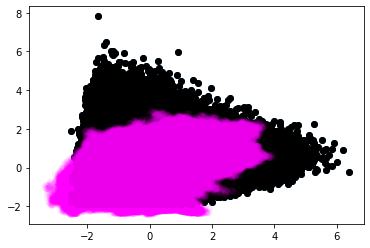

In [43]:
upto_ind_run=21
po_x=GW_ind_runs_chainlen100[GW_ind_runs_chainlen100.run_number<=upto_ind_run]['Rg/Rg_mean'].values

po_x=(po_x-np.mean(po_x))/np.std(po_x)

po_y=GW_ind_runs_chainlen100[GW_ind_runs_chainlen100.run_number<=upto_ind_run]['ratio'].values

po_y=(po_y-np.mean(po_y))/np.std(po_y)
GW_points=np.c_[po_x, po_y]

#plt.scatter(po_x,po_y)
pro_x=salmon_rg_ree_ratheatmap['Rg/Rg_mean'].values

pro_x=(pro_x-np.mean(pro_x))/np.std(pro_x)

pro_y=salmon_rg_ree_ratheatmap['ratio'].values

pro_y=(pro_y-np.mean(pro_y))/np.std(pro_y)

salmon_points=np.c_[pro_x, pro_y]
plt.scatter(po_x,po_y,color='black')
plt.scatter(pro_x,pro_y,color='magenta',alpha=0.05)

radius_=0.5
tree_GW=spatial.cKDTree(GW_points)
tree_salmon=spatial.cKDTree(salmon_points)



In [ ]:
indexes = tree_GW.query_ball_tree(tree_salmon, r=radius_)